In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install tpot

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV
from tpot import TPOTClassifier
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Data Uploading

In [3]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00447/data.zip"

--2025-02-11 08:46:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/00447/data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘archive.ics.uci.edu’


In [4]:
!unzip "data.zip"

unzip:  cannot find or open data.zip, data.zip.zip or data.zip.ZIP.


# 1- Data Preperation

In [6]:
a=[]
for i in ["PS1","PS2","PS3","PS4","PS5","PS6"]:
    PS=np.genfromtxt(r"/kaggle/input/condition-monitoring-of-hydraulic-systems"+"/"+i+".txt")
    a.append(PS)
ps1,ps2,ps3,ps4,ps5,ps6=a

In [7]:
ps1

array([[151.47, 151.45, 151.52, ..., 151.1 , 151.21, 151.19],
       [151.11, 151.12, 151.16, ..., 150.79, 150.8 , 150.86],
       [150.81, 150.79, 150.84, ..., 150.43, 150.54, 150.62],
       ...,
       [151.73, 151.78, 151.84, ..., 151.73, 151.73, 151.83],
       [151.77, 151.77, 151.75, ..., 151.68, 151.71, 151.78],
       [151.83, 151.78, 151.77, ..., 151.73, 151.71, 151.7 ]])

In [8]:
ps1.shape

(2205, 6000)

In [9]:
np.isnan(ps1).sum()

0

In [10]:
ps2

array([[125.5 , 125.39, 125.4 , ..., 125.11, 125.14, 125.1 ],
       [125.06, 125.08, 125.09, ..., 125.13, 125.09, 125.04],
       [125.13, 125.27, 125.23, ..., 124.73, 124.77, 124.88],
       ...,
       [125.41, 125.49, 125.63, ..., 125.84, 125.84, 125.94],
       [125.91, 125.73, 125.59, ..., 125.73, 125.86, 125.91],
       [125.88, 125.86, 125.84, ..., 125.77, 125.66, 125.77]])

In [11]:
ps1_arr=ps1.mean(axis=1)
ps1_arr

array([160.67349167, 160.60332   , 160.34772   , ..., 161.19212   ,
       161.20891667, 161.21712833])

In [12]:
ps2_arr=ps2.mean(axis=1)
ps2_arr

array([109.4669135 , 109.35489033, 109.15884467, ..., 109.75617433,
       109.79388383, 109.7921765 ])

In [13]:
ps3_arr=ps3.mean(axis=1)
ps3_arr

array([1.99147533, 1.97623433, 1.972224  , ..., 1.99343617, 2.00707683,
       2.00269017])

In [14]:
ps4_arr=ps4.mean(axis=1)
ps4_arr

array([ 0.        ,  0.        ,  0.        , ..., 10.19682367,
       10.19858833, 10.20312583])

In [15]:
ps5_arr=ps5.mean(axis=1)
ps5_arr

array([9.8421695 , 9.63514217, 9.53054783, ..., 9.96432917, 9.96823183,
       9.97363767])

In [16]:
ps6_arr=ps6.mean(axis=1)
ps6_arr

array([9.7280975 , 9.52948783, 9.42794883, ..., 9.8426285 , 9.84668967,
       9.85194917])

In [17]:
df=pd.DataFrame({"PS1":ps1_arr,"PS2":ps2_arr,"PS3":ps3_arr,"PS4":ps4_arr,"PS5":ps5_arr,"PS6":ps6_arr})

In [18]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636


In [21]:
eps1=np.genfromtxt(r"/kaggle/input/condition-monitoring-of-hydraulic-systems/EPS1.txt")

In [22]:
esp1_arr=eps1.mean(axis=1)
esp1_arr

array([2538.92916667, 2531.4989    , 2519.928     , ..., 2542.72976667,
       2544.04633333, 2543.8183    ])

In [23]:
df["ESP1"]=esp1_arr

In [24]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500


In [26]:
a=[]
for i in ["FS1","FS2"]:
    FS=np.genfromtxt(r"/kaggle/input/condition-monitoring-of-hydraulic-systems"+"/"+i+".txt")
    a.append(FS)
fs1,fs2=a

In [27]:
fs1_arr=fs1.mean(axis=1)
fs1_arr

array([6.709815  , 6.715315  , 6.71852167, ..., 6.69327667, 6.68412833,
       6.69230167])

In [28]:
fs2_arr=fs2.mean(axis=1)
fs2_arr

array([10.30459167, 10.40309833, 10.36625   , ..., 10.17617167,
       10.17835333, 10.18339333])

In [29]:
df["FS1"]=fs1_arr
df["FS2"]=fs2_arr

In [30]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750


In [35]:
a=[]
for i in ["TS1","TS2","TS3","TS4"]:
    TS=np.genfromtxt(r"/kaggle/input/condition-monitoring-of-hydraulic-systems"+"/"+i+".txt")
    a.append(TS)
ts1,ts2,ts3,ts4=a

In [36]:
ts1_arr=ts1.mean(axis=1)
ts1_arr

array([35.62198333, 36.67696667, 37.8808    , ..., 35.31918333,
       35.32476667, 35.32223333])

In [37]:
ts2_arr=ts2.mean(axis=1)
ts2_arr

array([40.97876667, 41.53276667, 42.44245   , ..., 40.87595   ,
       40.87606667, 40.8594    ])

In [38]:
ts3_arr=ts3.mean(axis=1)
ts3_arr

array([38.47101667, 38.97896667, 39.63195   , ..., 38.24636667,
       38.24573333, 38.24891667])

In [39]:
ts4_arr=ts4.mean(axis=1)
ts4_arr

array([31.74525   , 34.49386667, 35.64615   , ..., 30.42625   ,
       30.41428333, 30.3908    ])

In [40]:
df["TS1"]=ts1_arr
df["TS2"]=ts2_arr
df["TS3"]=ts3_arr
df["TS4"]=ts4_arr

In [ ]:
df.head()

In [41]:
vs1=np.genfromtxt(r"/kaggle/input/condition-monitoring-of-hydraulic-systems/VS1.txt")

In [42]:
vs1

array([[0.604, 0.605, 0.611, ..., 0.545, 0.535, 0.543],
       [0.59 , 0.61 , 0.626, ..., 0.533, 0.531, 0.534],
       [0.578, 0.603, 0.638, ..., 0.544, 0.53 , 0.534],
       ...,
       [0.566, 0.562, 0.561, ..., 0.512, 0.515, 0.517],
       [0.529, 0.539, 0.552, ..., 0.522, 0.52 , 0.528],
       [0.541, 0.553, 0.565, ..., 0.522, 0.522, 0.531]])

In [43]:
vs1_arr=vs1.mean(axis=1)
vs1_arr

array([0.57695   , 0.56585   , 0.57653333, ..., 0.54523333, 0.53701667,
       0.54658333])

In [44]:
df["VS1"]=vs1_arr

In [45]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367


In [46]:
a=[]
for i in ["CE","CP"]:
    C=np.genfromtxt(r"/kaggle/input/condition-monitoring-of-hydraulic-systems"+"/"+i+".txt")
    a.append(C)
ce,cp=a

In [47]:
ce_arr=ce.mean(axis=1)
ce_arr

array([39.60135   , 25.78643333, 22.21823333, ..., 46.4723    ,
       46.54496667, 46.64793333])

In [48]:
cp_arr=cp.mean(axis=1)
cp_arr

array([1.86275   , 1.25555   , 1.11321667, ..., 2.1433    , 2.14848333,
       2.15705   ])

In [49]:
df["CE"]=ce_arr
df["CP"]=cp_arr

In [50]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467


In [52]:
se=np.genfromtxt(r"/kaggle/input/condition-monitoring-of-hydraulic-systems/SE.txt")

In [53]:
se_arr=se.mean(axis=1)
se_arr

array([59.15718333, 59.33561667, 59.54315   , ..., 59.13235   ,
       58.9708    , 59.0539    ])

In [54]:
df["SE"]=se_arr

In [55]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267


In [58]:
target=np.genfromtxt(r"/kaggle/input/condition-monitoring-of-hydraulic-systems/profile.txt")

In [59]:
target

array([[  3., 100.,   0., 130.,   1.],
       [  3., 100.,   0., 130.,   1.],
       [  3., 100.,   0., 130.,   1.],
       ...,
       [100., 100.,   0.,  90.,   0.],
       [100., 100.,   0.,  90.,   0.],
       [100., 100.,   0.,  90.,   0.]])

In [60]:
target.shape

(2205, 5)

In [61]:
df_temp=pd.DataFrame(target,columns=["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"])
df_temp.head()

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,3.0,100.0,0.0,130.0,1.0
1,3.0,100.0,0.0,130.0,1.0
2,3.0,100.0,0.0,130.0,1.0
3,3.0,100.0,0.0,130.0,1.0
4,3.0,100.0,0.0,130.0,1.0


In [62]:
df_final=pd.concat([df,df_temp],axis=1)

In [63]:
df_final.head(20)

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,160.673492,109.466914,1.991475,0.000000e+00,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,...,31.745250,0.576950,39.601350,1.862750,59.157183,3.0,100.0,0.0,130.0,1.0
1,160.603320,109.354890,1.976234,0.000000e+00,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,...,34.493867,0.565850,25.786433,1.255550,59.335617,3.0,100.0,0.0,130.0,1.0
2,160.347720,109.158845,1.972224,0.000000e+00,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,...,35.646150,0.576533,22.218233,1.113217,59.543150,3.0,100.0,0.0,130.0,1.0
3,160.188088,109.064807,1.946576,0.000000e+00,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,...,36.579467,0.569267,20.459817,1.062150,59.794900,3.0,100.0,0.0,130.0,1.0
4,160.000472,108.931434,1.922707,0.000000e+00,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,...,37.427900,0.577367,19.787017,1.070467,59.455267,3.0,100.0,0.0,130.0,1.0
5,159.920210,108.887682,1.913285,0.000000e+00,9.301160,9.206877,2501.007067,6.699023,10.178720,40.659450,...,38.212067,0.572683,19.149683,1.072083,59.563333,3.0,100.0,0.0,130.0,1.0
6,159.672675,108.676466,1.888100,0.000000e+00,9.233942,9.143320,2494.416900,6.698573,10.140810,41.463633,...,38.932100,0.573033,18.666383,1.081683,59.789900,3.0,100.0,0.0,130.0,1.0
7,159.614452,108.651745,1.874894,0.000000e+00,9.194159,9.105058,2489.421533,6.678027,10.095978,42.215267,...,39.558967,0.572000,18.178433,1.078700,59.590617,3.0,100.0,0.0,130.0,1.0
8,159.475745,108.529738,1.858120,0.000000e+00,9.144616,9.057067,2484.419067,6.671652,10.039710,42.891983,...,40.080533,0.567067,18.334867,1.115083,59.608883,3.0,100.0,0.0,130.0,1.0
9,159.437997,108.510885,1.841063,0.000000e+00,9.104831,9.019265,2480.434867,6.659990,9.997762,43.532833,...,40.612550,0.571683,18.205733,1.129133,59.473733,3.0,100.0,0.0,130.0,1.0


In [64]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PS1                    2205 non-null   float64
 1   PS2                    2205 non-null   float64
 2   PS3                    2205 non-null   float64
 3   PS4                    2205 non-null   float64
 4   PS5                    2205 non-null   float64
 5   PS6                    2205 non-null   float64
 6   ESP1                   2205 non-null   float64
 7   FS1                    2205 non-null   float64
 8   FS2                    2205 non-null   float64
 9   TS1                    2205 non-null   float64
 10  TS2                    2205 non-null   float64
 11  TS3                    2205 non-null   float64
 12  TS4                    2205 non-null   float64
 13  VS1                    2205 non-null   float64
 14  CE                     2205 non-null   float64
 15  CP  

In [65]:
df_final.describe()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,160.485315,109.379906,1.753227,2.600266,9.163320,9.079363,2495.509203,6.198549,9.649453,45.424567,...,40.735654,0.613315,31.299077,1.808399,55.287900,41.240816,90.693878,0.669388,107.199546,0.342857
std,4.699425,4.986585,0.251902,4.279355,0.576296,0.549589,73.836682,1.032883,0.449246,7.991933,...,8.107878,0.060260,11.575330,0.278263,8.960189,42.383143,10.681802,0.817233,16.435848,0.474772
min,155.391547,104.406307,0.840252,0.000000,8.365801,8.321527,2361.747267,2.018572,8.857513,35.313783,...,30.390800,0.524367,17.555983,1.062150,18.276617,3.000000,73.000000,0.000000,90.000000,0.000000
25%,158.100195,106.962382,1.729733,0.000000,8.547239,8.487167,2442.933467,6.391670,9.203397,36.237150,...,31.272567,0.555100,20.084650,1.550100,56.270183,3.000000,80.000000,0.000000,90.000000,0.000000
50%,158.960895,107.730169,1.779631,0.000000,9.115781,9.031516,2480.926633,6.576673,9.692270,44.836650,...,40.429050,0.610183,27.392533,1.739683,58.758150,20.000000,100.000000,0.000000,100.000000,0.000000
75%,161.000735,109.421612,1.932047,3.503266,9.844351,9.729276,2548.211467,6.657508,10.155008,54.104317,...,49.409500,0.649850,46.677383,2.148483,59.656900,100.000000,100.000000,1.000000,130.000000,1.000000
max,180.922708,131.589089,2.023398,10.207068,9.978511,9.856591,2740.641000,6.722707,10.403098,57.899283,...,53.060417,0.839067,47.903667,2.840100,60.755300,100.000000,100.000000,2.000000,130.000000,1.000000


# 2- Data Analysis

In [72]:
df_final.var()

PS1                        22.084591
PS2                        24.866035
PS3                         0.063454
PS4                        18.312876
PS5                         0.332117
PS6                         0.302048
ESP1                     5451.855603
FS1                         1.066847
FS2                         0.201822
TS1                        63.871000
TS2                        54.704580
TS3                        55.530634
TS4                        65.737688
VS1                         0.003631
CE                        133.988270
CP                          0.077430
SE                         80.284993
Cooler_Condition         1796.330820
Valve_Condition           114.100893
Internal_Pump_Leakage       0.667869
Hydraulic_Accumulator     270.137114
Stable_Flag                 0.225408
dtype: float64

In [74]:
df_final.corr()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
PS1,1.000000,0.995294,-0.719679,0.043416,-0.125801,-0.124423,0.831429,-0.924036,-0.224179,0.176661,...,0.171001,0.442242,-0.044862,-0.065850,-0.943953,-0.002000,-0.152883,0.311859,-0.198940,-0.232049
PS2,0.995294,1.000000,-0.767557,-0.020001,-0.200835,-0.199468,0.787771,-0.946450,-0.295798,0.250480,...,0.245184,0.503126,-0.119934,-0.137819,-0.957972,-0.075386,-0.098491,0.309810,-0.180580,-0.206720
PS3,-0.719679,-0.767557,1.000000,0.484111,0.755438,0.754532,-0.268738,0.921187,0.798910,-0.776377,...,-0.776001,-0.894019,0.697820,0.680701,0.884123,0.662852,0.163278,-0.355070,-0.006242,0.237027
PS4,0.043416,-0.020001,0.484111,1.000000,0.744478,0.744778,0.457372,0.198654,0.688770,-0.706899,...,-0.718159,-0.661116,0.814459,0.752728,0.125883,0.832446,-0.146385,0.154950,-0.001021,-0.244314
PS5,-0.125801,-0.200835,0.755438,0.744478,1.000000,0.999993,0.418587,0.461261,0.979715,-0.992716,...,-0.995100,-0.898647,0.973995,0.936972,0.377765,0.949962,0.020317,-0.016579,-0.209262,0.021458
PS6,-0.124423,-0.199468,0.754532,0.744778,0.999993,1.000000,0.419764,0.460014,0.979356,-0.992523,...,-0.994925,-0.898289,0.974220,0.937112,0.376471,0.950316,0.020284,-0.016262,-0.210282,0.021353
ESP1,0.831429,0.787771,-0.268738,0.457372,0.418587,0.419764,1.000000,-0.608338,0.325387,-0.371933,...,-0.377500,-0.077260,0.475030,0.433904,-0.677823,0.497514,-0.174618,0.426320,-0.239692,-0.267649
FS1,-0.924036,-0.946450,0.921187,0.198654,0.461261,0.460014,-0.608338,1.000000,0.545412,-0.505347,...,-0.500738,-0.710475,0.376376,0.382178,0.994564,0.330446,0.190141,-0.421702,0.092695,0.288568
FS2,-0.224179,-0.295798,0.798910,0.688770,0.979715,0.979356,0.325387,0.545412,1.000000,-0.994654,...,-0.991432,-0.921744,0.919353,0.876955,0.466177,0.881340,0.038651,-0.034926,-0.139471,0.055942
TS1,0.176661,0.250480,-0.776377,-0.706899,-0.992716,-0.992523,-0.371933,-0.505347,-0.994654,1.000000,...,0.999242,0.913102,-0.945977,-0.912048,-0.423296,-0.910865,-0.023876,0.019793,0.193597,-0.029021


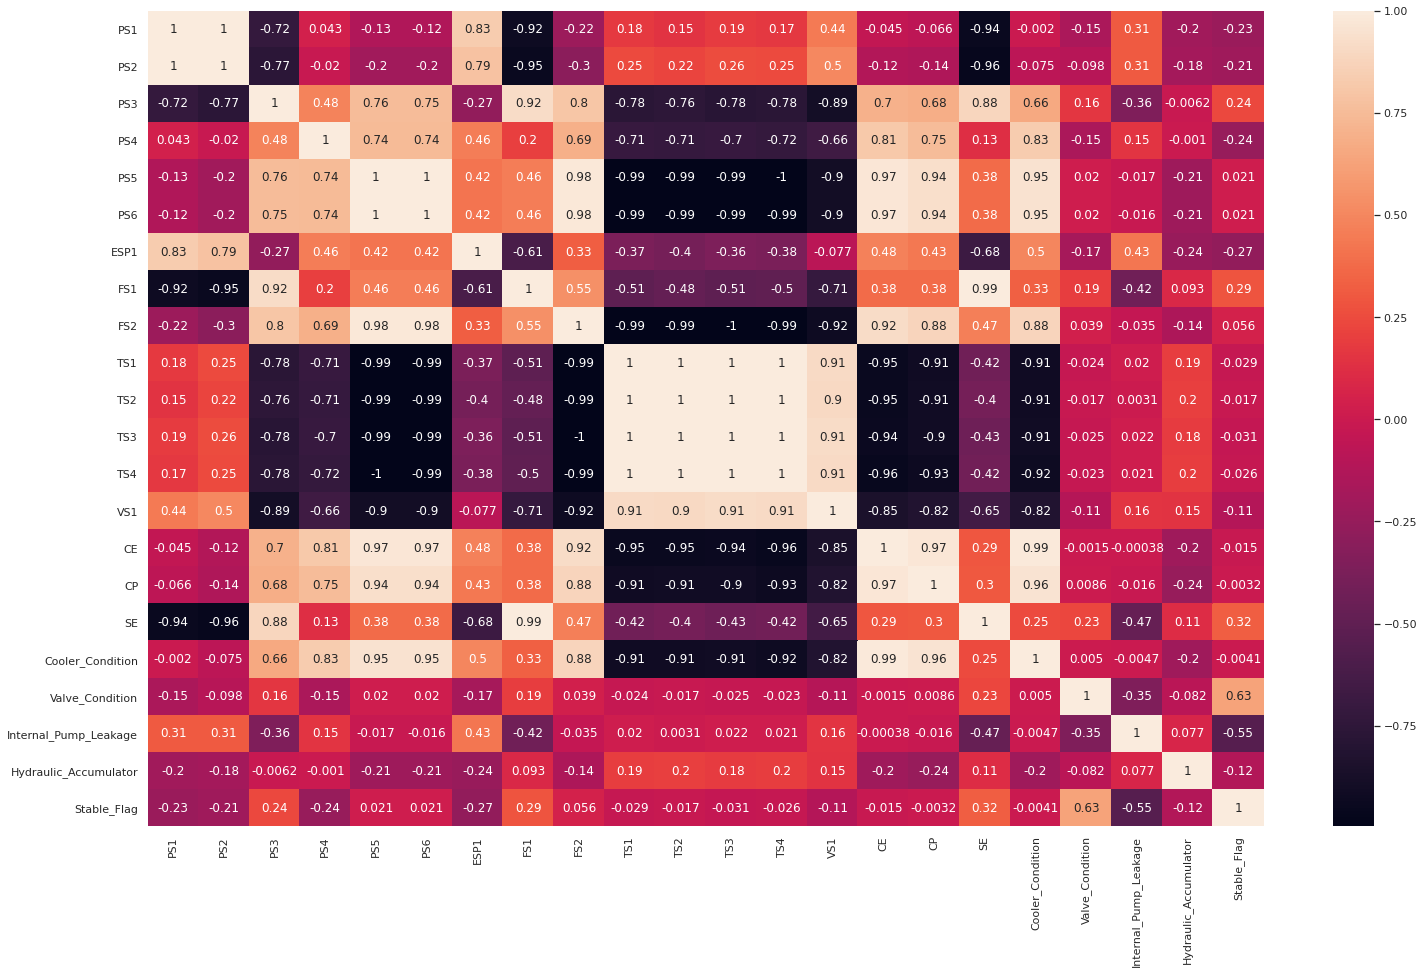

In [75]:
fig=plt.gcf()
fig.set_size_inches((25,15))
sns.heatmap(df_final.corr(),annot=True)

In [69]:
# fig.savefig("corr.png")

In [76]:
df_final_corr=df_final.corr().sort_values(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],ascending=False)
df_final_corr.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
Cooler_Condition,-0.002000,-0.075386,0.662852,0.832446,0.949962,0.950316,0.497514,0.330446,0.881340,-0.910865,...,-0.922572,-0.818256,0.991943,0.956220,0.249273,1.000000,0.004952,-0.004656,-0.203954,-0.004105
CE,-0.044862,-0.119934,0.697820,0.814459,0.973995,0.974220,0.475030,0.376376,0.919353,-0.945977,...,-0.955987,-0.852222,1.000000,0.974136,0.293130,0.991943,-0.001463,-0.000381,-0.204599,-0.015316
CP,-0.065850,-0.137819,0.680701,0.752728,0.936972,0.937112,0.433904,0.382178,0.876955,-0.912048,...,-0.926772,-0.821073,0.974136,1.000000,0.303047,0.956220,0.008605,-0.015806,-0.241432,-0.003231
PS6,-0.124423,-0.199468,0.754532,0.744778,0.999993,1.000000,0.419764,0.460014,0.979356,-0.992523,...,-0.994925,-0.898289,0.974220,0.937112,0.376471,0.950316,0.020284,-0.016262,-0.210282,0.021353
PS5,-0.125801,-0.200835,0.755438,0.744478,1.000000,0.999993,0.418587,0.461261,0.979715,-0.992716,...,-0.995100,-0.898647,0.973995,0.936972,0.377765,0.949962,0.020317,-0.016579,-0.209262,0.021458


In [71]:
df_final_corr_target=df_final_corr[["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"]]
df_final_corr_target.drop(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],axis=0,inplace=True)

In [77]:
df_final_corr_target

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
CE,0.991943,-0.001463,-0.000381,-0.204599,-0.015316
CP,0.956220,0.008605,-0.015806,-0.241432,-0.003231
PS6,0.950316,0.020284,-0.016262,-0.210282,0.021353
PS5,0.949962,0.020317,-0.016579,-0.209262,0.021458
FS2,0.881340,0.038651,-0.034926,-0.139471,0.055942
PS4,0.832446,-0.146385,0.154950,-0.001021,-0.244314
PS3,0.662852,0.163278,-0.355070,-0.006242,0.237027
ESP1,0.497514,-0.174618,0.426320,-0.239692,-0.267649
FS1,0.330446,0.190141,-0.421702,0.092695,0.288568
SE,0.249273,0.231354,-0.469243,0.112756,0.324695


# 3- Data Preprocessing

In [78]:
x=df_final.iloc[:,:-5]

In [79]:
x.head(2)

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.57695,39.601350,1.86275,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.56585,25.786433,1.25555,59.335617


In [80]:
y=df_final.iloc[:,-5:]

In [81]:
y.head(2)

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,3.0,100.0,0.0,130.0,1.0
1,3.0,100.0,0.0,130.0,1.0


In [82]:
target_1=y.iloc[:,-5]
target_2=y.iloc[:,-4]
target_3=y.iloc[:,-3]
target_4=y.iloc[:,-2]
final_target=y.iloc[:,-1]
final_target=(final_target.astype(int))

In [83]:
x.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267


## data splitting target-1

### target incidence

In [84]:
round((target_1.value_counts(normalize=True)),4)    #cooler condition is normal

100.0    0.3361
20.0     0.3320
3.0      0.3320
Name: Cooler_Condition, dtype: float64

In [90]:
train_x,test_x,train_y,test_y=train_test_split(x,target_1,test_size=0.2,random_state=1)

## feature scaling target-1

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
sc=StandardScaler()

In [93]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)    target-1

## 1- logistic regression

In [94]:
l_classifier=LogisticRegression(random_state=42)

In [95]:
l_classifier.fit(train_x,train_y)

LogisticRegression(random_state=42)

accuracy_score_lr_train=  0.9977324263038548
accuracy_score_lr_test=  1.0

confusion_matrix:-


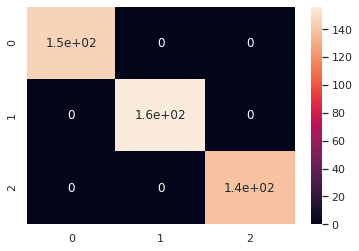

In [96]:
pred_train_y=l_classifier.predict(train_x)
pred_test_y=l_classifier.predict(test_x)
accuracy_score_lr_train=accuracy_score(train_y,pred_train_y)
accuracy_score_lr_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_lr_train= ",accuracy_score_lr_train)
print("accuracy_score_lr_test= ",accuracy_score_lr_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [97]:
precision_score_lr_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_lr_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_lr_train= ",precision_score_lr_train)
print("precision_score_lr_test= ",precision_score_lr_test)

precision_score_lr_train=  0.9977334222238077
precision_score_lr_test=  1.0


### cross-validate

In [98]:
scores=cross_validate(l_classifier,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.04086566, 0.04234982, 0.04278374, 0.04102349, 0.04290175,
        0.04298639, 0.03900242, 0.03818011, 0.04094505, 0.04163241]),
 'score_time': array([0.0033989 , 0.00177193, 0.00167537, 0.00172353, 0.00165701,
        0.00166464, 0.00169897, 0.00164652, 0.00164104, 0.00160742]),
 'test_accuracy': array([0.99435028, 1.        , 0.98870056, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99431818, 1.        ]),
 'test_precision_weighted': array([0.9944429 , 1.        , 0.98907721, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99441448, 1.        ])}

In [99]:
accuracy_score_lr_cross=scores["test_accuracy"].mean()
print("accuracy_score_lr_cross= ",accuracy_score_lr_cross)
precision_score_lr_cross=scores["test_precision_weighted"].mean()
print("precision_score_lr_cross= ",precision_score_lr_cross)        

accuracy_score_lr_cross=  0.997736902927581
precision_score_lr_cross=  0.9977934597433069


## 2- knn

In [100]:
knn=KNeighborsClassifier(n_neighbors=10,p=2)

In [101]:
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=10)

accuracy_score_knn_train=  0.9982993197278912
accuracy_score_knn_test=  1.0

confusion_matrix:-


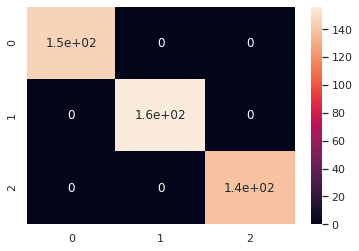

In [102]:
pred_train_y=knn.predict(train_x)
pred_test_y=knn.predict(test_x)
accuracy_score_knn_train=accuracy_score(train_y,pred_train_y)
accuracy_score_knn_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_knn_train= ",accuracy_score_knn_train)
print("accuracy_score_knn_test= ",accuracy_score_knn_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [103]:
precision_score_knn_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_knn_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_knn_train= ",precision_score_knn_train)
print("precision_score_knn_test= ",precision_score_knn_test)

precision_score_knn_train=  0.9982993197278912
precision_score_knn_test=  1.0


### cross-validate

In [104]:
scores=cross_validate(knn,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.00376201, 0.00329685, 0.00323415, 0.00333524, 0.00330091,
        0.00323892, 0.00326037, 0.00325155, 0.00329757, 0.00327849]),
 'score_time': array([0.01175737, 0.0097158 , 0.00944924, 0.00950694, 0.00958204,
        0.00949621, 0.0094738 , 0.00952268, 0.01080441, 0.00967431]),
 'test_accuracy': array([0.99435028, 1.        , 0.99435028, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99431818, 1.        ]),
 'test_precision_weighted': array([0.9944429 , 1.        , 0.99444604, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99441448, 1.        ])}

In [105]:
accuracy_score_knn_cross=scores["test_accuracy"].mean()
print("accuracy_score_knn_cross= ",accuracy_score_knn_cross)
precision_score_knn_cross=scores["test_precision_weighted"].mean()
print("precision_score_knn_cross= ",precision_score_knn_cross)

accuracy_score_knn_cross=  0.9983018746789935
precision_score_knn_cross=  0.9983303425036887


## 3- SVC

In [106]:
svc=SVC(kernel="rbf")

In [107]:
svc.fit(train_x,train_y)

SVC()

accuracy_score_svc_train=  0.9982993197278912
accuracy_score_svc_test=  1.0

confusion_matrix:-


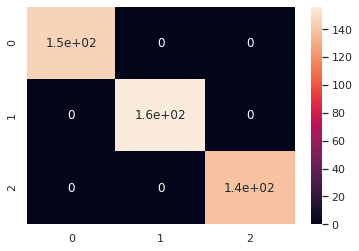

In [108]:
pred_train_y=svc.predict(train_x)
pred_test_y=svc.predict(test_x)
accuracy_score_svc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_svc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_svc_train= ",accuracy_score_svc_train)
print("accuracy_score_svc_test= ",accuracy_score_svc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [109]:
precision_score_svc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_svc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_svc_train= ",precision_score_svc_train)
print("precision_score_svc_test= ",precision_score_svc_test)

precision_score_svc_train=  0.9982993197278912
precision_score_svc_test=  1.0


### cross-validate

In [110]:
scores=cross_validate(svc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.00781345, 0.00762701, 0.00695992, 0.00759912, 0.00678992,
        0.00698543, 0.00716233, 0.00680447, 0.00698066, 0.00721645]),
 'score_time': array([0.00282264, 0.00215697, 0.00212431, 0.00218272, 0.00212526,
        0.0021174 , 0.00227332, 0.00208497, 0.00218439, 0.00216532]),
 'test_accuracy': array([0.99435028, 1.        , 0.99435028, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99431818, 1.        ]),
 'test_precision_weighted': array([0.9944429 , 1.        , 0.99444604, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99441448, 1.        ])}

In [111]:
accuracy_score_svc_cross=scores["test_accuracy"].mean()
print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
precision_score_svc_cross=scores["test_precision_weighted"].mean()
print("precision_score_svc_cross= ",precision_score_svc_cross)

accuracy_score_svc_cross=  0.9983018746789935
precision_score_svc_cross=  0.9983303425036887


## 4- decision tree classifer

In [112]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=1)

In [113]:
dtc.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

accuracy_score_dtc_train=  1.0
accuracy_score_dtc_test=  1.0

confusion_matrix:-


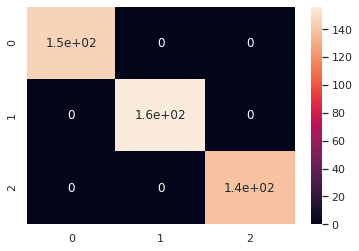

In [114]:
pred_train_y=dtc.predict(train_x)
pred_test_y=dtc.predict(test_x)
accuracy_score_dtc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_dtc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) 

In [115]:
precision_score_dtc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_dtc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_dtc_train= ",precision_score_dtc_train)
print("precision_score_dtc_test= ",precision_score_dtc_test)     #overfitting

precision_score_dtc_train=  1.0
precision_score_dtc_test=  1.0


### cross-validate

In [116]:
scores=cross_validate(dtc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.01229858, 0.01290774, 0.01284504, 0.01273441, 0.013026  ,
        0.01360273, 0.01306653, 0.01269531, 0.01260829, 0.01262569]),
 'score_time': array([0.00188613, 0.00189304, 0.00179076, 0.00225544, 0.00176191,
        0.00244164, 0.00167775, 0.00181985, 0.00167966, 0.00173283]),
 'test_accuracy': array([0.99435028, 1.        , 0.99435028, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99431818, 1.        ]),
 'test_precision_weighted': array([0.9944429 , 1.        , 0.99444604, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99441448, 1.        ])}

In [117]:
accuracy_score_dtc_cross=scores["test_accuracy"].mean()
print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
precision_score_dtc_cross=scores["test_precision_weighted"].mean()
print("precision_score_dtc_cross= ",precision_score_dtc_cross)

accuracy_score_dtc_cross=  0.9983018746789935
precision_score_dtc_cross=  0.9983303425036887


## 5- random forest classifier

In [118]:
rfc=RandomForestClassifier(n_estimators=100,random_state=1)

In [119]:
rfc.fit(train_x,train_y)

RandomForestClassifier(random_state=1)

accuracy_score_rfc_train=  1.0
accuracy_score_rfc_test=  1.0

confusion_matrix:-


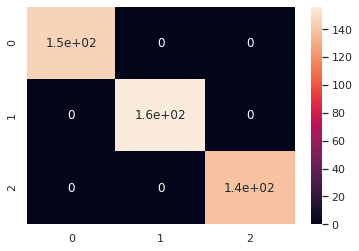

In [120]:
pred_train_y=rfc.predict(train_x)
pred_test_y=rfc.predict(test_x)
accuracy_score_rfc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_rfc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) #overfitting

In [121]:
precision_score_rfc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_rfc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_rfc_train= ",precision_score_rfc_train)
print("precision_score_rfc_test= ",precision_score_rfc_test)     

precision_score_rfc_train=  1.0
precision_score_rfc_test=  1.0


### cross-validate

In [122]:
scores=cross_validate(rfc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.27619195, 0.28193641, 0.29273391, 0.28552532, 0.28756714,
        0.28088284, 0.27899075, 0.28060436, 0.28361416, 0.27674675]),
 'score_time': array([0.01130533, 0.01107955, 0.01098776, 0.01116538, 0.01103926,
        0.01107979, 0.01113367, 0.01266909, 0.01128078, 0.01128268]),
 'test_accuracy': array([0.99435028, 1.        , 0.99435028, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99431818, 1.        ]),
 'test_precision_weighted': array([0.9944429 , 1.        , 0.99444604, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99441448, 1.        ])}

In [123]:
accuracy_score_rfc_cross=scores["test_accuracy"].mean()
print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
precision_score_rfc_cross=scores["test_precision_weighted"].mean()
print("precision_score_rfc_cross= ",precision_score_rfc_cross)

accuracy_score_rfc_cross=  0.9983018746789935
precision_score_rfc_cross=  0.9983303425036887


## 6- tpotclassifier

In [124]:
tpotc=TPOTClassifier(generations=20,population_size=50,scoring=["accuracy","precision"],cv=5,verbosity=2,n_jobs=-1,random_state=42,config_dict="TPOT light")

In [125]:
tpotc.fit(train_x,train_y)


Generation 1 - Current best internal CV score: 0.9988668555240793

Generation 2 - Current best internal CV score: 0.9988668555240793

Generation 3 - Current best internal CV score: 0.9988668555240793

Generation 4 - Current best internal CV score: 0.9988668555240793

Generation 5 - Current best internal CV score: 0.9988668555240793

Generation 6 - Current best internal CV score: 0.9988668555240793

Generation 7 - Current best internal CV score: 0.9988668555240793

Generation 8 - Current best internal CV score: 0.9988668555240793

Generation 9 - Current best internal CV score: 0.9988668555240793

Generation 10 - Current best internal CV score: 0.9988668555240793

Generation 11 - Current best internal CV score: 0.9988668555240793

Generation 12 - Current best internal CV score: 0.9988668555240793

Generation 13 - Current best internal CV score: 0.9988668555240793

Generation 14 - Current best internal CV score: 0.9988668555240793

Generation 15 - Current best internal CV score: 0.998866

TPOTClassifier(config_dict='TPOT light', generations=20, n_jobs=-1,
               population_size=50, random_state=42,
               scoring=['accuracy', 'precision'], verbosity=2)

In [126]:
tpotc.fitted_pipeline_

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, min_samples_leaf=12,
                                        min_samples_split=7,
                                        random_state=42))])

accuracy_score_tpotc_train=  0.9988662131519275
accuracy_score_tpotc_test=  1.0

confusion_matrix:-


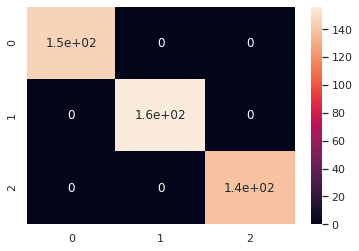

In [127]:
pred_train_y=tpotc.predict(train_x)
pred_test_y=tpotc.predict(test_x)
accuracy_score_tpotc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_tpotc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_tpotc_train= ",accuracy_score_tpotc_train)
print("accuracy_score_tpotc_test= ",accuracy_score_tpotc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [128]:
precision_score_tpotc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_tpotc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_tpotc_train= ",precision_score_tpotc_train)
print("precision_score_tpotc_test= ",precision_score_tpotc_test)

precision_score_tpotc_train=  0.99887013628981
precision_score_tpotc_test=  1.0


### cross validate

In [129]:
scores=cross_validate(tpotc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=5)
scores


Generation 1 - Current best internal CV score: 0.9992932862190813

Generation 2 - Current best internal CV score: 0.9992932862190813

Generation 3 - Current best internal CV score: 0.9992932862190813

Generation 4 - Current best internal CV score: 0.9992932862190813

Generation 5 - Current best internal CV score: 0.9992932862190813

Generation 6 - Current best internal CV score: 0.9992932862190813

Generation 7 - Current best internal CV score: 0.9992932862190813

Generation 8 - Current best internal CV score: 0.9992932862190813

Generation 9 - Current best internal CV score: 0.9992932862190813

Generation 10 - Current best internal CV score: 0.9992932862190813

Generation 11 - Current best internal CV score: 0.9992932862190813

Generation 12 - Current best internal CV score: 0.9992932862190813

Generation 13 - Current best internal CV score: 0.9992932862190813

Generation 14 - Current best internal CV score: 0.9992932862190813

Generation 15 - Current best internal CV score: 0.999293


Generation 1 - Current best internal CV score: 0.9992932862190813

Generation 2 - Current best internal CV score: 0.9992932862190813

Generation 3 - Current best internal CV score: 0.9992932862190813

Generation 4 - Current best internal CV score: 0.9992932862190813

Generation 5 - Current best internal CV score: 0.9992932862190813

Generation 6 - Current best internal CV score: 0.9992932862190813

Generation 7 - Current best internal CV score: 0.9992932862190813

Generation 8 - Current best internal CV score: 0.9992932862190813

Generation 9 - Current best internal CV score: 0.9992932862190813

Generation 10 - Current best internal CV score: 0.9992932862190813

Generation 11 - Current best internal CV score: 0.9992932862190813

Generation 12 - Current best internal CV score: 0.9992932862190813

Generation 13 - Current best internal CV score: 0.9992932862190813

Generation 14 - Current best internal CV score: 0.9992932862190813

Generation 15 - Current best internal CV score: 0.999293


Generation 1 - Current best internal CV score: 0.9985840663609252

Generation 2 - Current best internal CV score: 0.9985840663609252

Generation 3 - Current best internal CV score: 0.9985840663609252

Generation 4 - Current best internal CV score: 0.9985840663609252

Generation 5 - Current best internal CV score: 0.9985840663609252

Generation 6 - Current best internal CV score: 0.9985840663609252

Generation 7 - Current best internal CV score: 0.9985840663609252

Generation 8 - Current best internal CV score: 0.9985840663609252

Generation 9 - Current best internal CV score: 0.9985840663609252

Generation 10 - Current best internal CV score: 0.9985840663609252

Generation 11 - Current best internal CV score: 0.9985840663609252

Generation 12 - Current best internal CV score: 0.9985840663609252

Generation 13 - Current best internal CV score: 0.9985840663609252

Generation 14 - Current best internal CV score: 0.9985840663609252

Generation 15 - Current best internal CV score: 0.998584


Generation 1 - Current best internal CV score: 0.9985840663609252

Generation 2 - Current best internal CV score: 0.9985840663609252

Generation 3 - Current best internal CV score: 0.9985840663609252

Generation 4 - Current best internal CV score: 0.9992932862190813

Generation 5 - Current best internal CV score: 0.9992932862190813

Generation 6 - Current best internal CV score: 0.9992932862190813

Generation 7 - Current best internal CV score: 0.9992932862190813

Generation 8 - Current best internal CV score: 0.9992932862190813

Generation 9 - Current best internal CV score: 0.9992932862190813

Generation 10 - Current best internal CV score: 0.9992932862190813

Generation 11 - Current best internal CV score: 0.9992932862190813

Generation 12 - Current best internal CV score: 0.9992932862190813

Generation 13 - Current best internal CV score: 0.9992932862190813

Generation 14 - Current best internal CV score: 0.9992932862190813

Generation 15 - Current best internal CV score: 0.999293


Generation 1 - Current best internal CV score: 0.9985865724381625

Generation 2 - Current best internal CV score: 0.9985865724381625

Generation 3 - Current best internal CV score: 0.9985865724381625

Generation 4 - Current best internal CV score: 0.9985865724381625

Generation 5 - Current best internal CV score: 0.9992932862190813

Generation 6 - Current best internal CV score: 0.9992932862190813

Generation 7 - Current best internal CV score: 0.9992932862190813

Generation 8 - Current best internal CV score: 0.9992932862190813

Generation 9 - Current best internal CV score: 0.9992932862190813

Generation 10 - Current best internal CV score: 0.9992932862190813

Generation 11 - Current best internal CV score: 0.9992932862190813

Generation 12 - Current best internal CV score: 0.9992932862190813

Generation 13 - Current best internal CV score: 0.9992932862190813

Generation 14 - Current best internal CV score: 0.9992932862190813

Generation 15 - Current best internal CV score: 0.999293

{'fit_time': array([40.49746776, 42.33425903, 40.11462283, 47.31872606, 42.85936379]),
 'score_time': array([0.00214744, 0.00192738, 0.001899  , 0.00234032, 0.00974011]),
 'test_accuracy': array([0.99716714, 0.99716714, 1.        , 0.99716714, 0.99715909]),
 'test_precision_weighted': array([0.99719055, 0.99719199, 1.        , 0.99719266, 0.99718277])}

In [130]:
print("tpot_accuracy_score_target1= ",scores["test_accuracy"].mean())
print("tpot_precision_score_target1= ",scores["test_precision_weighted"].mean())

tpot_accuracy_score_target1=  0.997732101467937
tpot_precision_score_target1=  0.9977515929179196


## best model

In [131]:
accuracy_score_tpotc_train=0.9994331065759637
accuracy_score_tpotc_test=1.0
precision_score_tpotc_train=0.9994340890602342
precision_score_tpotc_test=1.0

In [132]:
pred_train_accuracy=[accuracy_score_lr_train,accuracy_score_knn_train,accuracy_score_svc_train
                     ,accuracy_score_tpotc_train]
pred_test_accuracy=[accuracy_score_lr_test,accuracy_score_knn_test,accuracy_score_svc_test
                     ,accuracy_score_tpotc_test]
pred_train_precision=[precision_score_lr_train,precision_score_knn_train,precision_score_svc_train
                     ,precision_score_tpotc_train]
pred_test_precision=[precision_score_lr_test,precision_score_knn_test,precision_score_svc_test
                     ,precision_score_tpotc_test]

In [133]:
df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])
df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])

In [134]:
df_accuracy=pd.concat([df_train_accuracy,df_test_accuracy],axis=1)
df_precision=pd.concat([df_train_precision,df_test_precision],axis=1)
df_best_model=pd.concat([df_accuracy,df_precision],keys=["accuracy","precision"],axis=1)
df_best_model.set_axis(["logistic_reg","knn","svc","tpotclassifier"],axis=0,inplace=True)
df_best_model

accuracy      precision     
                   train test     train test
logistic_reg    0.997732  1.0  0.997733  1.0
knn             0.998299  1.0  0.998299  1.0
svc             0.998299  1.0  0.998299  1.0
tpotclassifier  0.999433  1.0  0.999434  1.0

In [135]:
print("logistic_regression_target1= ",max(df_best_model.accuracy.test))

logistic_regression_target1=  1.0


In [136]:
target1_pred_values=l_classifier.predict(test_x)

## data splitting target-2

### target incidence

In [137]:
round((target_2.value_counts(normalize=True)),4)     # valve's condition is good

100.0    0.5102
90.0     0.1633
73.0     0.1633
80.0     0.1633
Name: Valve_Condition, dtype: float64

In [138]:
train_x,test_x,train_y,test_y=train_test_split(x,target_2,test_size=0.2,random_state=1)

## feature scaling target-2

In [139]:
sc=StandardScaler()

In [140]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classifiers)     target-2

## 1- logistic regression

In [141]:
l_classifier=LogisticRegression(random_state=42)

In [142]:
l_classifier.fit(train_x,train_y)

LogisticRegression(random_state=42)

accuracy_score_lr_train=  0.7210884353741497
accuracy_score_lr_test=  0.7165532879818595

confusion_matrix:-


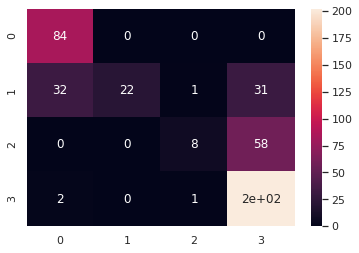

In [143]:
pred_train_y=l_classifier.predict(train_x)
pred_test_y=l_classifier.predict(test_x)
accuracy_score_lr_train=accuracy_score(train_y,pred_train_y)
accuracy_score_lr_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_lr_train= ",accuracy_score_lr_train)
print("accuracy_score_lr_test= ",accuracy_score_lr_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [144]:
precision_score_lr_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_lr_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_lr_train= ",precision_score_lr_train)
print("precision_score_lr_test= ",precision_score_lr_test)

precision_score_lr_train=  0.7323126422217866
precision_score_lr_test=  0.7730136409700075


### cross-validate

In [145]:
scores=cross_validate(l_classifier,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.09529471, 0.08997416, 0.092803  , 0.0932579 , 0.09308171,
        0.08815312, 0.08758497, 0.09076524, 0.08779907, 0.08966684]),
 'score_time': array([0.00170565, 0.00168729, 0.0016973 , 0.00162673, 0.00169683,
        0.00176835, 0.00170493, 0.00172949, 0.0016489 , 0.00168061]),
 'test_accuracy': array([0.71751412, 0.70621469, 0.75141243, 0.6779661 , 0.70454545,
        0.72159091, 0.71022727, 0.72727273, 0.72159091, 0.69318182]),
 'test_precision_weighted': array([0.79841131, 0.68478163, 0.7916134 , 0.67775705, 0.66060606,
        0.73117544, 0.71723879, 0.76536114, 0.71740976, 0.74807209])}

In [146]:
accuracy_score_lr_cross=scores["test_accuracy"].mean()
print("accuracy_score_lr_cross= ",accuracy_score_lr_cross)
precision_score_lr_cross=scores["test_precision_weighted"].mean()
print("precision_score_lr_cross= ",precision_score_lr_cross)        

accuracy_score_lr_cross=  0.713151643554186
precision_score_lr_cross=  0.7292426672964005


## 2- knn

In [147]:
knn=KNeighborsClassifier(n_neighbors=5,p=2)

In [148]:
knn.fit(train_x,train_y)

KNeighborsClassifier()

accuracy_score_knn_train=  0.8996598639455783
accuracy_score_knn_test=  0.8412698412698413

confusion_matrix:-


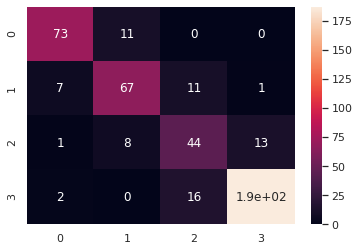

In [149]:
pred_train_y=knn.predict(train_x)
pred_test_y=knn.predict(test_x)
accuracy_score_knn_train=accuracy_score(train_y,pred_train_y)
accuracy_score_knn_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_knn_train= ",accuracy_score_knn_train)
print("accuracy_score_knn_test= ",accuracy_score_knn_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [150]:
precision_score_knn_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_knn_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_knn_train= ",precision_score_knn_train)
print("precision_score_knn_test= ",precision_score_knn_test)

precision_score_knn_train=  0.9019295076403129
precision_score_knn_test=  0.8446764615823565


### cross-validate

In [151]:
scores=cross_validate(knn,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.00372815, 0.00334764, 0.00332618, 0.0032568 , 0.00329232,
        0.00329185, 0.00321698, 0.00332427, 0.00322413, 0.00322008]),
 'score_time': array([0.01098895, 0.00928903, 0.00949216, 0.00933957, 0.00935078,
        0.00926447, 0.00926089, 0.00927877, 0.00924897, 0.00932741]),
 'test_accuracy': array([0.76836158, 0.85875706, 0.78531073, 0.80225989, 0.84659091,
        0.79545455, 0.82954545, 0.82386364, 0.78977273, 0.81818182]),
 'test_precision_weighted': array([0.77971513, 0.85491166, 0.79968188, 0.82483609, 0.84967821,
        0.80658698, 0.83192624, 0.8299954 , 0.8154693 , 0.82171522])}

In [152]:
accuracy_score_knn_cross=scores["test_accuracy"].mean()
print("accuracy_score_knn_cross= ",accuracy_score_knn_cross)
precision_score_knn_cross=scores["test_precision_weighted"].mean()
print("precision_score_knn_cross= ",precision_score_knn_cross)

accuracy_score_knn_cross=  0.8118098356445813
precision_score_knn_cross=  0.8214516114181736


## 3- SVC

In [153]:
svc=SVC(kernel="rbf")

In [154]:
svc.fit(train_x,train_y)

SVC()

accuracy_score_svc_train=  0.5481859410430839
accuracy_score_svc_test=  0.4875283446712018

confusion_matrix:-


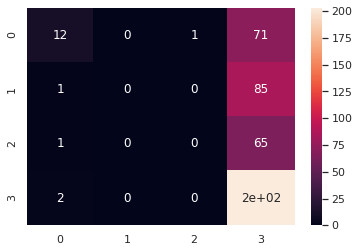

In [155]:
pred_train_y=svc.predict(train_x)
pred_test_y=svc.predict(test_x)
accuracy_score_svc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_svc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_svc_train= ",accuracy_score_svc_train)
print("accuracy_score_svc_test= ",accuracy_score_svc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)     # not accepted

In [156]:
precision_score_svc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_svc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_svc_train= ",precision_score_svc_train)
print("precision_score_svc_test= ",precision_score_svc_test)

precision_score_svc_train=  0.4779536514055529
precision_score_svc_test=  0.3654162923030847


## 4- decision tree classifier

In [157]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=1)

In [158]:
dtc.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

accuracy_score_dtc_train=  1.0
accuracy_score_dtc_test=  0.9410430839002267

confusion_matrix:-


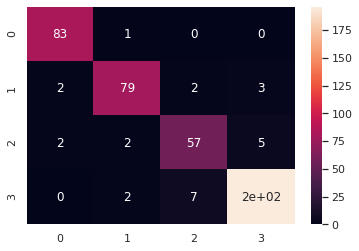

In [159]:
pred_train_y=dtc.predict(train_x)
pred_test_y=dtc.predict(test_x)
accuracy_score_dtc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_dtc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) #overfitting

In [160]:
precision_score_dtc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_dtc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_dtc_train= ",precision_score_dtc_train)
print("precision_score_dtc_test= ",precision_score_dtc_test)     

precision_score_dtc_train=  1.0
precision_score_dtc_test=  0.9409969789776884


### cross-validate

In [161]:
scores=cross_validate(dtc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.05934405, 0.05064678, 0.05982661, 0.05414748, 0.05297017,
        0.05793023, 0.04983258, 0.05891776, 0.0472548 , 0.05328274]),
 'score_time': array([0.00183868, 0.00187325, 0.00188589, 0.00187421, 0.00185633,
        0.00184011, 0.00187349, 0.00197864, 0.00182462, 0.00190043]),
 'test_accuracy': array([0.90960452, 0.92655367, 0.94350282, 0.87570621, 0.89772727,
        0.9375    , 0.93181818, 0.9375    , 0.92613636, 0.94318182]),
 'test_precision_weighted': array([0.91269504, 0.92708357, 0.94343068, 0.87891628, 0.90246212,
        0.94165929, 0.93602101, 0.93729995, 0.93194663, 0.94394454])}

In [162]:
accuracy_score_dtc_cross=scores["test_accuracy"].mean()
print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
precision_score_dtc_cross=scores["test_precision_weighted"].mean()
print("precision_score_dtc_cross= ",precision_score_dtc_cross)

accuracy_score_dtc_cross=  0.9229230868002054
precision_score_dtc_cross=  0.925545910598867


## 5- random forest classifier

In [163]:
rfc=RandomForestClassifier(n_estimators=50,random_state=1)

In [164]:
rfc.fit(train_x,train_y)

RandomForestClassifier(n_estimators=50, random_state=1)

accuracy_score_rfc_train=  1.0
accuracy_score_rfc_test=  0.963718820861678

confusion_matrix:-


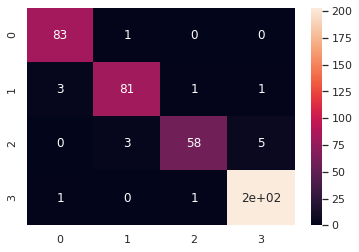

In [165]:
pred_train_y=rfc.predict(train_x)
pred_test_y=rfc.predict(test_x)
accuracy_score_rfc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_rfc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) #overfitting

In [166]:
precision_score_rfc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_rfc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_rfc_train= ",precision_score_rfc_train)
print("precision_score_rfc_test= ",precision_score_rfc_test)     

precision_score_rfc_train=  1.0
precision_score_rfc_test=  0.9637317567955521


### cross-validate

In [167]:
scores=cross_validate(rfc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.26138663, 0.25407505, 0.25784492, 0.25284457, 0.25430608,
        0.25742006, 0.26079607, 0.26383734, 0.25196218, 0.26799703]),
 'score_time': array([0.00814438, 0.00767136, 0.00770259, 0.00759482, 0.00759006,
        0.00805044, 0.00788736, 0.00763822, 0.00757337, 0.00869346]),
 'test_accuracy': array([0.94915254, 0.97175141, 0.97740113, 0.95480226, 0.97727273,
        0.98295455, 0.97159091, 0.97159091, 0.95454545, 0.97727273]),
 'test_precision_weighted': array([0.95048168, 0.9715808 , 0.9779726 , 0.9564425 , 0.97766458,
        0.98315747, 0.97329545, 0.97140198, 0.95747893, 0.97740191])}

In [168]:
accuracy_score_rfc_cross=scores["test_accuracy"].mean()
print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
precision_score_rfc_cross=scores["test_precision_weighted"].mean()
print("precision_score_rfc_cross= ",precision_score_rfc_cross)

accuracy_score_rfc_cross=  0.9688334617360039
precision_score_rfc_cross=  0.9696877906574967


## 6- tpotclassifier

In [169]:
tpotc=TPOTClassifier(generations=20,population_size=50,scoring=["accuracy","precision"],cv=5,
                    random_state=2,verbosity=2,config_dict="TPOT light",n_jobs=-1)

In [170]:
tpotc.fit(train_x,train_y)


Generation 1 - Current best internal CV score: 0.9070338655678599

Generation 2 - Current best internal CV score: 0.9263053695596188

Generation 3 - Current best internal CV score: 0.9263053695596188

Generation 4 - Current best internal CV score: 0.9263053695596188

Generation 5 - Current best internal CV score: 0.9336740278135462

Generation 6 - Current best internal CV score: 0.9829980041205253

Generation 7 - Current best internal CV score: 0.9829980041205253

Generation 8 - Current best internal CV score: 0.9852626834921452

Generation 9 - Current best internal CV score: 0.9852626834921452

Generation 10 - Current best internal CV score: 0.9852626834921452

Generation 11 - Current best internal CV score: 0.9852626834921452

Generation 12 - Current best internal CV score: 0.9920663790883338

Generation 13 - Current best internal CV score: 0.9920663790883338

Generation 14 - Current best internal CV score: 0.9920663790883338

Generation 15 - Current best internal CV score: 0.992066

TPOTClassifier(config_dict='TPOT light', generations=20, n_jobs=-1,
               population_size=50, random_state=2,
               scoring=['accuracy', 'precision'], verbosity=2)

accuracy_score_tpotc_train=  1.0
accuracy_score_tpotc_test=  0.981859410430839

confusion_matrix:-


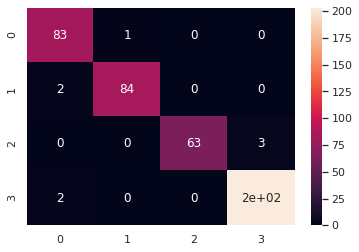

In [171]:
pred_train_y=tpotc.predict(train_x)
pred_test_y=tpotc.predict(test_x)
accuracy_score_tpotc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_tpotc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_tpotc_train= ",accuracy_score_tpotc_train)
print("accuracy_score_tpotc_test= ",accuracy_score_tpotc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [172]:
precision_score_tpotc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_tpotc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_tpotc_train= ",precision_score_tpotc_train)
print("precision_score_tpotc_test= ",precision_score_tpotc_test)

precision_score_tpotc_train=  1.0
precision_score_tpotc_test=  0.9821785247968174


## best model

In [201]:
accuracy_score_tpotc_train= 0.9931972789115646
accuracy_score_tpotc_test=0.9841269841269841
precision_score_tpotc_train=0.9932222784708485
precision_score_tpotc_test=0.9841349279175272

In [202]:
pred_train_accuracy=np.array([accuracy_score_lr_train,accuracy_score_knn_train,accuracy_score_svc_train
                     ,accuracy_score_dtc_train,accuracy_score_rfc_train,accuracy_score_tpotc_train])
pred_test_accuracy=[accuracy_score_lr_test,accuracy_score_knn_test,accuracy_score_svc_test
                     ,accuracy_score_dtc_test,accuracy_score_rfc_test,accuracy_score_tpotc_test]
pred_train_precision=[precision_score_lr_train,precision_score_knn_train,precision_score_svc_train
                   ,precision_score_dtc_train,precision_score_rfc_train,precision_score_tpotc_train]
pred_test_precision=[precision_score_lr_test,precision_score_knn_test,precision_score_svc_test
                     ,precision_score_dtc_test,precision_score_rfc_test,precision_score_tpotc_test]

In [203]:
df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])
df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])

In [204]:
df_accuracy=pd.concat([df_train_accuracy,df_test_accuracy],axis=1)
df_precision=pd.concat([df_train_precision,df_test_precision],axis=1)
df_best_model=pd.concat([df_accuracy,df_precision],keys=["accuracy","precision"],axis=1)
df_best_model.set_axis(["logistic_reg","knn","svc","decision_tree_cl","random_forest_cl","tpotclassifier"],axis=0,inplace=True)
df_best_model

accuracy           precision          
                     train      test     train      test
logistic_reg      0.988095  0.988662  0.988223  0.988918
knn               0.985261  0.979592  0.985362  0.980367
svc               0.949546  0.950113  0.952954  0.958021
decision_tree_cl  1.000000  0.941043  1.000000  0.940997
random_forest_cl  1.000000  0.963719  1.000000  0.963732
tpotclassifier    0.993197  0.984127  0.993222  0.984135

In [205]:
print("tpotclassifier(logisticregression)_target2= ",max(df_best_model.accuracy.test))

tpotclassifier(logisticregression)_target2=  0.9886621315192744


In [206]:
target2_pred_values=tpotc.predict(test_x)

## data splitting target-3

### target incidence

In [207]:
round((target_3.value_counts(normalize=True)),4)  #pump's condition is also good

0.0    0.5537
1.0    0.2231
2.0    0.2231
Name: Internal_Pump_Leakage, dtype: float64

In [208]:
train_x,test_x,train_y,test_y=train_test_split(x,target_3,test_size=0.2,random_state=1)

## feature scaling target-3

In [209]:
sc=StandardScaler()

In [210]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)   target-3

## 1- logistic regression

In [211]:
l_classifier=LogisticRegression(random_state=42)

In [212]:
l_classifier.fit(train_x,train_y)

LogisticRegression(random_state=42)

accuracy_score_lr_train=  0.9880952380952381
accuracy_score_lr_test=  0.9886621315192744

confusion_matrix:-


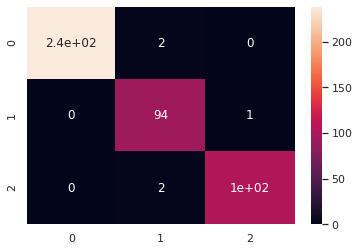

In [213]:
pred_train_y=l_classifier.predict(train_x)
pred_test_y=l_classifier.predict(test_x)
accuracy_score_lr_train=accuracy_score(train_y,pred_train_y)
accuracy_score_lr_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_lr_train= ",accuracy_score_lr_train)
print("accuracy_score_lr_test= ",accuracy_score_lr_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [214]:
precision_score_lr_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_lr_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_lr_train= ",precision_score_lr_train)
print("precision_score_lr_test= ",precision_score_lr_test)

precision_score_lr_train=  0.9882234932040569
precision_score_lr_test=  0.9889181976645534


### cross-validate

In [215]:
scores=cross_validate(l_classifier,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.08971047, 0.08465242, 0.0828464 , 0.08420014, 0.08116341,
        0.08876562, 0.08201671, 0.08032417, 0.09146214, 0.12807608]),
 'score_time': array([0.00170732, 0.00168085, 0.00167322, 0.00164819, 0.00162268,
        0.00181103, 0.00169277, 0.00166154, 0.0025363 , 0.0026257 ]),
 'test_accuracy': array([0.98305085, 0.97175141, 0.98870056, 0.98870056, 0.98295455,
        0.98863636, 0.98863636, 1.        , 0.97727273, 0.98295455]),
 'test_precision_weighted': array([0.98346769, 0.97186745, 0.98884181, 0.98884181, 0.98417208,
        0.98919069, 0.98920455, 1.        , 0.97808442, 0.98323171])}

In [216]:
accuracy_score_lr_cross=scores["test_accuracy"].mean()
print("accuracy_score_lr_cross= ",accuracy_score_lr_cross)
precision_score_lr_cross=scores["test_precision_weighted"].mean()
print("precision_score_lr_cross= ",precision_score_lr_cross)

accuracy_score_lr_cross=  0.9852657935285054
precision_score_lr_cross=  0.9856902188670971


## 2- k-nearest neighbors

In [217]:
knn=KNeighborsClassifier(n_neighbors=10,p=2)

In [218]:
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=10)

accuracy_score_knn_train=  0.9852607709750567
accuracy_score_knn_test=  0.9795918367346939

confusion_matrix:-


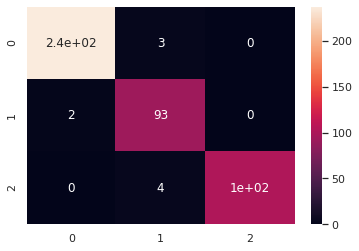

In [219]:
pred_train_y=knn.predict(train_x)
pred_test_y=knn.predict(test_x)
accuracy_score_knn_train=accuracy_score(train_y,pred_train_y)
accuracy_score_knn_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_knn_train= ",accuracy_score_knn_train)
print("accuracy_score_knn_test= ",accuracy_score_knn_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [220]:
precision_score_knn_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_knn_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_knn_train= ",precision_score_knn_train)
print("precision_score_knn_test= ",precision_score_knn_test)

precision_score_knn_train=  0.9853623893212177
precision_score_knn_test=  0.980366512016243


### cross-validate

In [221]:
scores=cross_validate(knn,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.00437331, 0.00329232, 0.00332069, 0.00323868, 0.00332046,
        0.00326157, 0.00331068, 0.00370526, 0.00334668, 0.00336242]),
 'score_time': array([0.01166272, 0.00975847, 0.00972652, 0.0095582 , 0.00963664,
        0.0107758 , 0.00966692, 0.00988626, 0.00969887, 0.0102849 ]),
 'test_accuracy': array([0.97740113, 0.98870056, 0.98870056, 0.97740113, 0.97727273,
        0.97727273, 0.98295455, 0.98863636, 0.98295455, 0.97727273]),
 'test_precision_weighted': array([0.97761848, 0.98870056, 0.98884181, 0.97945557, 0.97755682,
        0.97751993, 0.98308507, 0.98917749, 0.98318735, 0.97763665])}

In [222]:
accuracy_score_knn_cross=scores["test_accuracy"].mean()
print("accuracy_score_knn_cross= ",accuracy_score_knn_cross)
precision_score_knn_cross=scores["test_precision_weighted"].mean()
print("precision_score_knn_cross= ",precision_score_knn_cross)

accuracy_score_knn_cross=  0.9818567026194144
precision_score_knn_cross=  0.9822779725027448


## 3- SVC

In [223]:
svc=SVC(kernel="rbf")

In [224]:
svc.fit(train_x,train_y)

SVC()

accuracy_score_svc_train=  0.949546485260771
accuracy_score_svc_test=  0.9501133786848073

confusion_matrix:-


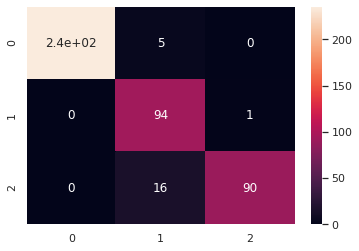

In [225]:
pred_train_y=svc.predict(train_x)
pred_test_y=svc.predict(test_x)
accuracy_score_svc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_svc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_svc_train= ",accuracy_score_svc_train)
print("accuracy_score_svc_test= ",accuracy_score_svc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [226]:
precision_score_svc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_svc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_svc_train= ",precision_score_svc_train)
print("precision_score_svc_test= ",precision_score_svc_test)

precision_score_svc_train=  0.9529537232067716
precision_score_svc_test=  0.9580211762997921


### cross-validate

In [227]:
scores=cross_validate(svc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.07813954, 0.07891846, 0.07733011, 0.07884908, 0.07711005,
        0.07899117, 0.08228898, 0.0767765 , 0.07670808, 0.07706857]),
 'score_time': array([0.00907636, 0.00915384, 0.00951624, 0.0091815 , 0.00929928,
        0.01061058, 0.00950551, 0.00941992, 0.00921464, 0.00918365]),
 'test_accuracy': array([0.93785311, 0.92090395, 0.94350282, 0.92090395, 0.9375    ,
        0.95454545, 0.96590909, 0.94318182, 0.93181818, 0.92613636]),
 'test_precision_weighted': array([0.94376445, 0.9268878 , 0.95480226, 0.93590493, 0.94105392,
        0.95676973, 0.96638643, 0.95018939, 0.94353525, 0.93560606])}

In [228]:
accuracy_score_svc_cross=scores["test_accuracy"].mean()
print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
precision_score_svc_cross=scores["test_precision_weighted"].mean()
print("precision_score_svc_cross= ",precision_score_svc_cross)

accuracy_score_svc_cross=  0.9382254750898819
precision_score_svc_cross=  0.9454900220139321


## 4- naive-bayes classifier

In [229]:
nbc=GaussianNB()

In [230]:
nbc.fit(train_x,train_y)

GaussianNB()

accuracy_score_nbc_train=  0.6054421768707483
accuracy_score_nbc_test=  0.5827664399092971

confusion_matrix:-


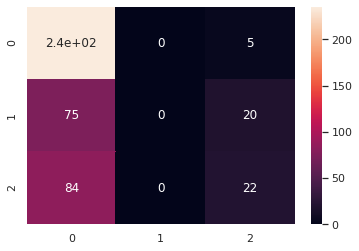

In [231]:
pred_train_y=nbc.predict(train_x)
pred_test_y=nbc.predict(test_x)
accuracy_score_nbc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_nbc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_nbc_train= ",accuracy_score_nbc_train)
print("accuracy_score_nbc_test= ",accuracy_score_nbc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [232]:
precision_score_nbc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_nbc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_nbc_train= ",precision_score_nbc_train)
print("precision_score_nbc_test= ",precision_score_nbc_test)     #not accepted

precision_score_nbc_train=  0.4541299501830631
precision_score_nbc_test=  0.4371070961415491


## best model 

In [233]:
pred_train_accuracy=[accuracy_score_lr_train,accuracy_score_knn_train,accuracy_score_svc_train,accuracy_score_nbc_train
                     ]
pred_test_accuracy=[accuracy_score_lr_test,accuracy_score_knn_test,accuracy_score_svc_test,accuracy_score_nbc_test
                     ]
pred_train_precision=[precision_score_lr_train,precision_score_knn_train,precision_score_svc_train,
                     precision_score_nbc_train]
pred_test_precision=[precision_score_lr_test,precision_score_knn_test,precision_score_svc_test,
                     precision_score_nbc_test]

In [234]:
df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])

In [235]:
df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])

In [236]:
df_accuracy=pd.concat([df_train_accuracy,df_test_accuracy],axis=1)
df_precision=pd.concat([df_train_precision,df_test_precision],axis=1)
df_best_model=pd.concat([df_accuracy,df_precision],keys=["accuracy","precision"],axis=1)
df_best_model.set_axis(["logistic_reg","knn","svc","naive_bayes"],axis=0,inplace=True)
df_best_model

accuracy           precision          
                 train      test     train      test
logistic_reg  0.988095  0.988662  0.988223  0.988918
knn           0.985261  0.979592  0.985362  0.980367
svc           0.949546  0.950113  0.952954  0.958021
naive_bayes   0.605442  0.582766  0.454130  0.437107

In [237]:
print("logistic_regression_target3= ",0.988918)

logistic_regression_target3=  0.988918


In [238]:
target3_pred_values=l_classifier.predict(test_x)

## data splitting target-4

### target incidence

In [239]:
round((target_4.value_counts(normalize=True)),4)     #hydraulic accumulator's condition is not good

90.0     0.3664
130.0    0.2717
115.0    0.1810
100.0    0.1810
Name: Hydraulic_Accumulator, dtype: float64

In [240]:
train_x,test_x,train_y,test_y=train_test_split(x,target_4,test_size=0.2,random_state=1)

## feature scaling target-4

In [241]:
sc=StandardScaler()

In [242]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)   target-4

## 1- logistic regression

In [243]:
l_classifier=LogisticRegression(random_state=1)

In [244]:
l_classifier.fit(train_x,train_y)

LogisticRegression(random_state=1)

accuracy_score_lr_train=  0.6456916099773242
accuracy_score_lr_test=  0.6122448979591837

confusion_matrix:-


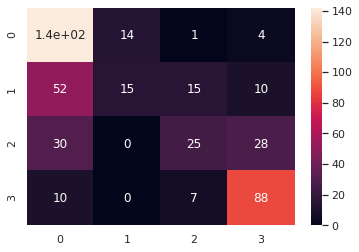

In [245]:
pred_train_y=l_classifier.predict(train_x)
pred_test_y=l_classifier.predict(test_x)
accuracy_score_lr_train=accuracy_score(train_y,pred_train_y)
accuracy_score_lr_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_lr_train= ",accuracy_score_lr_train)
print("accuracy_score_lr_test= ",accuracy_score_lr_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)       #not accepted

In [246]:
precision_score_lr_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_lr_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_lr_train= ",precision_score_lr_train)
print("precision_score_lr_test= ",precision_score_lr_test)       

precision_score_lr_train=  0.6160489166020213
precision_score_lr_test=  0.5886466016802635


## 2- knn

In [247]:
knn=KNeighborsClassifier(n_neighbors=5,p=2)

In [248]:
knn.fit(train_x,train_y)

KNeighborsClassifier()

accuracy_score_knn_train=  0.9563492063492064
accuracy_score_knn_test=  0.9455782312925171

confusion_matrix:-


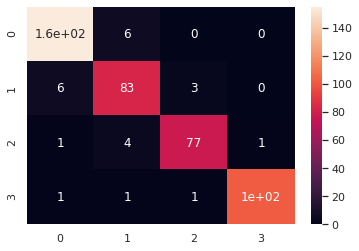

In [249]:
pred_train_y=knn.predict(train_x)
pred_test_y=knn.predict(test_x)
accuracy_score_knn_train=accuracy_score(train_y,pred_train_y)
accuracy_score_knn_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_knn_train= ",accuracy_score_knn_train)
print("accuracy_score_knn_test= ",accuracy_score_knn_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [250]:
precision_score_knn_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_knn_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_knn_train= ",precision_score_knn_train)
print("precision_score_knn_test= ",precision_score_knn_test)

precision_score_knn_train=  0.9563237596665205
precision_score_knn_test=  0.9460635354978844


### cross-validate

In [251]:
scores=cross_validate(knn,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.00460172, 0.00368524, 0.00360274, 0.00359464, 0.0039916 ,
        0.00399494, 0.00423026, 0.00364804, 0.0035162 , 0.00357342]),
 'score_time': array([0.01075125, 0.00980616, 0.00968623, 0.01077294, 0.0106709 ,
        0.01182842, 0.01009989, 0.00965428, 0.00974703, 0.00975657]),
 'test_accuracy': array([0.93785311, 0.95480226, 0.92090395, 0.93785311, 0.92045455,
        0.90909091, 0.91477273, 0.93181818, 0.89204545, 0.93181818]),
 'test_precision_weighted': array([0.93992895, 0.95550847, 0.9219647 , 0.93973445, 0.91978743,
        0.91043586, 0.91970435, 0.93202459, 0.89752183, 0.93150704])}

In [252]:
accuracy_score_knn_cross=scores["test_accuracy"].mean()
print("accuracy_score_knn_cross= ",accuracy_score_knn_cross)
precision_score_knn_cross=scores["test_precision_weighted"].mean()
print("precision_score_knn_cross= ",precision_score_knn_cross)

accuracy_score_knn_cross=  0.9251412429378532
precision_score_knn_cross=  0.9268117674239533


## 3- SVC

In [253]:
svc=SVC(kernel="rbf")

In [254]:
svc.fit(train_x,train_y)

SVC()

accuracy_score_svc_train=  0.6003401360544217
accuracy_score_svc_test=  0.5714285714285714

confusion_matrix:-


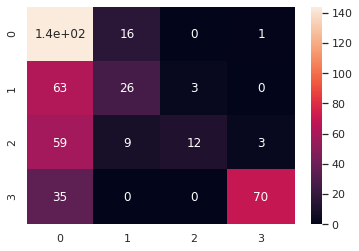

In [255]:
pred_train_y=svc.predict(train_x)
pred_test_y=svc.predict(test_x)
accuracy_score_svc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_svc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_svc_train= ",accuracy_score_svc_train)
print("accuracy_score_svc_test= ",accuracy_score_svc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)      #not accepted

In [256]:
precision_score_svc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_svc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_svc_train= ",precision_score_svc_train)
print("precision_score_svc_test= ",precision_score_svc_test)

precision_score_svc_train=  0.6764062562366435
precision_score_svc_test=  0.6568016800965795


## 4- naive bayes

In [257]:
nbc=GaussianNB()

In [258]:
nbc.fit(train_x,train_y)

GaussianNB()

accuracy_score_nbc_train=  0.41099773242630383
accuracy_score_nbc_test=  0.3741496598639456

confusion_matrix:-


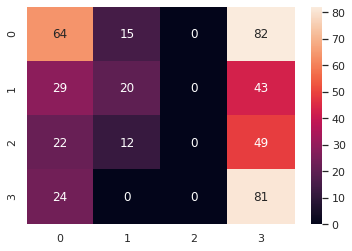

In [259]:
pred_train_y=nbc.predict(train_x)
pred_test_y=nbc.predict(test_x)
accuracy_score_nbc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_nbc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_nbc_train= ",accuracy_score_nbc_train)
print("accuracy_score_nbc_test= ",accuracy_score_nbc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)      #not accepted

In [260]:
precision_score_nbc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_nbc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_nbc_train= ",precision_score_nbc_train)
print("precision_score_nbc_test= ",precision_score_nbc_test)     

precision_score_nbc_train=  0.3412596859379081
precision_score_nbc_test=  0.33249744614412935


## 5- decision tree classifier

In [261]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=1)

In [262]:
dtc.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

accuracy_score_dtc_train=  1.0
accuracy_score_dtc_test=  0.9523809523809523

confusion_matrix:-


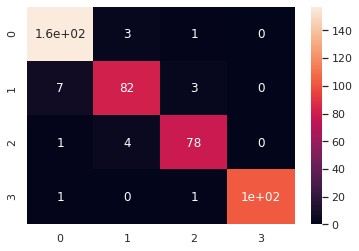

In [263]:
pred_train_y=dtc.predict(train_x)
pred_test_y=dtc.predict(test_x)
accuracy_score_dtc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_dtc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)    #overfitting

In [264]:
precision_score_dtc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_dtc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_dtc_train= ",precision_score_dtc_train)
print("precision_score_dtc_test= ",precision_score_dtc_test)    

precision_score_dtc_train=  1.0
precision_score_dtc_test=  0.9524606106148972


### cross-validate

In [265]:
scores=cross_validate(dtc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.05378413, 0.0508728 , 0.05428576, 0.05358529, 0.05254579,
        0.04953599, 0.05125737, 0.05182123, 0.05145884, 0.05326986]),
 'score_time': array([0.00216579, 0.00370693, 0.00253582, 0.00211239, 0.00208592,
        0.0020299 , 0.00201344, 0.00211668, 0.00207758, 0.00209308]),
 'test_accuracy': array([0.92655367, 0.92090395, 0.93220339, 0.95480226, 0.90909091,
        0.94318182, 0.95454545, 0.9375    , 0.94886364, 0.94886364]),
 'test_precision_weighted': array([0.9296303 , 0.92254791, 0.93585279, 0.95568285, 0.9115754 ,
        0.94286845, 0.95471366, 0.94079288, 0.95109626, 0.94972261])}

In [266]:
accuracy_score_dtc_cross=scores["test_accuracy"].mean()
print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
precision_score_dtc_cross=scores["test_precision_weighted"].mean()
print("precision_score_dtc_cross= ",precision_score_dtc_cross)

accuracy_score_dtc_cross=  0.9376508731381612
precision_score_dtc_cross=  0.9394483098125861


## 6- random forest classifier

In [267]:
rfc=RandomForestClassifier(n_estimators=100,random_state=1)

In [268]:
rfc.fit(train_x,train_y)

RandomForestClassifier(random_state=1)

accuracy_score_rfc_train=  1.0
accuracy_score_rfc_test=  0.9773242630385488

confusion_matrix:-


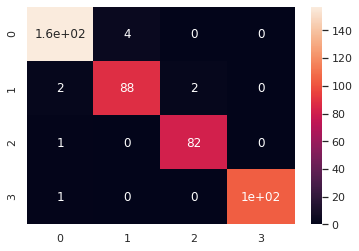

In [269]:
pred_train_y=rfc.predict(train_x)
pred_test_y=rfc.predict(test_x)
accuracy_score_rfc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_rfc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) #overfitting

In [270]:
precision_score_rfc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_rfc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_rfc_train= ",precision_score_rfc_train)
print("precision_score_rfc_test= ",precision_score_rfc_test)     

precision_score_rfc_train=  1.0
precision_score_rfc_test=  0.9773782528884569


### cross-validate

In [271]:
scores=cross_validate(rfc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.49573946, 0.48244667, 0.5091939 , 0.48398137, 0.48649311,
        0.48683   , 0.48575783, 0.52497363, 0.52677727, 0.47748971]),
 'score_time': array([0.01259279, 0.0128212 , 0.0127337 , 0.01240611, 0.01224422,
        0.01350927, 0.01319695, 0.01331115, 0.01259851, 0.01227236]),
 'test_accuracy': array([0.97740113, 0.98305085, 0.98870056, 1.        , 0.96590909,
        0.96022727, 0.97159091, 0.98295455, 0.94886364, 0.97727273]),
 'test_precision_weighted': array([0.97757768, 0.98357516, 0.98904832, 1.        , 0.96987875,
        0.96216475, 0.97187677, 0.98375689, 0.9525994 , 0.97848334])}

In [272]:
accuracy_score_rfc_cross=scores["test_accuracy"].mean()
print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
precision_score_rfc_cross=scores["test_precision_weighted"].mean()
print("precision_score_rfc_cross= ",precision_score_rfc_cross)

accuracy_score_rfc_cross=  0.9755970724191062
precision_score_rfc_cross=  0.9768961069727954


## best model

In [273]:
pred_train_accuracy=np.array([accuracy_score_lr_train,accuracy_score_knn_train,accuracy_score_svc_train,accuracy_score_nbc_train
                     ,accuracy_score_dtc_train,accuracy_score_rfc_train])
pred_test_accuracy=[accuracy_score_lr_test,accuracy_score_knn_test,accuracy_score_svc_test,accuracy_score_nbc_test
                     ,accuracy_score_dtc_test,accuracy_score_rfc_test]
pred_train_precision=[precision_score_lr_train,precision_score_knn_train,precision_score_svc_train,
                     precision_score_nbc_train,precision_score_dtc_train,precision_score_rfc_train]
pred_test_precision=[precision_score_lr_test,precision_score_knn_test,precision_score_svc_test,
                     precision_score_nbc_test,precision_score_dtc_test,precision_score_rfc_test]

In [274]:
df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])
df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])

In [275]:
df_accuracy=pd.concat([df_train_accuracy,df_test_accuracy],axis=1)
df_precision=pd.concat([df_train_precision,df_test_precision],axis=1)
df_best_model=pd.concat([df_accuracy,df_precision],keys=["accuracy","precision"],axis=1)
df_best_model.set_axis(["logistic_reg","knn","svc","naive_bayes","decision_tree_cl","random_forest_cl"],axis=0,inplace=True)
df_best_model

accuracy           precision          
                     train      test     train      test
logistic_reg      0.645692  0.612245  0.616049  0.588647
knn               0.956349  0.945578  0.956324  0.946064
svc               0.600340  0.571429  0.676406  0.656802
naive_bayes       0.410998  0.374150  0.341260  0.332497
decision_tree_cl  1.000000  0.952381  1.000000  0.952461
random_forest_cl  1.000000  0.977324  1.000000  0.977378

In [276]:
print("knearestneighbors_target4= ",0.946064)

knearestneighbors_target4=  0.946064


In [277]:
target4_pred_values=knn.predict(test_x)

## data splitting final-target

In [278]:
y_ind=y.iloc[:,:-1]
y_ind.head()

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
0,3.0,100.0,0.0,130.0
1,3.0,100.0,0.0,130.0
2,3.0,100.0,0.0,130.0
3,3.0,100.0,0.0,130.0
4,3.0,100.0,0.0,130.0


In [279]:
final_target.head(2)

0    1
1    1
Name: Stable_Flag, dtype: int64

### target incidence

In [280]:
final_target.value_counts(normalize=True)

0    0.657143
1    0.342857
Name: Stable_Flag, dtype: float64

In [281]:
train_x,test_x,train_y,test_y=train_test_split(y_ind,final_target,test_size=0.2,random_state=1,stratify=final_target)

## feature scaling  final target

In [282]:
sc=StandardScaler()

In [283]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification) final target

## 1- logistic regression

In [284]:
l_classifier=LogisticRegression(random_state=1)

In [285]:
l_classifier.fit(train_x,train_y)

LogisticRegression(random_state=1)

accuracy_score_lr_train=  0.9308390022675737
accuracy_score_lr_test=  0.9297052154195011

confusion_matrix:-


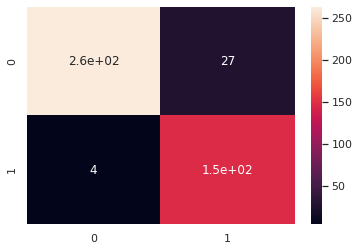

In [286]:
pred_train_y=l_classifier.predict(train_x)
pred_test_y=l_classifier.predict(test_x)
accuracy_score_lr_train=accuracy_score(train_y,pred_train_y)
accuracy_score_lr_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_lr_train= ",accuracy_score_lr_train)
print("accuracy_score_lr_test= ",accuracy_score_lr_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [287]:
precision_score_lr_train=precision_score(train_y,pred_train_y)
precision_score_lr_test=precision_score(test_y,pred_test_y)
print("precision_score_lr_train= ",precision_score_lr_train)
print("precision_score_lr_test= ",precision_score_lr_test)       

precision_score_lr_train=  0.851528384279476
precision_score_lr_test=  0.8448275862068966


In [288]:
metrics.roc_auc_score(test_y,l_classifier.predict_proba(test_x)[:,1])

0.9581068737154601

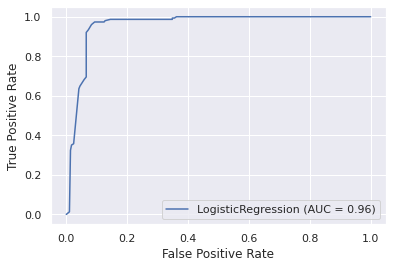

In [289]:
metrics.plot_roc_curve(l_classifier,test_x,test_y)

### cross-validate

In [290]:
scores=cross_validate(l_classifier,train_x,train_y,scoring=["accuracy","precision"],cv=10)
scores

{'fit_time': array([0.00836325, 0.00742602, 0.00719643, 0.00850153, 0.00692201,
        0.00769544, 0.00736308, 0.00750732, 0.00746083, 0.00742555]),
 'score_time': array([0.00217867, 0.00165462, 0.00153852, 0.00159097, 0.00152493,
        0.00159383, 0.00152659, 0.00164986, 0.00155902, 0.00154877]),
 'test_accuracy': array([0.94350282, 0.92655367, 0.93220339, 0.93785311, 0.94886364,
        0.91477273, 0.94318182, 0.92613636, 0.91477273, 0.92045455]),
 'test_precision': array([0.85915493, 0.85294118, 0.84507042, 0.84722222, 0.89230769,
        0.81690141, 0.86764706, 0.85074627, 0.8358209 , 0.85074627])}

In [291]:
accuracy_score_lr_cross=scores["test_accuracy"].mean()
print("accuracy_score_lr_cross= ",accuracy_score_lr_cross)
precision_score_lr_cross=scores["test_precision"].mean()
print("precision_score_lr_cross= ",precision_score_lr_cross)  

accuracy_score_lr_cross=  0.9308294812532101
precision_score_lr_cross=  0.8518558343223234


## 2- knn

In [292]:
knn=KNeighborsClassifier(n_neighbors=5,p=2)

In [293]:
knn.fit(train_x,train_y)

KNeighborsClassifier()

accuracy_score_knn_train=  0.8424036281179138
accuracy_score_knn_test=  0.8367346938775511

confusion_matrix:-


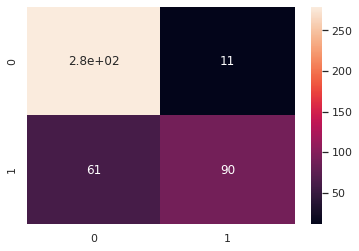

In [294]:
pred_train_y=knn.predict(train_x)
pred_test_y=knn.predict(test_x)
accuracy_score_knn_train=accuracy_score(train_y,pred_train_y)
accuracy_score_knn_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_knn_train= ",accuracy_score_knn_train)
print("accuracy_score_knn_test= ",accuracy_score_knn_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [295]:
precision_score_knn_train=precision_score(train_y,pred_train_y)
precision_score_knn_test=precision_score(test_y,pred_test_y)
print("precision_score_knn_train= ",precision_score_knn_train)
print("precision_score_knn_test= ",precision_score_knn_test)

precision_score_knn_train=  0.8847058823529412
precision_score_knn_test=  0.8910891089108911


### cross-validate

In [296]:
scores=cross_validate(knn,train_x,train_y,scoring=["accuracy","precision"],cv=10)
scores

{'fit_time': array([0.00295997, 0.00296402, 0.00263453, 0.00272155, 0.00291204,
        0.00240755, 0.00269461, 0.00247192, 0.00231647, 0.00271034]),
 'score_time': array([0.0103066 , 0.00918365, 0.00973105, 0.0097363 , 0.00898337,
        0.00851393, 0.00896931, 0.0089879 , 0.00834846, 0.00904512]),
 'test_accuracy': array([0.94915254, 0.90960452, 0.93220339, 0.92090395, 0.9375    ,
        0.92613636, 0.93181818, 0.92045455, 0.91477273, 0.90340909]),
 'test_precision': array([0.91935484, 0.85714286, 0.87692308, 0.84057971, 0.91525424,
        0.84057971, 0.9       , 0.89655172, 0.85714286, 0.86666667])}

In [297]:
accuracy_score_knn_cross=scores["test_accuracy"].mean()
print("accuracy_score_knn_cross= ",accuracy_score_knn_cross)
precision_score_knn_cross=scores["test_precision"].mean()
print("precision_score_knn_cross= ",precision_score_knn_cross)

accuracy_score_knn_cross=  0.9245955315870571
precision_score_knn_cross=  0.8770195678301056


## 3- SVC

In [298]:
svc=SVC(kernel="rbf",probability=True)

In [299]:
svc.fit(train_x,train_y)

SVC(probability=True)

accuracy_score_svc_train=  0.9308390022675737
accuracy_score_svc_test=  0.9297052154195011

confusion_matrix:-


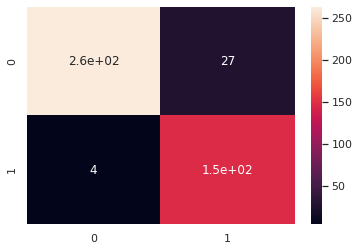

In [300]:
pred_train_y=svc.predict(train_x)
pred_test_y=svc.predict(test_x)
accuracy_score_svc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_svc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_svc_train= ",accuracy_score_svc_train)
print("accuracy_score_svc_test= ",accuracy_score_svc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [301]:
precision_score_svc_train=precision_score(train_y,pred_train_y)
precision_score_svc_test=precision_score(test_y,pred_test_y)
print("precision_score_svc_train= ",precision_score_svc_train)
print("precision_score_svc_test= ",precision_score_svc_test)

precision_score_svc_train=  0.851528384279476
precision_score_svc_test=  0.8448275862068966


In [302]:
metrics.roc_auc_score(test_y,svc.predict_proba(test_x)[:,1])

0.9663736012788308

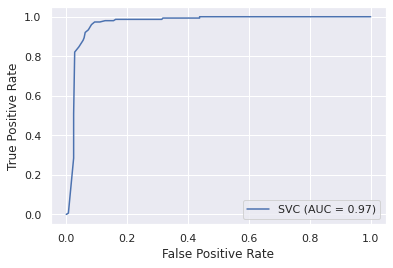

In [303]:
metrics.plot_roc_curve(svc,test_x,test_y)

### cross-validate

In [304]:
scores=cross_validate(svc,train_x,train_y,scoring=["accuracy","precision"],cv=10)
scores

{'fit_time': array([0.10084367, 0.0966897 , 0.09857821, 0.09574819, 0.10072374,
        0.09997845, 0.09948063, 0.09627032, 0.0999589 , 0.09445548]),
 'score_time': array([0.00318718, 0.00307822, 0.00309038, 0.00307989, 0.00310349,
        0.00308943, 0.00312972, 0.00304341, 0.00323462, 0.00305557]),
 'test_accuracy': array([0.93220339, 0.92655367, 0.93220339, 0.93220339, 0.94886364,
        0.91477273, 0.94318182, 0.92613636, 0.91477273, 0.91477273]),
 'test_precision': array([0.85507246, 0.85294118, 0.84507042, 0.84507042, 0.89230769,
        0.81690141, 0.86764706, 0.85074627, 0.8358209 , 0.859375  ])}

In [305]:
accuracy_score_svc_cross=scores["test_accuracy"].mean()
print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
precision_score_svc_cross=scores["test_precision"].mean()
print("precision_score_svc_cross= ",precision_score_svc_cross)

accuracy_score_svc_cross=  0.9285663841807908
precision_score_svc_cross=  0.8520952809070156


## 4- naive bayes

In [306]:
nbc=GaussianNB()

In [307]:
nbc.fit(train_x,train_y)

GaussianNB()

accuracy_score_nbc_train=  0.8849206349206349
accuracy_score_nbc_test=  0.8684807256235828

confusion_matrix:-


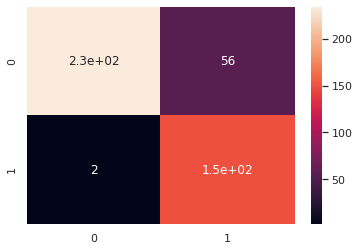

In [308]:
pred_train_y=nbc.predict(train_x)
pred_test_y=nbc.predict(test_x)
accuracy_score_nbc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_nbc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_nbc_train= ",accuracy_score_nbc_train)
print("accuracy_score_nbc_test= ",accuracy_score_nbc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)    

In [309]:
precision_score_nbc_train=precision_score(train_y,pred_train_y)
precision_score_nbc_test=precision_score(test_y,pred_test_y)
print("precision_score_nbc_train= ",precision_score_nbc_train)
print("precision_score_nbc_test= ",precision_score_nbc_test)     

precision_score_nbc_train=  0.7550761421319797
precision_score_nbc_test=  0.7268292682926829


## 5- decision tree classifier

In [310]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=1)

In [311]:
dtc.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

accuracy_score_dtc_train=  0.9319727891156463
accuracy_score_dtc_test=  0.9160997732426304

confusion_matrix:-


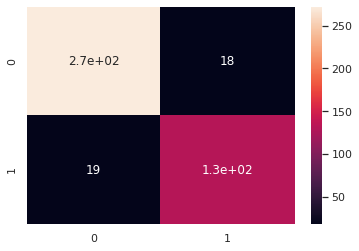

In [312]:
pred_train_y=dtc.predict(train_x)
pred_test_y=dtc.predict(test_x)
accuracy_score_dtc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_dtc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)  

In [313]:
precision_score_dtc_train=precision_score(train_y,pred_train_y)
precision_score_dtc_test=precision_score(test_y,pred_test_y)
print("precision_score_dtc_train= ",precision_score_dtc_train)
print("precision_score_dtc_test= ",precision_score_dtc_test)    

precision_score_dtc_train=  0.886762360446571
precision_score_dtc_test=  0.88


In [314]:
metrics.roc_auc_score(test_y,dtc.predict_proba(test_x)[:,1])

0.9681776661338204

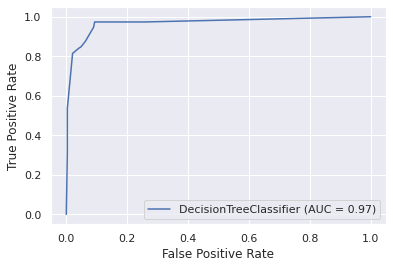

In [315]:
metrics.plot_roc_curve(dtc,test_x,test_y)

### cross-validate

In [316]:
scores=cross_validate(dtc,train_x,train_y,scoring=["accuracy","precision"],cv=10)
scores

{'fit_time': array([0.00221658, 0.00197673, 0.001894  , 0.00177169, 0.00170851,
        0.00162745, 0.0016017 , 0.00157738, 0.00156307, 0.00151587]),
 'score_time': array([0.00179529, 0.00168109, 0.00251651, 0.00150585, 0.00143504,
        0.00139785, 0.00153637, 0.00140762, 0.00137067, 0.0013504 ]),
 'test_accuracy': array([0.92090395, 0.89830508, 0.9039548 , 0.91525424, 0.9375    ,
        0.91477273, 0.92613636, 0.90340909, 0.90909091, 0.90909091]),
 'test_precision': array([0.8852459 , 0.85245902, 0.87931034, 0.83823529, 0.91525424,
        0.82608696, 0.8852459 , 0.87719298, 0.84375   , 0.85714286])}

In [317]:
accuracy_score_dtc_cross=scores["test_accuracy"].mean()
print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
precision_score_dtc_cross=scores["test_precision"].mean()
print("precision_score_dtc_cross= ",precision_score_dtc_cross)

accuracy_score_dtc_cross=  0.9138418079096043
precision_score_dtc_cross=  0.8659923492026238


## 6- random forest classifier

In [318]:
rfc=RandomForestClassifier(n_estimators=100,random_state=1)

In [319]:
rfc.fit(train_x,train_y)

RandomForestClassifier(random_state=1)

accuracy_score_rfc_train=  0.9319727891156463
accuracy_score_rfc_test=  0.9183673469387755

confusion_matrix:-


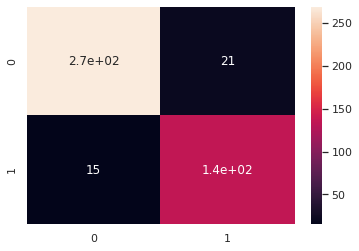

In [320]:
pred_train_y=rfc.predict(train_x)
pred_test_y=rfc.predict(test_x)
accuracy_score_rfc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_rfc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) #overfitting

In [321]:
precision_score_rfc_train=precision_score(train_y,pred_train_y)
precision_score_rfc_test=precision_score(test_y,pred_test_y)
print("precision_score_rfc_train= ",precision_score_rfc_train)
print("precision_score_rfc_test= ",precision_score_rfc_test)     

precision_score_rfc_train=  0.8783151326053042
precision_score_rfc_test=  0.8662420382165605


In [322]:
metrics.roc_auc_score(test_y,rfc.predict_proba(test_x)[:,1])

0.9689312628453983

In [323]:
metrics.roc_auc_score(train_y,rfc.predict_proba(train_x)[:,1])

0.9771875155983714

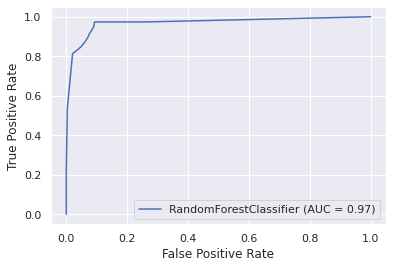

In [324]:
metrics.plot_roc_curve(rfc,test_x,test_y)

### cross-validate

In [325]:
scores=cross_validate(rfc,train_x,train_y,scoring=["accuracy","precision"],cv=10)
scores

{'fit_time': array([0.17262936, 0.17521524, 0.1766336 , 0.17151928, 0.17185807,
        0.17024136, 0.1689887 , 0.17078018, 0.16798615, 0.1692605 ]),
 'score_time': array([0.0112412 , 0.01135111, 0.01214767, 0.011168  , 0.01115751,
        0.01125002, 0.01111174, 0.01107287, 0.01126027, 0.01111031]),
 'test_accuracy': array([0.93220339, 0.89830508, 0.90960452, 0.91525424, 0.9375    ,
        0.91477273, 0.92613636, 0.91477273, 0.90909091, 0.90909091]),
 'test_precision': array([0.85507246, 0.85245902, 0.85714286, 0.83823529, 0.91525424,
        0.82608696, 0.8852459 , 0.88135593, 0.84375   , 0.85714286])}

In [326]:
accuracy_score_rfc_cross=scores["test_accuracy"].mean()
print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
precision_score_rfc_cross=scores["test_precision"].mean()
print("precision_score_rfc_cross= ",precision_score_rfc_cross)

accuracy_score_rfc_cross=  0.9166730868002053
precision_score_rfc_cross=  0.8611745516217528


## best model

In [327]:
print("random_forest_classifier_roc_auc_score= ",round(0.9689312628453983,4))

random_forest_classifier_roc_auc_score=  0.9689


# Final_data for testing with final_target

In [328]:
df_final_data_testing_final_target=pd.DataFrame({"Cooler_Condition":target1_pred_values,"Valve_Condition":target2_pred_values
                                                 ,"Internal_Pump_Leakage":target3_pred_values,"Hydraulic_Accumulator":target4_pred_values})

In [329]:
df_final_data_testing_final_target.head()

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
0,20.0,100.0,0.0,90.0
1,3.0,73.0,1.0,90.0
2,3.0,80.0,0.0,115.0
3,100.0,100.0,0.0,90.0
4,20.0,90.0,2.0,90.0


# Final Results Of Stable Flag 

In [330]:
df_final_data_testing_final_target.head()

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
0,20.0,100.0,0.0,90.0
1,3.0,73.0,1.0,90.0
2,3.0,80.0,0.0,115.0
3,100.0,100.0,0.0,90.0
4,20.0,90.0,2.0,90.0


In [331]:
df_final_data_testing_final_target.var()

Cooler_Condition         1733.179293
Valve_Condition           122.906627
Internal_Pump_Leakage       0.688384
Hydraulic_Accumulator     252.270666
dtype: float64

In [332]:
std_final_data_testing_final_target=StandardScaler().fit_transform(df_final_data_testing_final_target)
std_final_data_testing_final_target

array([[-0.47102702,  0.95811968, -0.84273252, -1.01265345],
       [-0.87983572, -1.48007887,  0.36390722, -1.01265345],
       [-0.87983572, -0.84795332, -0.84273252,  0.56314108],
       ...,
       [ 1.45277864, -1.48007887,  1.57054696,  0.56314108],
       [ 1.45277864, -0.84795332,  0.36390722, -1.01265345],
       [ 1.45277864,  0.95811968,  0.36390722,  1.5086178 ]])

In [333]:
pred_values_per_minute=rfc.predict(std_final_data_testing_final_target)
pred_values_per_minute

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [334]:
np.sum(pred_values_per_minute==0)/len(test_x)

0.6621315192743764

In [335]:
np.sum(pred_values_per_minute==1)/len(test_x)

0.3378684807256236

# Models for predicting machine failure before 15 minutes

## data analysis

In [336]:
df_final.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,...,31.745250,0.576950,39.601350,1.862750,59.157183,3.0,100.0,0.0,130.0,1.0
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,...,34.493867,0.565850,25.786433,1.255550,59.335617,3.0,100.0,0.0,130.0,1.0
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,...,35.646150,0.576533,22.218233,1.113217,59.543150,3.0,100.0,0.0,130.0,1.0
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,...,36.579467,0.569267,20.459817,1.062150,59.794900,3.0,100.0,0.0,130.0,1.0
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,...,37.427900,0.577367,19.787017,1.070467,59.455267,3.0,100.0,0.0,130.0,1.0


In [337]:
len(df_final)

2205

In [338]:
2205/15

147.0

In [339]:
x.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267


In [340]:
y.head()

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,3.0,100.0,0.0,130.0,1.0
1,3.0,100.0,0.0,130.0,1.0
2,3.0,100.0,0.0,130.0,1.0
3,3.0,100.0,0.0,130.0,1.0
4,3.0,100.0,0.0,130.0,1.0


In [341]:
y_15=y.iloc[:,:-1]

In [342]:
y_15=y_15.iloc[14:,:]
y_15

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
14,3.0,100.0,0.0,130.0
15,3.0,100.0,0.0,130.0
16,3.0,100.0,0.0,130.0
17,3.0,100.0,0.0,130.0
18,3.0,100.0,0.0,130.0
...,...,...,...,...
2200,100.0,100.0,0.0,90.0
2201,100.0,100.0,0.0,90.0
2202,100.0,100.0,0.0,90.0
2203,100.0,100.0,0.0,90.0


In [343]:
y_15=y_15.set_axis(range(2191),axis=0)
y_15.head()

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
0,3.0,100.0,0.0,130.0
1,3.0,100.0,0.0,130.0
2,3.0,100.0,0.0,130.0
3,3.0,100.0,0.0,130.0
4,3.0,100.0,0.0,130.0


In [344]:
len(y_15)

2191

In [345]:
x_15=x.iloc[:-14,:]
x_15

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.000000,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.000000,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.000000,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.000000,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.000000,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,161.205853,109.776600,1.993403,10.190875,9.958828,9.838262,2542.299033,6.694062,10.178625,35.404933,41.019383,38.386100,30.538517,0.547483,46.220433,2.152333,59.067717
2187,161.221512,109.760709,2.004699,10.190570,9.960782,9.840654,2544.374667,6.693118,10.180423,35.397683,41.007183,38.378233,30.443167,0.548450,46.735950,2.176400,59.049367
2188,161.206088,109.753828,2.000701,10.190674,9.961115,9.841230,2542.845567,6.691213,10.178522,35.391017,41.007283,38.362933,30.528667,0.546333,46.185100,2.149250,59.031867
2189,161.223148,109.780725,2.002671,10.196765,9.966036,9.846218,2545.004300,6.694732,10.181055,35.380583,40.994550,38.356117,30.474417,0.549417,46.492533,2.163483,59.043150


In [346]:
x_15=x_15.set_axis(range(2191),axis=0)
x_15.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267


In [347]:
df_final_15=pd.concat([x_15,y_15],axis=1)
df_final_15.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS3,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,...,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183,3.0,100.0,0.0,130.0
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,...,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617,3.0,100.0,0.0,130.0
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,...,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150,3.0,100.0,0.0,130.0
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,...,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900,3.0,100.0,0.0,130.0
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,...,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267,3.0,100.0,0.0,130.0


In [348]:
len(df_final_15)

2191

In [349]:
(((y.iloc[:,-1]).iloc[14:]).set_axis(range(2191),axis=0)).astype(int)

0       1
1       1
2       1
3       1
4       1
       ..
2186    0
2187    0
2188    0
2189    0
2190    0
Name: Stable_Flag, Length: 2191, dtype: int64

In [350]:
target_15_1=df_final_15.iloc[:,-4]
target_15_2=df_final_15.iloc[:,-3]
target_15_3=df_final_15.iloc[:,-2]
target_15_4=df_final_15.iloc[:,-1]
final_target_15=(((y.iloc[:,-1]).iloc[14:]).set_axis(range(2191),axis=0)).astype(int)

In [351]:
final_target_15

0       1
1       1
2       1
3       1
4       1
       ..
2186    0
2187    0
2188    0
2189    0
2190    0
Name: Stable_Flag, Length: 2191, dtype: int64

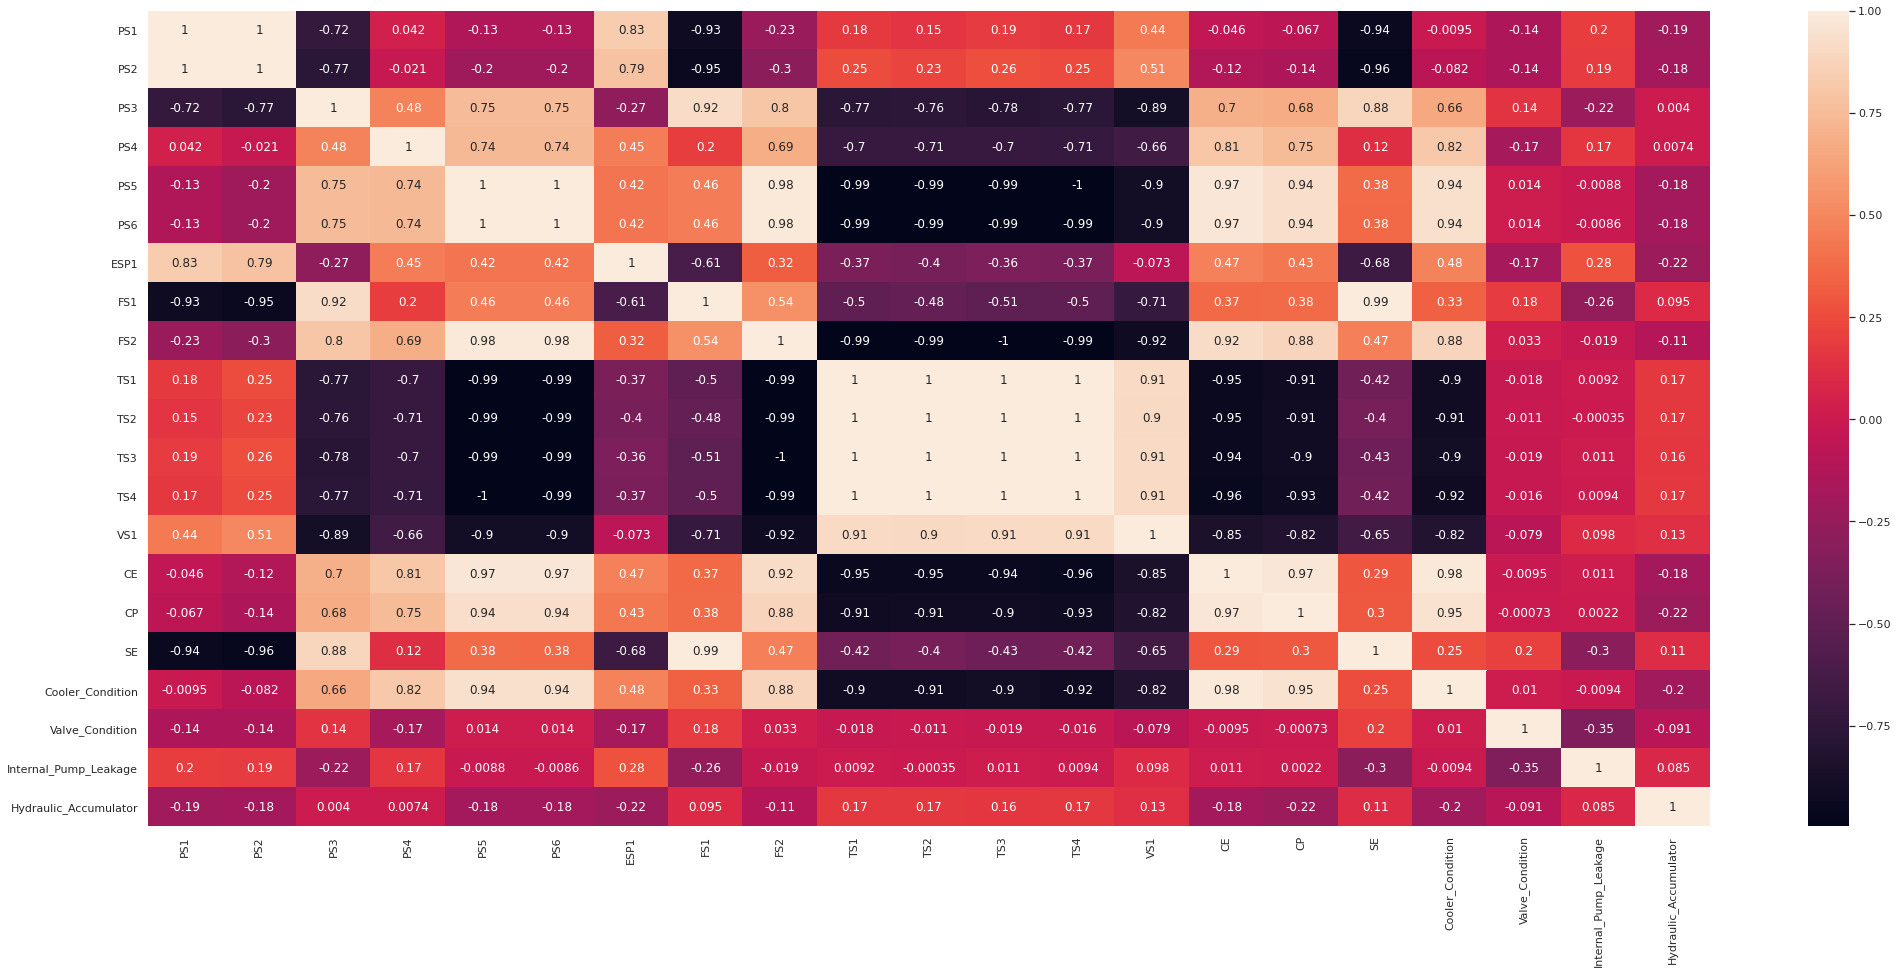

In [352]:
fig=plt.gcf()
fig.set_size_inches((35,15))
sns.heatmap(df_final_15.corr(),annot=True)

In [353]:
# fig.savefig("corr_15.png")

In [364]:
class Singleclass_Classification_Models:
    def __init__(self,train_x,test_x,train_y,test_y):
        self.train_x=train_x
        self.test_x=test_x
        self.train_y=train_y
        self.test_y=test_y
    
    def logistic_regression(self):
        global accuracy_score_log_reg_train,accuracy_score_log_reg_test,precision_score_log_reg_train,precision_score_log_reg_test,recall_score_log_reg_train,recall_score_log_reg_test
        log_reg=LogisticRegression(random_state=42)
        log_reg.fit(self.train_x,self.train_y)
        pred_train_y=log_reg.predict(self.train_x)
        pred_test_y=log_reg.predict(self.test_x)
    
        # accuracy_score
        accuracy_score_log_reg_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_log_reg_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_log_reg_train= ",accuracy_score_log_reg_train)
        print("accuracy_score_log_reg_test= ",accuracy_score_log_reg_test)
        print("\n")
        
        # precision-score
        precision_score_log_reg_train=precision_score(self.train_y,pred_train_y)
        precision_score_log_reg_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_log_reg_train= ",precision_score_log_reg_train)
        print("precision_score_log_reg_test= ",precision_score_log_reg_test)  
        print("\n")
        
        # recall-score
        recall_score_log_reg_train=recall_score(self.train_y,pred_train_y)
        recall_score_log_reg_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_log_reg_train= ",recall_score_log_reg_train)
        print("recall_score_log_reg_test= ",recall_score_log_reg_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(log_reg,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_log_reg_cross=scores["test_accuracy"].mean()
        print("accuracy_score_log_reg_cross= ",accuracy_score_log_reg_cross)
        precision_score_log_reg_cross=scores["test_precision"].mean()
        print("precision_score_log_reg_cross= ",precision_score_log_reg_cross)
        recall_score_log_reg_cross=scores["test_recall"].mean()
        print("recall_score_log_reg_cross= ",recall_score_log_reg_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
      
    def knearestneighbors(self):
        global accuracy_score_kn_neighbors_train,accuracy_score_kn_neighbors_test,precision_score_kn_neighbors_train,precision_score_kn_neighbors_test,recall_score_kn_neighbors_train,recall_score_kn_neighbors_test
        kn_neighbors=KNeighborsClassifier(n_neighbors=7,p=2)
        kn_neighbors.fit(self.train_x,self.train_y)
        pred_train_y=kn_neighbors.predict(self.train_x)
        pred_test_y=kn_neighbors.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_kn_neighbors_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_kn_neighbors_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_kn_neighbors_train= ",accuracy_score_kn_neighbors_train)
        print("accuracy_score_kn_neighbors_test= ",accuracy_score_kn_neighbors_test)
        print("\n")
        
        # precision-score
        precision_score_kn_neighbors_train=precision_score(self.train_y,pred_train_y)
        precision_score_kn_neighbors_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_kn_neighbors_train= ",precision_score_kn_neighbors_train)
        print("precision_score_kn_neighbors_test= ",precision_score_kn_neighbors_test) 
        print("\n")
        
        # recall-score
        recall_score_kn_neighbors_train=recall_score(self.train_y,pred_train_y)
        recall_score_kn_neighbors_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_kn_neighbors_train= ",recall_score_kn_neighbors_train)
        print("recall_score_kn_neighbors_test= ",recall_score_kn_neighbors_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(kn_neighbors,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_kn_neighbors_cross=scores["test_accuracy"].mean()
        print("accuracy_score_kn_neighbors_cross= ",accuracy_score_kn_neighbors_cross)
        precision_score_kn_neighbors_cross=scores["test_precision"].mean()
        print("precision_score_kn_neighbors_cross= ",precision_score_kn_neighbors_cross)
        recall_score_kn_neighbors_cross=scores["test_recall"].mean()
        print("recall_score_kn_neighbors_cross= ",recall_score_kn_neighbors_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
        
    def Svc(self):
        global accuracy_score_svc_train,accuracy_score_svc_test,precision_score_svc_train,precision_score_svc_test,recall_score_svc_train,recall_score_svc_test
        svc=SVC(kernel="rbf")
        svc.fit(self.train_x,self.train_y)
        pred_train_y=svc.predict(self.train_x)
        pred_test_y=svc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_svc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_svc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_svc_train= ",accuracy_score_svc_train)
        print("accuracy_score_svc_test= ",accuracy_score_svc_test)
        print("\n")
        
        # precision-score
        precision_score_svc_train=precision_score(self.train_y,pred_train_y)
        precision_score_svc_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_svc_train= ",precision_score_svc_train)
        print("precision_score_svc_test= ",precision_score_svc_test) 
        print("\n")
        
        # recall-score
        recall_score_svc_train=recall_score(self.train_y,pred_train_y)
        recall_score_svc_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_svc_train= ",recall_score_svc_train)
        print("recall_score_svc_test= ",recall_score_svc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(svc,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_svc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
        precision_score_svc_cross=scores["test_precision"].mean()
        print("precision_score_svc_cross= ",precision_score_svc_cross)
        recall_score_svc_cross=scores["test_recall"].mean()
        print("recall_score_svc_cross= ",recall_score_svc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
        
    def naive_bayes(self):
        global accuracy_score_nbc_train,accuracy_score_nbc_test,precision_score_nbc_train,precision_score_nbc_test,recall_score_nbc_train,recall_score_nbc_test
        nbc=GaussianNB()
        nbc.fit(train_x,train_y)
        pred_train_y=nbc.predict(self.train_x)
        pred_test_y=nbc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_nbc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_nbc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_nbc_train= ",accuracy_score_nbc_train)
        print("accuracy_score_nbc_test= ",accuracy_score_nbc_test)
        print("\n")
        
        # precision-score
        precision_score_nbc_train=precision_score(self.train_y,pred_train_y)
        precision_score_nbc_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_nbc_train= ",precision_score_nbc_train)
        print("precision_score_nbc_test= ",precision_score_nbc_test)
        print("\n")
        
        # recall-score
        recall_score_nbc_train=recall_score(self.train_y,pred_train_y)
        recall_score_nbc_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_nbc_train= ",recall_score_nbc_train)
        print("recall_score_nbc_test= ",recall_score_nbc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(nbc,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_nbc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_nbc_cross= ",accuracy_score_nbc_cross)
        precision_score_nbc_cross=scores["test_precision"].mean()
        print("precision_score_nbc_cross= ",precision_score_nbc_cross)
        recall_score_nbc_cross=scores["test_recall"].mean()
        print("recall_score_nbc_cross= ",recall_score_nbc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)   
        print("\n")
        
    def decision_tree(self):
        global accuracy_score_dtc_train,accuracy_score_dtc_test,precision_score_dtc_train,precision_score_dtc_test,recall_score_dtc_train,recall_score_dtc_test
        dtc=DecisionTreeClassifier(criterion="entropy",random_state=42)
        dtc.fit(train_x,train_y)
        pred_train_y=dtc.predict(self.train_x)
        pred_test_y=dtc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_dtc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_dtc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
        print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
        print("\n")
        
        # precision-score
        precision_score_dtc_train=precision_score(self.train_y,pred_train_y)
        precision_score_dtc_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_dtc_train= ",precision_score_dtc_train)
        print("precision_score_dtc_test= ",precision_score_dtc_test)
        print("\n")
        
        # recall-score
        recall_score_dtc_train=recall_score(self.train_y,pred_train_y)
        recall_score_dtc_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_dtc_train= ",recall_score_dtc_train)
        print("recall_score_dtc_test= ",recall_score_dtc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(dtc,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_nbc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
        precision_score_dtc_cross=scores["test_precision"].mean()
        print("precision_score_dtc_cross= ",precision_score_dtc_cross)
        recall_score_dtc_cross=scores["test_recall"].mean()
        print("recall_score_dtc_cross= ",recall_score_dtc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)      
        print("\n")
        
    def random_forest(self):
        global accuracy_score_rfc_train,accuracy_score_rfc_test,precision_score_rfc_train,precision_score_rfc_test,recall_score_rfc_train,recall_score_rfc_test
        rfc=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
        rfc.fit(train_x,train_y)
        pred_train_y=rfc.predict(self.train_x)
        pred_test_y=rfc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_rfc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_rfc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
        print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
        print("\n")
        
        # precision-score
        precision_score_rfc_train=precision_score(self.train_y,pred_train_y)
        precision_score_rfc_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_rfc_train= ",precision_score_rfc_train)
        print("precision_score_rfc_test= ",precision_score_rfc_test)
        print("\n")
        
        # recall-score
        recall_score_rfc_train=recall_score(self.train_y,pred_train_y)
        recall_score_rfc_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_rfc_train= ",recall_score_rfc_train)
        print("recall_score_rfc_test= ",recall_score_rfc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(rfc,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_rfc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
        precision_score_rfc_cross=scores["test_precision"].mean()
        print("precision_score_rfc_cross= ",precision_score_rfc_cross)
        recall_score_rfc_cross=scores["test_recall"].mean()
        print("recall_score_rfc_cross= ",recall_score_rfc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
    
    def best_model(self):
        pred_train_accuracy=[accuracy_score_log_reg_train,accuracy_score_kn_neighbors_train,accuracy_score_svc_train
                     ,accuracy_score_nbc_train,accuracy_score_dtc_train,accuracy_score_rfc_train]
        pred_test_accuracy=[accuracy_score_log_reg_test,accuracy_score_kn_neighbors_test,accuracy_score_svc_test
                             ,accuracy_score_nbc_test,accuracy_score_dtc_test,accuracy_score_rfc_test]
        pred_train_precision=[precision_score_log_reg_train,precision_score_kn_neighbors_train,precision_score_svc_train
                            ,precision_score_nbc_train,precision_score_dtc_train,precision_score_rfc_train]
        pred_test_precision=[precision_score_log_reg_test,precision_score_kn_neighbors_test,precision_score_svc_test
                             ,precision_score_nbc_test,precision_score_dtc_test,precision_score_rfc_test]
        pred_train_recall=[recall_score_log_reg_train,recall_score_kn_neighbors_train,recall_score_svc_train,recall_score_nbc_train
                          ,recall_score_dtc_train,recall_score_rfc_train]
        pred_test_recall=[recall_score_log_reg_test,recall_score_kn_neighbors_test,recall_score_svc_test,recall_score_nbc_test
                         ,recall_score_dtc_test,recall_score_rfc_test]

        df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
        df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])
        
        df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
        df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])
        
        df_train_recall=pd.DataFrame(pred_train_recall,columns=["train"])
        df_test_recall=pd.DataFrame(pred_test_recall,columns=["test"])
        
        df_accuracy=pd.concat([df_train_accuracy,df_test_accuracy],axis=1)
        df_precision=pd.concat([df_train_precision,df_test_precision],axis=1)
        df_recall=pd.concat([df_train_recall,df_test_recall],axis=1)
        df_best_model=pd.concat([df_accuracy,df_precision,df_recall],keys=["accuracy","precision","recall"],axis=1)
        df_best_model.set_axis(["logistic_reg_cl","knn_cl","sv_cl","naive-bayes_cl","decision_tree_cl","random_forest_cl"],axis=0,inplace=True)
        return df_best_model

In [365]:
class Multiclass_Classification_Models:
    def __init__(self,train_x,test_x,train_y,test_y):
        self.train_x=train_x
        self.test_x=test_x
        self.train_y=train_y
        self.test_y=test_y
    
    def logistic_regression(self):
        global accuracy_score_log_reg_train,accuracy_score_log_reg_test,precision_score_log_reg_train,precision_score_log_reg_test,recall_score_log_reg_train,recall_score_log_reg_test
        log_reg=LogisticRegression(random_state=42)
        log_reg.fit(self.train_x,self.train_y)
        pred_train_y=log_reg.predict(self.train_x)
        pred_test_y=log_reg.predict(self.test_x)
    
        # accuracy_score
        accuracy_score_log_reg_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_log_reg_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_log_reg_train= ",accuracy_score_log_reg_train)
        print("accuracy_score_log_reg_test= ",accuracy_score_log_reg_test)
        print("\n")
        
        # precision-score
        precision_score_log_reg_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_log_reg_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_log_reg_train= ",precision_score_log_reg_train)
        print("precision_score_log_reg_test= ",precision_score_log_reg_test)  
        print("\n")
        
        # recall-score
        recall_score_log_reg_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_log_reg_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_log_reg_train= ",recall_score_log_reg_train)
        print("recall_score_log_reg_test= ",recall_score_log_reg_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(log_reg,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_log_reg_cross=scores["test_accuracy"].mean()
        print("accuracy_score_log_reg_cross= ",accuracy_score_log_reg_cross)
        precision_score_log_reg_cross=scores["test_precision_weighted"].mean()
        print("precision_score_log_reg_cross= ",precision_score_log_reg_cross)
        recall_score_log_reg_cross=scores["test_recall_weighted"].mean()
        print("recall_score_log_reg_cross= ",recall_score_log_reg_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
      
    def knearestneighbors(self):
        global accuracy_score_kn_neighbors_train,accuracy_score_kn_neighbors_test,precision_score_kn_neighbors_train,precision_score_kn_neighbors_test,recall_score_kn_neighbors_train,recall_score_kn_neighbors_test
        kn_neighbors=KNeighborsClassifier(n_neighbors=7,p=2)
        kn_neighbors.fit(self.train_x,self.train_y)
        pred_train_y=kn_neighbors.predict(self.train_x)
        pred_test_y=kn_neighbors.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_kn_neighbors_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_kn_neighbors_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_kn_neighbors_train= ",accuracy_score_kn_neighbors_train)
        print("accuracy_score_kn_neighbors_test= ",accuracy_score_kn_neighbors_test)
        print("\n")
        
        # precision-score
        precision_score_kn_neighbors_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_kn_neighbors_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_kn_neighbors_train= ",precision_score_kn_neighbors_train)
        print("precision_score_kn_neighbors_test= ",precision_score_kn_neighbors_test) 
        print("\n")
        
        # recall-score
        recall_score_kn_neighbors_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_kn_neighbors_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_kn_neighbors_train= ",recall_score_kn_neighbors_train)
        print("recall_score_kn_neighbors_test= ",recall_score_kn_neighbors_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(kn_neighbors,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_kn_neighbors_cross=scores["test_accuracy"].mean()
        print("accuracy_score_kn_neighbors_cross= ",accuracy_score_kn_neighbors_cross)
        precision_score_kn_neighbors_cross=scores["test_precision_weighted"].mean()
        print("precision_score_kn_neighbors_cross= ",precision_score_kn_neighbors_cross)
        recall_score_kn_neighbors_cross=scores["test_recall_weighted"].mean()
        print("recall_score_kn_neighbors_cross= ",recall_score_kn_neighbors_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
        
    def Svc(self):
        global accuracy_score_svc_train,accuracy_score_svc_test,precision_score_svc_train,precision_score_svc_test,recall_score_svc_train,recall_score_svc_test
        svc=SVC(kernel="rbf")
        svc.fit(self.train_x,self.train_y)
        pred_train_y=svc.predict(self.train_x)
        pred_test_y=svc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_svc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_svc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_svc_train= ",accuracy_score_svc_train)
        print("accuracy_score_svc_test= ",accuracy_score_svc_test)
        print("\n")
        
        # precision-score
        precision_score_svc_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_svc_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_svc_train= ",precision_score_svc_train)
        print("precision_score_svc_test= ",precision_score_svc_test) 
        print("\n")
        
        # recall-score
        recall_score_svc_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_svc_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_svc_train= ",recall_score_svc_train)
        print("recall_score_svc_test= ",recall_score_svc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(svc,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_svc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
        precision_score_svc_cross=scores["test_precision_weighted"].mean()
        print("precision_score_svc_cross= ",precision_score_svc_cross)
        recall_score_svc_cross=scores["test_recall_weighted"].mean()
        print("recall_score_svc_cross= ",recall_score_svc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
        
    def naive_bayes(self):
        global accuracy_score_nbc_train,accuracy_score_nbc_test,precision_score_nbc_train,precision_score_nbc_test,recall_score_nbc_train,recall_score_nbc_test
        nbc=GaussianNB()
        nbc.fit(train_x,train_y)
        pred_train_y=nbc.predict(self.train_x)
        pred_test_y=nbc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_nbc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_nbc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_nbc_train= ",accuracy_score_nbc_train)
        print("accuracy_score_nbc_test= ",accuracy_score_nbc_test)
        print("\n")
        
        # precision-score
        precision_score_nbc_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_nbc_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_nbc_train= ",precision_score_nbc_train)
        print("precision_score_nbc_test= ",precision_score_nbc_test)
        print("\n")
        
        # recall-score
        recall_score_nbc_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_nbc_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_nbc_train= ",recall_score_nbc_train)
        print("recall_score_nbc_test= ",recall_score_nbc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(nbc,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_nbc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_nbc_cross= ",accuracy_score_nbc_cross)
        precision_score_nbc_cross=scores["test_precision_weighted"].mean()
        print("precision_score_nbc_cross= ",precision_score_nbc_cross)
        recall_score_nbc_cross=scores["test_recall_weighted"].mean()
        print("recall_score_nbc_cross= ",recall_score_nbc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)   
        print("\n")
        
    def decision_tree(self):
        global accuracy_score_dtc_train,accuracy_score_dtc_test,precision_score_dtc_train,precision_score_dtc_test,recall_score_dtc_train,recall_score_dtc_test
        dtc=DecisionTreeClassifier(criterion="entropy",random_state=42)
        dtc.fit(train_x,train_y)
        pred_train_y=dtc.predict(self.train_x)
        pred_test_y=dtc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_dtc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_dtc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
        print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
        print("\n")
        
        # precision-score
        precision_score_dtc_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_dtc_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_dtc_train= ",precision_score_dtc_train)
        print("precision_score_dtc_test= ",precision_score_dtc_test)
        print("\n")
        
        # recall-score
        recall_score_dtc_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_dtc_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_dtc_train= ",recall_score_dtc_train)
        print("recall_score_dtc_test= ",recall_score_dtc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(dtc,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_nbc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
        precision_score_dtc_cross=scores["test_precision_weighted"].mean()
        print("precision_score_dtc_cross= ",precision_score_dtc_cross)
        recall_score_dtc_cross=scores["test_recall_weighted"].mean()
        print("recall_score_dtc_cross= ",recall_score_dtc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)      
        print("\n")
        
    def random_forest(self):
        global accuracy_score_rfc_train,accuracy_score_rfc_test,precision_score_rfc_train,precision_score_rfc_test,recall_score_rfc_train,recall_score_rfc_test
        rfc=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
        rfc.fit(train_x,train_y)
        pred_train_y=rfc.predict(self.train_x)
        pred_test_y=rfc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_rfc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_rfc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
        print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
        print("\n")
        
        # precision-score
        precision_score_rfc_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_rfc_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_rfc_train= ",precision_score_rfc_train)
        print("precision_score_rfc_test= ",precision_score_rfc_test)
        print("\n")
        
        # recall-score
        recall_score_rfc_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_rfc_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_rfc_train= ",recall_score_rfc_train)
        print("recall_score_rfc_test= ",recall_score_rfc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(rfc,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_rfc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
        precision_score_rfc_cross=scores["test_precision_weighted"].mean()
        print("precision_score_rfc_cross= ",precision_score_rfc_cross)
        recall_score_rfc_cross=scores["test_recall_weighted"].mean()
        print("recall_score_rfc_cross= ",recall_score_rfc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
    
    def best_model(self):
        pred_train_accuracy=[accuracy_score_log_reg_train,accuracy_score_kn_neighbors_train,accuracy_score_svc_train
                     ,accuracy_score_nbc_train,accuracy_score_dtc_train,accuracy_score_rfc_train]
        pred_test_accuracy=[accuracy_score_log_reg_test,accuracy_score_kn_neighbors_test,accuracy_score_svc_test
                             ,accuracy_score_nbc_test,accuracy_score_dtc_test,accuracy_score_rfc_test]
        pred_train_precision=[precision_score_log_reg_train,precision_score_kn_neighbors_train,precision_score_svc_train
                            ,precision_score_nbc_train,precision_score_dtc_train,precision_score_rfc_train]
        pred_test_precision=[precision_score_log_reg_test,precision_score_kn_neighbors_test,precision_score_svc_test
                             ,precision_score_nbc_test,precision_score_dtc_test,precision_score_rfc_test]
        pred_train_recall=[recall_score_log_reg_train,recall_score_kn_neighbors_train,recall_score_svc_train,recall_score_nbc_train
                          ,recall_score_dtc_train,recall_score_rfc_train]
        pred_test_recall=[recall_score_log_reg_test,recall_score_kn_neighbors_test,recall_score_svc_test,recall_score_nbc_test
                         ,recall_score_dtc_test,recall_score_rfc_test]

        df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
        df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])
        
        df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
        df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])
        
        df_train_recall=pd.DataFrame(pred_train_recall,columns=["train"])
        df_test_recall=pd.DataFrame(pred_test_recall,columns=["test"])
        
        df_accuracy=pd.concat([df_train_accuracy,df_test_accuracy],axis=1)
        df_precision=pd.concat([df_train_precision,df_test_precision],axis=1)
        df_recall=pd.concat([df_train_recall,df_test_recall],axis=1)
        df_best_model=pd.concat([df_accuracy,df_precision,df_recall],keys=["accuracy","precision","recall"],axis=1)
        df_best_model.set_axis(["logistic_reg_cl","knn_cl","sv_cl","naive-bayes_cl","decision_tree_cl","random_forest_cl"],axis=0,inplace=True)
        return df_best_model

## data splitting    target-1

### target incidence

In [366]:
round((target_15_1.value_counts(normalize=True)),4)

100.0    0.3382
20.0     0.3341
3.0      0.3277
Name: Cooler_Condition, dtype: float64

In [367]:
train_x,test_x,train_y,test_y=train_test_split(x_15,target_15_1,test_size=0.2,random_state=1)

## feature scaling target-1

In [368]:
sc=StandardScaler()

In [369]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)  target-1

In [370]:
all_models1=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

## 1- logistic regression

accuracy_score_log_reg_train=  0.985730593607306
accuracy_score_log_reg_test=  0.9863325740318907


precision_score_log_reg_train=  0.9858489268917049
precision_score_log_reg_test=  0.9864710952410269


recall_score_log_reg_train=  0.985730593607306
recall_score_log_reg_test=  0.9863325740318907


accuracy_score_log_reg_cross=  0.9851720779220778
precision_score_log_reg_cross=  0.9853934383938169
recall_score_log_reg_cross=  0.9851720779220778

confusion_matrix:-




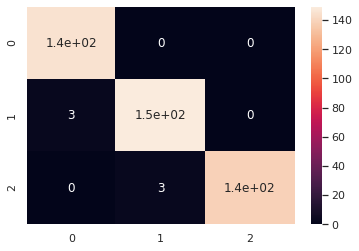

In [371]:
all_models1.logistic_regression()

## 2- knn

accuracy_score_kn_neighbors_train=  0.9954337899543378
accuracy_score_kn_neighbors_test=  0.9954441913439636


precision_score_kn_neighbors_train=  0.995432735151931
precision_score_kn_neighbors_test=  0.9954441913439636


recall_score_kn_neighbors_train=  0.9954337899543378
recall_score_kn_neighbors_test=  0.9954441913439636


accuracy_score_kn_neighbors_cross=  0.9931461038961041
precision_score_kn_neighbors_cross=  0.9932416221918308
recall_score_kn_neighbors_cross=  0.9931461038961041

confusion_matrix:-




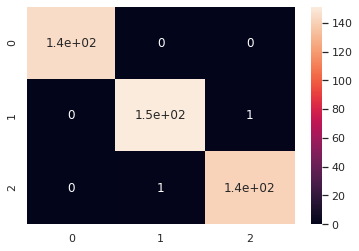

In [372]:
all_models1.knearestneighbors()

## 3- SVC

accuracy_score_svc_train=  0.985730593607306
accuracy_score_svc_test=  0.9863325740318907


precision_score_svc_train=  0.9858489268917049
precision_score_svc_test=  0.9864710952410269


recall_score_svc_train=  0.985730593607306
recall_score_svc_test=  0.9863325740318907


accuracy_score_svc_cross=  0.9857435064935064
precision_score_svc_cross=  0.9860032739118931
recall_score_svc_cross=  0.9857435064935064

confusion_matrix:-




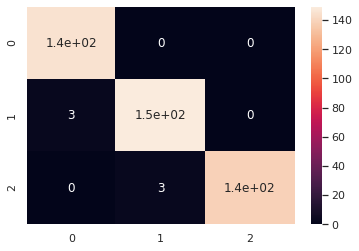

In [373]:
all_models1.Svc()

## 4- naive-bayes

accuracy_score_nbc_train=  0.9828767123287672
accuracy_score_nbc_test=  0.9840546697038725


precision_score_nbc_train=  0.982990603832602
precision_score_nbc_test=  0.9842540205026576


recall_score_nbc_train=  0.9828767123287672
recall_score_nbc_test=  0.9840546697038725


accuracy_score_nbc_cross=  0.9828863636363636
precision_score_nbc_cross=  0.9831751806118909
recall_score_nbc_cross=  0.9828863636363636

confusion_matrix:-




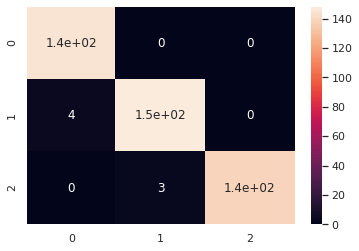

In [374]:
all_models1.naive_bayes()

## 5- decision tree classifier

accuracy_score_dtc_train=  1.0
accuracy_score_dtc_test=  0.9977220956719818


precision_score_dtc_train=  1.0
precision_score_dtc_test=  0.9977376977564203


recall_score_dtc_train=  1.0
recall_score_dtc_test=  0.9977220956719818


accuracy_score_dtc_cross=  0.9138418079096043
precision_score_dtc_cross=  0.9949179796547456
recall_score_dtc_cross=  0.9948603896103897

confusion_matrix:-




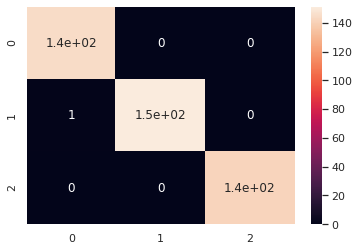

In [375]:
all_models1.decision_tree()    #overfitting

## 6- random forest classifier

accuracy_score_rfc_train=  1.0
accuracy_score_rfc_test=  1.0


precision_score_rfc_train=  1.0
precision_score_rfc_test=  1.0


recall_score_rfc_train=  1.0
recall_score_rfc_test=  1.0


accuracy_score_rfc_cross=  0.9954383116883119
precision_score_rfc_cross=  0.9955253686990975
recall_score_rfc_cross=  0.9954383116883119

confusion_matrix:-




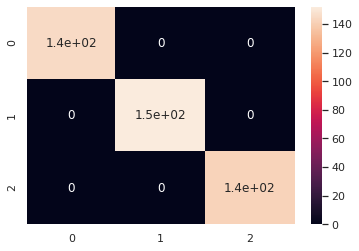

In [376]:
all_models1.random_forest()    #overfitting

## best model

In [377]:
all_models1.best_model()

accuracy           precision              recall          
                     train      test     train      test     train      test
logistic_reg_cl   0.985731  0.986333  0.985849  0.986471  0.985731  0.986333
knn_cl            0.995434  0.995444  0.995433  0.995444  0.995434  0.995444
sv_cl             0.985731  0.986333  0.985849  0.986471  0.985731  0.986333
naive-bayes_cl    0.982877  0.984055  0.982991  0.984254  0.982877  0.984055
decision_tree_cl  1.000000  0.997722  1.000000  0.997738  1.000000  0.997722
random_forest_cl  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000

In [378]:
print("logistic_regression= ",round(0.986471,4))

logistic_regression=  0.9865


In [379]:
l_classifier=LogisticRegression(random_state=42)
l_classifier.fit(train_x,train_y)
pred_test_y=l_classifier.predict(test_x)

In [380]:
target1_15_pred_values=pred_test_y

## data splitting target-2

### target incidence

In [381]:
round((target_15_2.value_counts(normalize=True)),4)

100.0    0.5071
90.0     0.1643
73.0     0.1643
80.0     0.1643
Name: Valve_Condition, dtype: float64

In [382]:
train_x,test_x,train_y,test_y=train_test_split(x_15,target_15_2,test_size=0.2,random_state=1)

## feature scaling  target-2

In [383]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)  target-2

In [384]:
all_models2=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

## 1- logistic_regression

accuracy_score_log_reg_train=  0.5753424657534246
accuracy_score_log_reg_test=  0.55125284738041


precision_score_log_reg_train=  0.5273528253341933
precision_score_log_reg_test=  0.5074526548909425


recall_score_log_reg_train=  0.5753424657534246
recall_score_log_reg_test=  0.55125284738041


accuracy_score_log_reg_cross=  0.5610714285714286
precision_score_log_reg_cross=  0.5102844490390704
recall_score_log_reg_cross=  0.5610714285714286

confusion_matrix:-




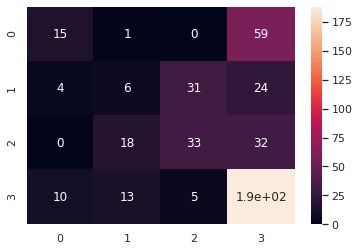

In [385]:
all_models2.logistic_regression()    # not accepted

## 2- knn

accuracy_score_kn_neighbors_train=  0.7842465753424658
accuracy_score_kn_neighbors_test=  0.6400911161731208


precision_score_kn_neighbors_train=  0.7887073218959187
precision_score_kn_neighbors_test=  0.6393010531366468


recall_score_kn_neighbors_train=  0.7842465753424658
recall_score_kn_neighbors_test=  0.6400911161731208


accuracy_score_kn_neighbors_cross=  0.6758084415584414
precision_score_kn_neighbors_cross=  0.669634507989729
recall_score_kn_neighbors_cross=  0.6758084415584414

confusion_matrix:-




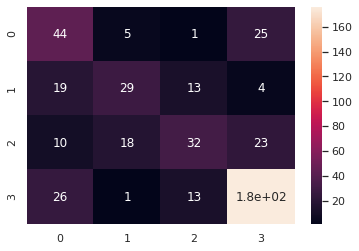

In [386]:
all_models2.knearestneighbors()         #not accepted

## 3- SVC

accuracy_score_svc_train=  0.5154109589041096
accuracy_score_svc_test=  0.4920273348519362


precision_score_svc_train=  0.44051011341972773
precision_score_svc_test=  0.31720475361281936


recall_score_svc_train=  0.5154109589041096
recall_score_svc_test=  0.4920273348519362


accuracy_score_svc_cross=  0.5074123376623377
precision_score_svc_cross=  0.3061199231431798
recall_score_svc_cross=  0.5074123376623377

confusion_matrix:-




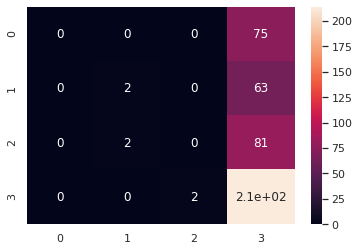

In [387]:
all_models2.Svc()      #not accepted

## 4- naive-bayes

accuracy_score_nbc_train=  0.5114155251141552
accuracy_score_nbc_test=  0.48291571753986334


precision_score_nbc_train=  0.38470107276142845
precision_score_nbc_test=  0.28637565915688307


recall_score_nbc_train=  0.5114155251141552
recall_score_nbc_test=  0.48291571753986334


accuracy_score_nbc_cross=  0.502288961038961
precision_score_nbc_cross=  0.32493354550988707
recall_score_nbc_cross=  0.502288961038961

confusion_matrix:-




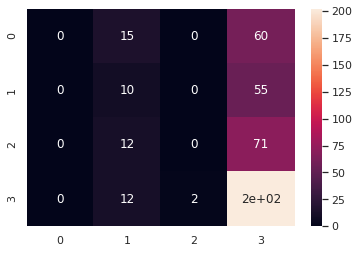

In [388]:
all_models2.naive_bayes()     #not accepted

## 5- decision tree classifier

accuracy_score_dtc_train=  1.0
accuracy_score_dtc_test=  0.6810933940774487


precision_score_dtc_train=  1.0
precision_score_dtc_test=  0.6819277230477746


recall_score_dtc_train=  1.0
recall_score_dtc_test=  0.6810933940774487


accuracy_score_dtc_cross=  0.9138418079096043
precision_score_dtc_cross=  0.7255383469047019
recall_score_dtc_cross=  0.7243376623376625

confusion_matrix:-




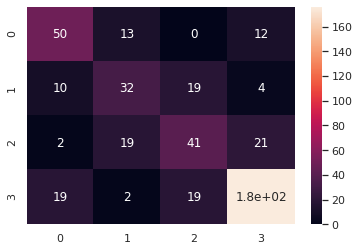

In [389]:
all_models2.decision_tree()     

## 6- random forest classifier

accuracy_score_rfc_train=  1.0
accuracy_score_rfc_test=  0.7904328018223234


precision_score_rfc_train=  1.0
precision_score_rfc_test=  0.7876091007437719


recall_score_rfc_train=  1.0
recall_score_rfc_test=  0.7904328018223234


accuracy_score_rfc_cross=  0.8025162337662337
precision_score_rfc_cross=  0.8043897683088324
recall_score_rfc_cross=  0.8025162337662337

confusion_matrix:-




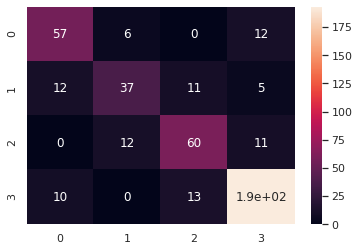

In [390]:
all_models2.random_forest()      

## best model

In [391]:
all_models2.best_model()

accuracy           precision              recall          
                     train      test     train      test     train      test
logistic_reg_cl   0.575342  0.551253  0.527353  0.507453  0.575342  0.551253
knn_cl            0.784247  0.640091  0.788707  0.639301  0.784247  0.640091
sv_cl             0.515411  0.492027  0.440510  0.317205  0.515411  0.492027
naive-bayes_cl    0.511416  0.482916  0.384701  0.286376  0.511416  0.482916
decision_tree_cl  1.000000  0.681093  1.000000  0.681928  1.000000  0.681093
random_forest_cl  1.000000  0.790433  1.000000  0.787609  1.000000  0.790433

In [392]:
print("random_forest_classifier= ",round(0.787609,4))

random_forest_classifier=  0.7876


In [393]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(train_x,train_y)
pred_test_y=rfc.predict(test_x)

In [394]:
target2_15_pred_values=pred_test_y

## data splitting   target-3

### target incidence

In [395]:
target_15_3=target_15_3.astype(int)
target_15_3

0       0
1       0
2       0
3       0
4       0
       ..
2186    0
2187    0
2188    0
2189    0
2190    0
Name: Internal_Pump_Leakage, Length: 2191, dtype: int64

In [396]:
round((target_15_3.value_counts(normalize=True)),4)

0    0.5509
1    0.2246
2    0.2246
Name: Internal_Pump_Leakage, dtype: float64

In [397]:
train_x,test_x,train_y,test_y=train_test_split(x_15,target_15_3,test_size=0.2,random_state=1)

## feature scaling  target-3

In [398]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)  target-3 

In [399]:
all_models3=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

## 1- logistic regression

accuracy_score_log_reg_train=  0.7248858447488584
accuracy_score_log_reg_test=  0.6924829157175398


precision_score_log_reg_train=  0.7058034810385635
precision_score_log_reg_test=  0.6779124958026664


recall_score_log_reg_train=  0.7248858447488584
recall_score_log_reg_test=  0.6924829157175398


accuracy_score_log_reg_cross=  0.7140324675324675
precision_score_log_reg_cross=  0.694709222773897
recall_score_log_reg_cross=  0.7140324675324675

confusion_matrix:-




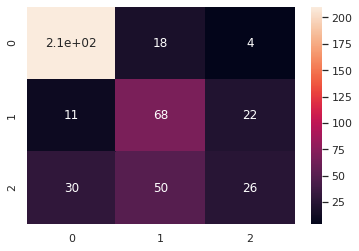

In [400]:
all_models3.logistic_regression()

## 2- knn

accuracy_score_kn_neighbors_train=  0.9240867579908676
accuracy_score_kn_neighbors_test=  0.8451025056947609


precision_score_kn_neighbors_train=  0.92490053565937
precision_score_kn_neighbors_test=  0.8463532348704809


recall_score_kn_neighbors_train=  0.9240867579908676
recall_score_kn_neighbors_test=  0.8451025056947609


accuracy_score_kn_neighbors_cross=  0.8744155844155845
precision_score_kn_neighbors_cross=  0.8758049187153473
recall_score_kn_neighbors_cross=  0.8744155844155845

confusion_matrix:-




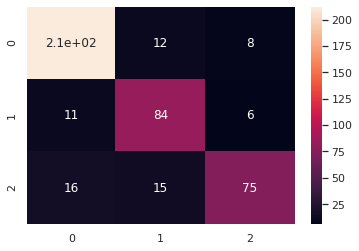

In [401]:
all_models3.knearestneighbors()

## 3- SVC

accuracy_score_svc_train=  0.7146118721461188
accuracy_score_svc_test=  0.6651480637813212


precision_score_svc_train=  0.7069670571255752
precision_score_svc_test=  0.6508662046802898


recall_score_svc_train=  0.7146118721461188
recall_score_svc_test=  0.6651480637813212


accuracy_score_svc_cross=  0.6883571428571429
precision_score_svc_cross=  0.679034884308179
recall_score_svc_cross=  0.6883571428571429

confusion_matrix:-




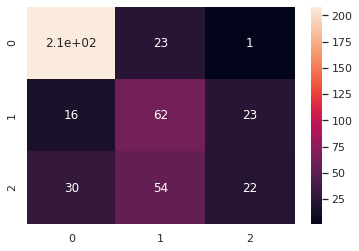

In [402]:
all_models3.Svc()       

## 4- naive-bayes

accuracy_score_nbc_train=  0.591324200913242
accuracy_score_nbc_test=  0.5239179954441914


precision_score_nbc_train=  0.6662045340022457
precision_score_nbc_test=  0.35862104595730687


recall_score_nbc_train=  0.591324200913242
recall_score_nbc_test=  0.5239179954441914


accuracy_score_nbc_cross=  0.5907467532467533
precision_score_nbc_cross=  0.44537754423779996
recall_score_nbc_cross=  0.5907467532467533

confusion_matrix:-




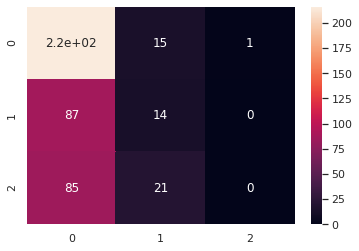

In [403]:
all_models3.naive_bayes()

## 5- decision tree classifier

accuracy_score_dtc_train=  1.0
accuracy_score_dtc_test=  0.9020501138952164


precision_score_dtc_train=  1.0
precision_score_dtc_test=  0.9024899218323007


recall_score_dtc_train=  1.0
recall_score_dtc_test=  0.9020501138952164


accuracy_score_dtc_cross=  0.9138418079096043
precision_score_dtc_cross=  0.9045093350395179
recall_score_dtc_cross=  0.9035681818181818

confusion_matrix:-




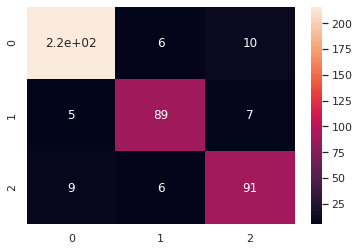

In [404]:
all_models3.decision_tree()

## 6- random forest classifier

accuracy_score_rfc_train=  1.0
accuracy_score_rfc_test=  0.929384965831435


precision_score_rfc_train=  1.0
precision_score_rfc_test=  0.9290443021732071


recall_score_rfc_train=  1.0
recall_score_rfc_test=  0.929384965831435


accuracy_score_rfc_cross=  0.9412305194805194
precision_score_rfc_cross=  0.9425476872772917
recall_score_rfc_cross=  0.9412305194805194

confusion_matrix:-




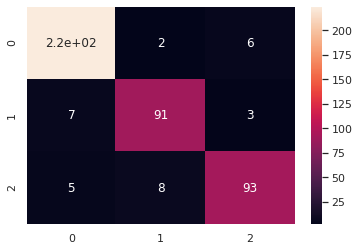

In [405]:
all_models3.random_forest()

## best_model

In [406]:
all_models3.best_model()

accuracy           precision              recall          
                     train      test     train      test     train      test
logistic_reg_cl   0.724886  0.692483  0.705803  0.677912  0.724886  0.692483
knn_cl            0.924087  0.845103  0.924901  0.846353  0.924087  0.845103
sv_cl             0.714612  0.665148  0.706967  0.650866  0.714612  0.665148
naive-bayes_cl    0.591324  0.523918  0.666205  0.358621  0.591324  0.523918
decision_tree_cl  1.000000  0.902050  1.000000  0.902490  1.000000  0.902050
random_forest_cl  1.000000  0.929385  1.000000  0.929044  1.000000  0.929385

In [407]:
print("knn= ",round(0.846353,4))

knn=  0.8464


In [408]:
knn=KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=7)

In [409]:
pred_test_y=knn.predict(test_x)

In [410]:
target3_15_pred_values=pred_test_y

## data splitting  target-4

### target incidence

In [411]:
round((target_15_4.value_counts(normalize=True)),4)

90.0     0.3688
130.0    0.2670
115.0    0.1821
100.0    0.1821
Name: Hydraulic_Accumulator, dtype: float64

In [412]:
train_x,test_x,train_y,test_y=train_test_split(x_15,target_15_4,test_size=0.2,random_state=1)

## feature  scaling

In [413]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)  target-4

In [414]:
all_models4=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

## 1- logistic_regression

accuracy_score_log_reg_train=  0.6375570776255708
accuracy_score_log_reg_test=  0.5945330296127562


precision_score_log_reg_train=  0.6114989644741352
precision_score_log_reg_test=  0.5660216468872504


recall_score_log_reg_train=  0.6375570776255708
recall_score_log_reg_test=  0.5945330296127562


accuracy_score_log_reg_cross=  0.6290097402597403
precision_score_log_reg_cross=  0.6056297820626548
recall_score_log_reg_cross=  0.6290097402597403

confusion_matrix:-




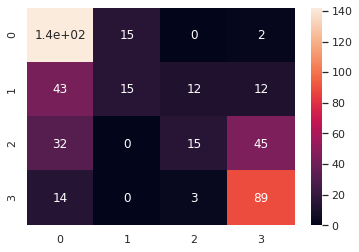

In [415]:
all_models4.logistic_regression()

## 2- knn

accuracy_score_kn_neighbors_train=  0.9434931506849316
accuracy_score_kn_neighbors_test=  0.9271070615034168


precision_score_kn_neighbors_train=  0.9437764250238682
precision_score_kn_neighbors_test=  0.9277383729885978


recall_score_kn_neighbors_train=  0.9434931506849316
recall_score_kn_neighbors_test=  0.9271070615034168


accuracy_score_kn_neighbors_cross=  0.9178051948051948
precision_score_kn_neighbors_cross=  0.9199005359958841
recall_score_kn_neighbors_cross=  0.9178051948051948

confusion_matrix:-




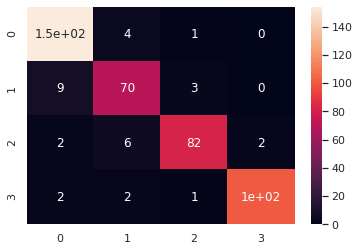

In [416]:
all_models4.knearestneighbors()

## 3- SVC

accuracy_score_svc_train=  0.5924657534246576
accuracy_score_svc_test=  0.5763097949886105


precision_score_svc_train=  0.6635920803677962
precision_score_svc_test=  0.6515771482679843


recall_score_svc_train=  0.5924657534246576
recall_score_svc_test=  0.5763097949886105


accuracy_score_svc_cross=  0.5828181818181818
precision_score_svc_cross=  0.6490880010664201
recall_score_svc_cross=  0.5828181818181818

confusion_matrix:-




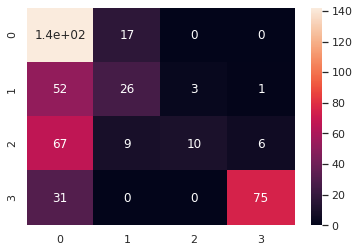

In [417]:
all_models4.Svc()

## 4- naive-bayes

accuracy_score_nbc_train=  0.3984018264840183
accuracy_score_nbc_test=  0.3690205011389522


precision_score_nbc_train=  0.3358782427611588
precision_score_nbc_test=  0.30420347093623507


recall_score_nbc_train=  0.3984018264840183
recall_score_nbc_test=  0.3690205011389522


accuracy_score_nbc_cross=  0.3978701298701298
precision_score_nbc_cross=  0.33829924340196793
recall_score_nbc_cross=  0.3978701298701298

confusion_matrix:-




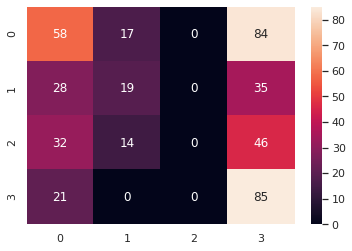

In [418]:
all_models4.naive_bayes()          #not accepted

## 5- decision tree classifier

accuracy_score_dtc_train=  1.0
accuracy_score_dtc_test=  0.9407744874715261


precision_score_dtc_train=  1.0
precision_score_dtc_test=  0.9417023674327035


recall_score_dtc_train=  1.0
recall_score_dtc_test=  0.9407744874715261


accuracy_score_dtc_cross=  0.9138418079096043
precision_score_dtc_cross=  0.936689123984779
recall_score_dtc_cross=  0.9354837662337664

confusion_matrix:-




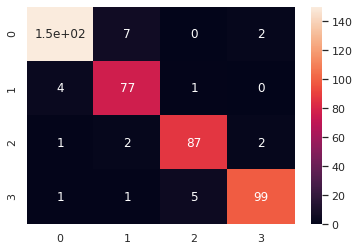

In [419]:
all_models4.decision_tree()

## 6- random forest classifier

accuracy_score_rfc_train=  1.0
accuracy_score_rfc_test=  0.9726651480637813


precision_score_rfc_train=  1.0
precision_score_rfc_test=  0.972854830268069


recall_score_rfc_train=  1.0
recall_score_rfc_test=  0.9726651480637813


accuracy_score_rfc_cross=  0.9680292207792206
precision_score_rfc_cross=  0.9691744641700073
recall_score_rfc_cross=  0.9680292207792206

confusion_matrix:-




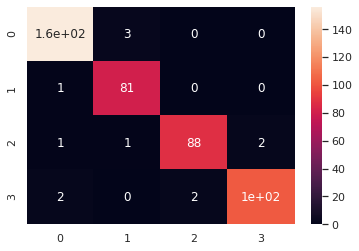

In [420]:
all_models4.random_forest()

## best_model

In [421]:
all_models4.best_model()

accuracy           precision              recall          
                     train      test     train      test     train      test
logistic_reg_cl   0.637557  0.594533  0.611499  0.566022  0.637557  0.594533
knn_cl            0.943493  0.927107  0.943776  0.927738  0.943493  0.927107
sv_cl             0.592466  0.576310  0.663592  0.651577  0.592466  0.576310
naive-bayes_cl    0.398402  0.369021  0.335878  0.304203  0.398402  0.369021
decision_tree_cl  1.000000  0.940774  1.000000  0.941702  1.000000  0.940774
random_forest_cl  1.000000  0.972665  1.000000  0.972855  1.000000  0.972665

In [422]:
print("knn= ",round(0.927738,4))

knn=  0.9277


In [423]:
knn=KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=7)

In [424]:
pred_test_y=knn.predict(test_x)

In [425]:
target4_15_pred_values=pred_test_y

## data splitting   final_target15

### target incidence

In [426]:
final_target_15.value_counts(normalize=True)

0    0.661342
1    0.338658
Name: Stable_Flag, dtype: float64

In [427]:
y_15_ind=y_15
y_15_ind

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
0,3.0,100.0,0.0,130.0
1,3.0,100.0,0.0,130.0
2,3.0,100.0,0.0,130.0
3,3.0,100.0,0.0,130.0
4,3.0,100.0,0.0,130.0
...,...,...,...,...
2186,100.0,100.0,0.0,90.0
2187,100.0,100.0,0.0,90.0
2188,100.0,100.0,0.0,90.0
2189,100.0,100.0,0.0,90.0


In [428]:
train_x,test_x,train_y,test_y=train_test_split(y_15_ind,final_target_15,test_size=0.2,random_state=1,stratify=final_target_15)

## feature scaling  final_target15

In [429]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# models

In [430]:
all_models5=Singleclass_Classification_Models(train_x,test_x,train_y,test_y)

## logistic_regression

accuracy_score_log_reg_train=  0.9297945205479452
accuracy_score_log_reg_test=  0.9316628701594533


precision_score_log_reg_train=  0.8486646884272997
precision_score_log_reg_test=  0.8439306358381503


recall_score_log_reg_train=  0.9645868465430016
recall_score_log_reg_test=  0.9798657718120806


accuracy_score_log_reg_cross=  0.9298051948051949
precision_score_log_reg_cross=  0.8501273998483624
recall_score_log_reg_cross=  0.964632768361582

confusion_matrix:-




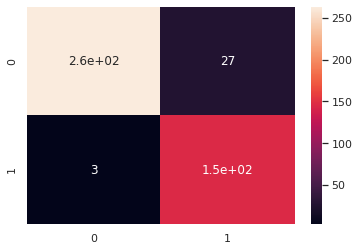

In [431]:
all_models5.logistic_regression()

In [432]:
l_classifier=LogisticRegression(random_state=1)
l_classifier.fit(train_x,train_y)

LogisticRegression(random_state=1)

In [433]:
metrics.roc_auc_score(test_y,l_classifier.predict_proba(test_x)[:,1])

0.9609118259662115

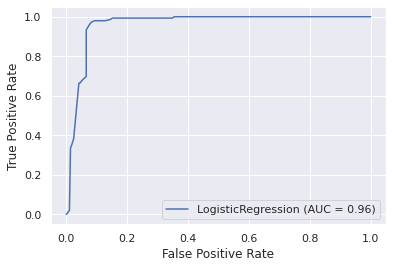

In [434]:
metrics.plot_roc_curve(l_classifier,test_x,test_y)

## knn

accuracy_score_kn_neighbors_train=  0.928082191780822
accuracy_score_kn_neighbors_test=  0.9271070615034168


precision_score_kn_neighbors_train=  0.8911222780569514
precision_score_kn_neighbors_test=  0.903448275862069


recall_score_kn_neighbors_train=  0.897133220910624
recall_score_kn_neighbors_test=  0.8791946308724832


accuracy_score_kn_neighbors_cross=  0.9241103896103896
precision_score_kn_neighbors_cross=  0.8791085138966495
recall_score_kn_neighbors_cross=  0.9023163841807909

confusion_matrix:-




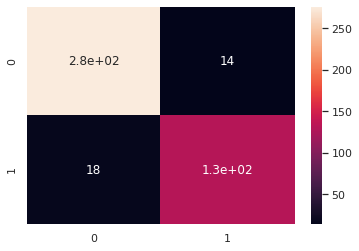

In [435]:
all_models5.knearestneighbors()

In [436]:
knn=KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=7)

In [437]:
metrics.roc_auc_score(test_y,knn.predict_proba(test_x)[:,1])

0.9708979402915991

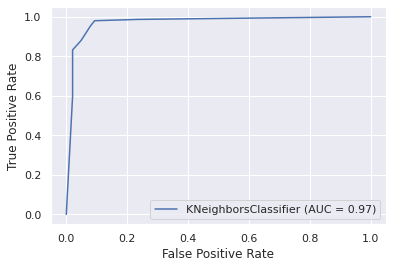

In [438]:
metrics.plot_roc_curve(knn,test_x,test_y)

## SVC

accuracy_score_svc_train=  0.9297945205479452
accuracy_score_svc_test=  0.9316628701594533


precision_score_svc_train=  0.8486646884272997
precision_score_svc_test=  0.8439306358381503


recall_score_svc_train=  0.9645868465430016
recall_score_svc_test=  0.9798657718120806


accuracy_score_svc_cross=  0.9298051948051949
precision_score_svc_cross=  0.8501273998483624
recall_score_svc_cross=  0.964632768361582

confusion_matrix:-




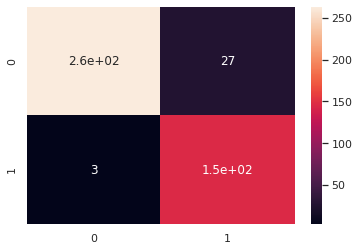

In [439]:
all_models5.Svc()      

In [440]:
svc=SVC(kernel="linear",probability=True)
svc.fit(train_x,train_y)

SVC(kernel='linear', probability=True)

In [441]:
metrics.roc_auc_score(test_y,svc.predict_proba(test_x)[:,1])

0.9474890071742652

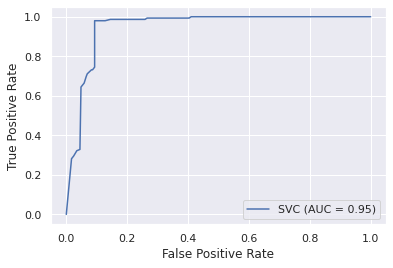

In [442]:
metrics.plot_roc_curve(svc,test_x,test_y)

## naive-bayes

accuracy_score_nbc_train=  0.8835616438356164
accuracy_score_nbc_test=  0.8701594533029613


precision_score_nbc_train=  0.7509677419354839
precision_score_nbc_test=  0.7254901960784313


recall_score_nbc_train=  0.9814502529510961
recall_score_nbc_test=  0.9932885906040269


accuracy_score_nbc_cross=  0.8835681818181819
precision_score_nbc_cross=  0.7524232487074374
recall_score_nbc_cross=  0.9814689265536722

confusion_matrix:-




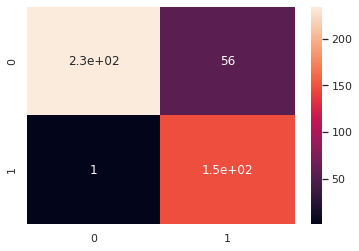

In [443]:
all_models5.naive_bayes()

## decision tree classifier

accuracy_score_dtc_train=  0.9309360730593608
accuracy_score_dtc_test=  0.9202733485193622


precision_score_dtc_train=  0.8757961783439491
precision_score_dtc_test=  0.8653846153846154


recall_score_dtc_train=  0.927487352445194
recall_score_dtc_test=  0.9060402684563759


accuracy_score_dtc_cross=  0.9138418079096043
precision_score_dtc_cross=  0.8648257681210747
recall_score_dtc_cross=  0.9005649717514123

confusion_matrix:-




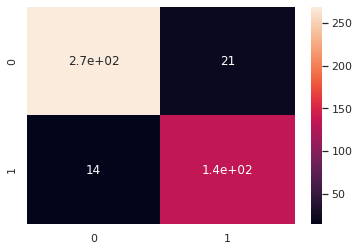

In [444]:
all_models5.decision_tree()

## random forest classifier

accuracy_score_rfc_train=  0.9309360730593608
accuracy_score_rfc_test=  0.9202733485193622


precision_score_rfc_train=  0.8757961783439491
precision_score_rfc_test=  0.8653846153846154


recall_score_rfc_train=  0.927487352445194
recall_score_rfc_test=  0.9060402684563759


accuracy_score_rfc_cross=  0.9229642857142857
precision_score_rfc_cross=  0.8621951026732271
recall_score_rfc_cross=  0.9225141242937852

confusion_matrix:-




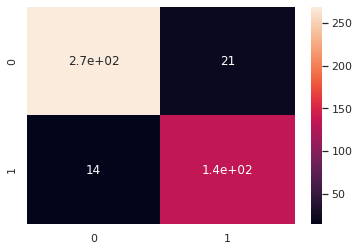

In [445]:
all_models5.random_forest()

## best model

In [446]:
all_models5.best_model()

accuracy           precision              recall          
                     train      test     train      test     train      test
logistic_reg_cl   0.929795  0.931663  0.848665  0.843931  0.964587  0.979866
knn_cl            0.928082  0.927107  0.891122  0.903448  0.897133  0.879195
sv_cl             0.929795  0.931663  0.848665  0.843931  0.964587  0.979866
naive-bayes_cl    0.883562  0.870159  0.750968  0.725490  0.981450  0.993289
decision_tree_cl  0.930936  0.920273  0.875796  0.865385  0.927487  0.906040
random_forest_cl  0.930936  0.920273  0.875796  0.865385  0.927487  0.906040

In [447]:
print("knearestneighbors_cl= ",round(0.903448,4))

knearestneighbors_cl=  0.9034


# Final_data for testing with final_target15

In [448]:
df_final_data_testing_final_target15=pd.DataFrame({"Cooler_Condition":target1_15_pred_values,"Valve_Condition":target2_15_pred_values
                                                 ,"Internal_Pump_Leakage":target3_15_pred_values,"Hydraulic_Accumulator":target4_15_pred_values})

In [449]:
df_final_data_testing_final_target15.head()

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
0,3.0,80.0,2,115.0
1,100.0,100.0,0,90.0
2,3.0,100.0,1,115.0
3,100.0,100.0,2,100.0
4,20.0,100.0,0,90.0


# Final Results Of Stable Flag

In [450]:
df_final_data_testing_final_target15.var()

Cooler_Condition         1743.701917
Valve_Condition           114.616657
Internal_Pump_Leakage       0.631843
Hydraulic_Accumulator     255.845061
dtype: float64

In [451]:
std_final_data_testing_final_target15=StandardScaler().fit_transform(df_final_data_testing_final_target15)
std_final_data_testing_final_target15

array([[-0.8774641 , -1.00265382,  1.68982392,  0.55033796],
       [ 1.4481134 ,  0.86760336, -0.82913262, -1.01441829],
       [-0.8774641 ,  0.86760336,  0.43034565,  0.55033796],
       ...,
       [ 1.4481134 ,  0.86760336,  1.68982392,  0.55033796],
       [-0.46988866, -1.65724384,  1.68982392, -1.01441829],
       [ 1.4481134 ,  0.86760336, -0.82913262,  0.55033796]])

In [452]:
pred_values_before15_minutes=knn.predict(std_final_data_testing_final_target15)
pred_values_before15_minutes

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,

In [453]:
(np.sum(pred_values_before15_minutes==0))/len(pred_values_before15_minutes)

0.6788154897494305

In [454]:
(np.sum(pred_values_before15_minutes==1))/len(pred_values_before15_minutes)

0.3211845102505695

#Models for predicting machine failure before 30 minutes 

#data preperation 

In [455]:
y_30=y.iloc[29:,:]
y_30

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
29,3.0,100.0,0.0,130.0,1.0
30,3.0,100.0,0.0,130.0,1.0
31,3.0,100.0,0.0,130.0,1.0
32,3.0,100.0,0.0,130.0,1.0
33,3.0,100.0,0.0,130.0,1.0
...,...,...,...,...,...
2200,100.0,100.0,0.0,90.0,0.0
2201,100.0,100.0,0.0,90.0,0.0
2202,100.0,100.0,0.0,90.0,0.0
2203,100.0,100.0,0.0,90.0,0.0


In [456]:
y_30.set_axis(range(2176),axis=0,inplace=True)
y_30.head()

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,3.0,100.0,0.0,130.0,1.0
1,3.0,100.0,0.0,130.0,1.0
2,3.0,100.0,0.0,130.0,1.0
3,3.0,100.0,0.0,130.0,1.0
4,3.0,100.0,0.0,130.0,1.0


In [457]:
target_30_1=y_30.iloc[:,-5]
target_30_2=y_30.iloc[:,-4]
target_30_3=y_30.iloc[:,-3]
target_30_4=y_30.iloc[:,-2]
final_target_30=(y_30.iloc[:,-1]).astype(int)

In [458]:
x_30=x.iloc[:-29,:]
x_30

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.000000,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.000000,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.000000,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.000000,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.000000,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,161.330762,109.391923,1.986182,10.166749,9.935633,9.817360,2541.663667,6.669538,10.170395,35.543383,41.150083,38.462467,30.551800,0.544783,46.613717,2.165500,58.551017
2172,161.328250,109.408520,1.991729,10.171394,9.940836,9.821814,2543.085000,6.669263,10.172957,35.532383,41.146767,38.463683,30.558100,0.547117,46.574367,2.165100,58.492083
2173,161.337225,109.408112,1.995578,10.168695,9.941088,9.821787,2543.041167,6.672912,10.171420,35.526700,41.136983,38.440800,30.631567,0.545350,46.089483,2.140233,58.577500
2174,161.330980,109.374891,1.995951,10.171601,9.943033,9.823051,2542.839633,6.678212,10.175855,35.521967,41.121500,38.443783,30.493417,0.543583,46.894100,2.178367,58.687000


In [459]:
df_final_30=pd.concat([x_30,y_30.iloc[:,:-1]],axis=1)
df_final_30

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS3,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
0,160.673492,109.466914,1.991475,0.000000,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,...,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183,3.0,100.0,0.0,130.0
1,160.603320,109.354890,1.976234,0.000000,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,...,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617,3.0,100.0,0.0,130.0
2,160.347720,109.158845,1.972224,0.000000,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,...,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150,3.0,100.0,0.0,130.0
3,160.188088,109.064807,1.946576,0.000000,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,...,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900,3.0,100.0,0.0,130.0
4,160.000472,108.931434,1.922707,0.000000,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,...,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267,3.0,100.0,0.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,161.330762,109.391923,1.986182,10.166749,9.935633,9.817360,2541.663667,6.669538,10.170395,35.543383,...,38.462467,30.551800,0.544783,46.613717,2.165500,58.551017,100.0,100.0,0.0,90.0
2172,161.328250,109.408520,1.991729,10.171394,9.940836,9.821814,2543.085000,6.669263,10.172957,35.532383,...,38.463683,30.558100,0.547117,46.574367,2.165100,58.492083,100.0,100.0,0.0,90.0
2173,161.337225,109.408112,1.995578,10.168695,9.941088,9.821787,2543.041167,6.672912,10.171420,35.526700,...,38.440800,30.631567,0.545350,46.089483,2.140233,58.577500,100.0,100.0,0.0,90.0
2174,161.330980,109.374891,1.995951,10.171601,9.943033,9.823051,2542.839633,6.678212,10.175855,35.521967,...,38.443783,30.493417,0.543583,46.894100,2.178367,58.687000,100.0,100.0,0.0,90.0


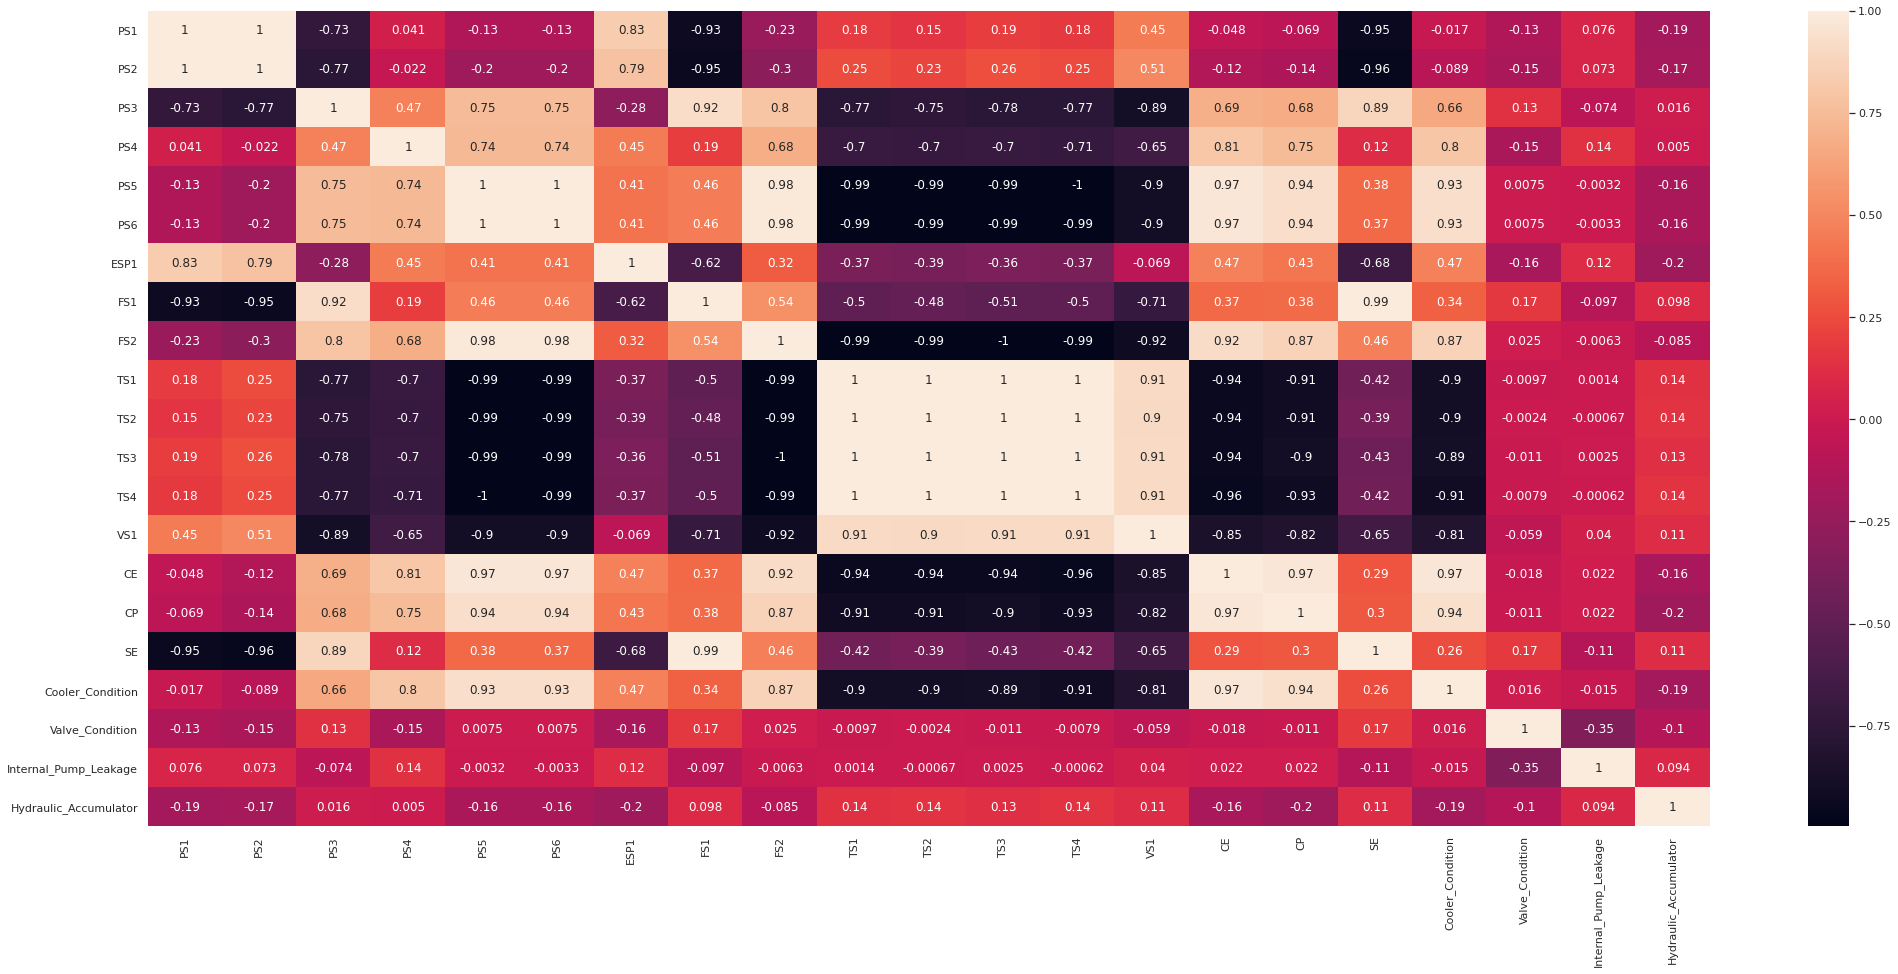

In [460]:
fig=plt.gcf()
fig.set_size_inches((35,15))
sns.heatmap(df_final_30.corr(),annot=True)

In [461]:
# fig.savefig("corr_30.png")

## data splitting  target-1

### target incidence

In [462]:
target_30_1.value_counts(normalize=True)

100.0    0.340533
20.0     0.336397
3.0      0.323070
Name: Cooler_Condition, dtype: float64

In [463]:
train_x,test_x,train_y,test_y=train_test_split(x_30,target_30_1,test_size=0.2,random_state=1)

## feature scaling  target-1

In [464]:
sc=StandardScaler()

In [465]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models  (classification)  target-1

In [466]:
all_models30_1=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

## 1- logistic regression 

accuracy_score_log_reg_train=  0.9764367816091954
accuracy_score_log_reg_test=  0.9747706422018348


precision_score_log_reg_train=  0.9767733386998713
precision_score_log_reg_test=  0.9753551036119843


recall_score_log_reg_train=  0.9764367816091954
recall_score_log_reg_test=  0.9747706422018348


accuracy_score_log_reg_cross=  0.9764367816091954
precision_score_log_reg_cross=  0.9772452331758895
recall_score_log_reg_cross=  0.9764367816091954

confusion_matrix:-




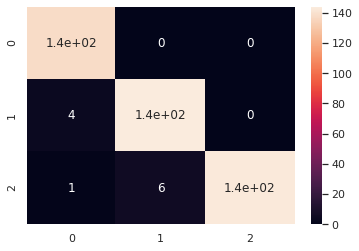

In [467]:
all_models30_1.logistic_regression()

## 2- knn

accuracy_score_kn_neighbors_train=  0.9936781609195402
accuracy_score_kn_neighbors_test=  0.9862385321100917


precision_score_kn_neighbors_train=  0.9936802743145406
precision_score_kn_neighbors_test=  0.9863849307046652


recall_score_kn_neighbors_train=  0.9936781609195402
recall_score_kn_neighbors_test=  0.9862385321100917


accuracy_score_kn_neighbors_cross=  0.9913793103448276
precision_score_kn_neighbors_cross=  0.9915538517538733
recall_score_kn_neighbors_cross=  0.9913793103448276

confusion_matrix:-




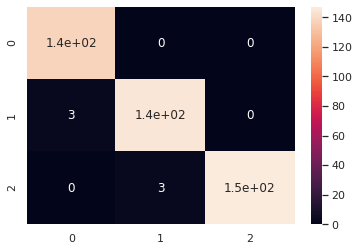

In [468]:
all_models30_1.knearestneighbors()

## 3- SVC

accuracy_score_svc_train=  0.9729885057471265
accuracy_score_svc_test=  0.9678899082568807


precision_score_svc_train=  0.9734616930448797
precision_score_svc_test=  0.968664979436887


recall_score_svc_train=  0.9729885057471265
recall_score_svc_test=  0.9678899082568807


accuracy_score_svc_cross=  0.9729885057471263
precision_score_svc_cross=  0.9739933212954164
recall_score_svc_cross=  0.9729885057471263

confusion_matrix:-




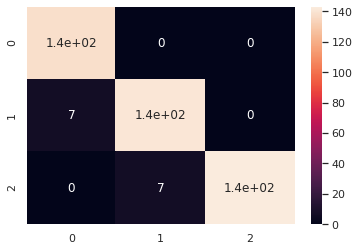

In [469]:
all_models30_1.Svc()

## 4- naive-bayes

accuracy_score_nbc_train=  0.9672413793103448
accuracy_score_nbc_test=  0.9610091743119266


precision_score_nbc_train=  0.9675940913841827
precision_score_nbc_test=  0.9616410927337726


recall_score_nbc_train=  0.9672413793103448
recall_score_nbc_test=  0.9610091743119266


accuracy_score_nbc_cross=  0.9660919540229884
precision_score_nbc_cross=  0.9670746087790993
recall_score_nbc_cross=  0.9660919540229884

confusion_matrix:-




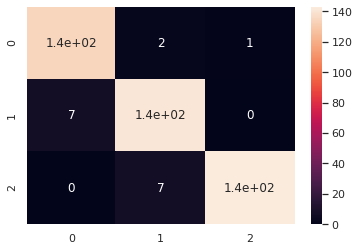

In [470]:
all_models30_1.naive_bayes()

## 5- decision tree classifier

accuracy_score_dtc_train=  1.0
accuracy_score_dtc_test=  0.9908256880733946


precision_score_dtc_train=  1.0
precision_score_dtc_test=  0.9908912188728703


recall_score_dtc_train=  1.0
recall_score_dtc_test=  0.9908256880733946


accuracy_score_dtc_cross=  0.9138418079096043
precision_score_dtc_cross=  0.990930272300662
recall_score_dtc_cross=  0.9908045977011495

confusion_matrix:-




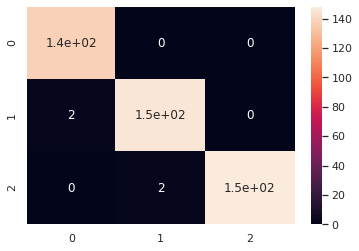

In [471]:
all_models30_1.decision_tree()    #overfitting

## 6- random forest classifier

accuracy_score_rfc_train=  1.0
accuracy_score_rfc_test=  0.9885321100917431


precision_score_rfc_train=  1.0
precision_score_rfc_test=  0.9886438203136683


recall_score_rfc_train=  1.0
recall_score_rfc_test=  0.9885321100917431


accuracy_score_rfc_cross=  0.9925287356321839
precision_score_rfc_cross=  0.9927111574378531
recall_score_rfc_cross=  0.9925287356321839

confusion_matrix:-




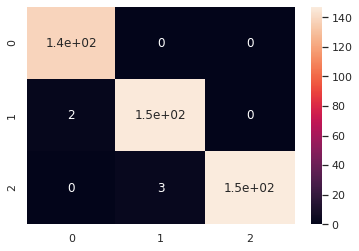

In [472]:
all_models30_1.random_forest()     #overfitting

## best model

In [473]:
all_models30_1.best_model()

accuracy           precision              recall          
                     train      test     train      test     train      test
logistic_reg_cl   0.976437  0.974771  0.976773  0.975355  0.976437  0.974771
knn_cl            0.993678  0.986239  0.993680  0.986385  0.993678  0.986239
sv_cl             0.972989  0.967890  0.973462  0.968665  0.972989  0.967890
naive-bayes_cl    0.967241  0.961009  0.967594  0.961641  0.967241  0.961009
decision_tree_cl  1.000000  0.990826  1.000000  0.990891  1.000000  0.990826
random_forest_cl  1.000000  0.988532  1.000000  0.988644  1.000000  0.988532

In [474]:
print("knearestneighbors_cl= ",round(0.986385,4))

knearestneighbors_cl=  0.9864


In [475]:
knn=KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=7)

In [476]:
precision_score(test_y,knn.predict(test_x),average="weighted")

0.9863849307046652

In [477]:
target1_30_pred_values=knn.predict(test_x)

## data splitting  target-2

### target incidence

In [478]:
target_30_2.value_counts(normalize=True)

100.0    0.503676
90.0     0.165441
73.0     0.165441
80.0     0.165441
Name: Valve_Condition, dtype: float64

In [479]:
train_x,test_x,train_y,test_y=train_test_split(x_30,target_30_2,test_size=0.2,random_state=1)

## feature scaling  target-2

In [480]:
sc=StandardScaler()

In [481]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)  target-2

In [482]:
all_models30_2=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

## 1- logistic regression

accuracy_score_log_reg_train=  0.5959770114942529
accuracy_score_log_reg_test=  0.6009174311926605


precision_score_log_reg_train=  0.5627255970374625
precision_score_log_reg_test=  0.5495230553697766


recall_score_log_reg_train=  0.5959770114942529
recall_score_log_reg_test=  0.6009174311926605


accuracy_score_log_reg_cross=  0.57816091954023
precision_score_log_reg_cross=  0.5341560077504394
recall_score_log_reg_cross=  0.57816091954023

confusion_matrix:-




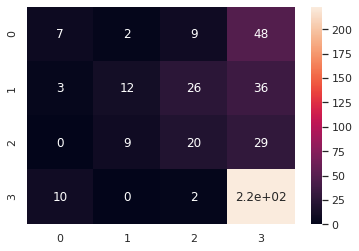

In [483]:
all_models30_2.logistic_regression()

## 2- knn

accuracy_score_kn_neighbors_train=  0.8132183908045977
accuracy_score_kn_neighbors_test=  0.7087155963302753


precision_score_kn_neighbors_train=  0.8191226311593226
precision_score_kn_neighbors_test=  0.7360234491516074


recall_score_kn_neighbors_train=  0.8132183908045977
recall_score_kn_neighbors_test=  0.7087155963302753


accuracy_score_kn_neighbors_cross=  0.718390804597701
precision_score_kn_neighbors_cross=  0.729529870312452
recall_score_kn_neighbors_cross=  0.718390804597701

confusion_matrix:-




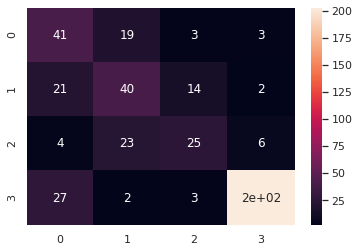

In [484]:
all_models30_2.knearestneighbors()

## 3- SVC

accuracy_score_svc_train=  0.5022988505747127
accuracy_score_svc_test=  0.5275229357798165


precision_score_svc_train=  0.31259107341490544
precision_score_svc_test=  0.3245815031223947


recall_score_svc_train=  0.5022988505747127
recall_score_svc_test=  0.5275229357798165


accuracy_score_svc_cross=  0.5
precision_score_svc_cross=  0.3096645325095697
recall_score_svc_cross=  0.5

confusion_matrix:-




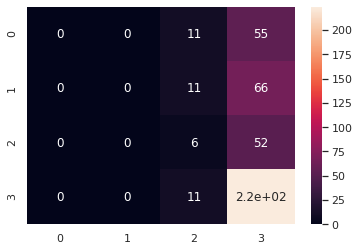

In [485]:
all_models30_2.Svc()      # not accepted

## 4- naive-bayes

accuracy_score_nbc_train=  0.49770114942528737
accuracy_score_nbc_test=  0.518348623853211


precision_score_nbc_train=  0.428980020168841
precision_score_nbc_test=  0.32521863457643274


recall_score_nbc_train=  0.49770114942528737
recall_score_nbc_test=  0.518348623853211


accuracy_score_nbc_cross=  0.48563218390804597
precision_score_nbc_cross=  0.31648793580292256
recall_score_nbc_cross=  0.48563218390804597

confusion_matrix:-




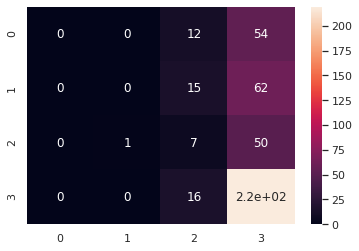

In [486]:
all_models30_2.naive_bayes()      #not accepted

## 5- decision tree classifier

accuracy_score_dtc_train=  1.0
accuracy_score_dtc_test=  0.7614678899082569


precision_score_dtc_train=  1.0
precision_score_dtc_test=  0.7713866633456488


recall_score_dtc_train=  1.0
recall_score_dtc_test=  0.7614678899082569


accuracy_score_dtc_cross=  0.9138418079096043
precision_score_dtc_cross=  0.7881481856778669
recall_score_dtc_cross=  0.7867816091954023

confusion_matrix:-




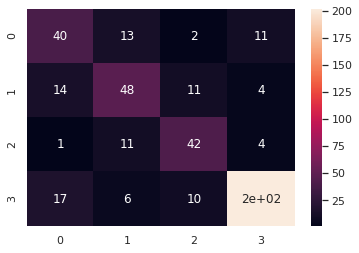

In [487]:
all_models30_2.decision_tree()

## 6- random forest classifier

accuracy_score_rfc_train=  1.0
accuracy_score_rfc_test=  0.8876146788990825


precision_score_rfc_train=  1.0
precision_score_rfc_test=  0.8910484927916121


recall_score_rfc_train=  1.0
recall_score_rfc_test=  0.8876146788990825


accuracy_score_rfc_cross=  0.8580459770114942
precision_score_rfc_cross=  0.8584497671823138
recall_score_rfc_cross=  0.8580459770114942

confusion_matrix:-




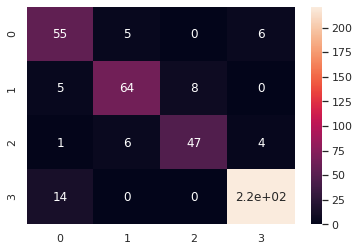

In [488]:
all_models30_2.random_forest()

## 7- tpotclassifier

In [489]:
tpotc=TPOTClassifier(generations=5,population_size=50,scoring=["accuracy","precision_weighted","recall_weighted"],cv=5,verbosity=2
                     ,n_jobs=-1,random_state=1,config_dict="TPOT light")

In [490]:
tpotc.fit(train_x,train_y)


Generation 1 - Current best internal CV score: 0.8120689655172413

Generation 2 - Current best internal CV score: 0.8120689655172413

Generation 3 - Current best internal CV score: 0.8247126436781608

Generation 4 - Current best internal CV score: 0.8247126436781608

Generation 5 - Current best internal CV score: 0.8247126436781608

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=3, p=1, weights=distance)


TPOTClassifier(config_dict='TPOT light', generations=5, n_jobs=-1,
               population_size=50, random_state=1,
               scoring=['accuracy', 'precision_weighted', 'recall_weighted'],
               verbosity=2)

In [491]:
tpotc.fitted_pipeline_

Pipeline(steps=[('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=3, p=1, weights='distance'))])

In [492]:
accuracy_score(test_y,tpotc.predict(test_x))

0.823394495412844

In [493]:
precision_score(test_y,tpotc.predict(test_x),average="weighted")

0.8302125051477122

In [494]:
recall_score(test_y,tpotc.predict(test_x),average="weighted")

0.823394495412844

In [495]:
f1_score(test_y,tpotc.predict(test_x),average="weighted")

0.8257111013181603

## best model

In [496]:
all_models30_2.best_model()

accuracy           precision              recall          
                     train      test     train      test     train      test
logistic_reg_cl   0.595977  0.600917  0.562726  0.549523  0.595977  0.600917
knn_cl            0.813218  0.708716  0.819123  0.736023  0.813218  0.708716
sv_cl             0.502299  0.527523  0.312591  0.324582  0.502299  0.527523
naive-bayes_cl    0.497701  0.518349  0.428980  0.325219  0.497701  0.518349
decision_tree_cl  1.000000  0.761468  1.000000  0.771387  1.000000  0.761468
random_forest_cl  1.000000  0.887615  1.000000  0.891048  1.000000  0.887615

In [497]:
print("kneighborsclassifier (tpotclassifier)= ",round(0.8226260716568949,4))

kneighborsclassifier (tpotclassifier)=  0.8226


In [498]:
target2_30_pred_values=tpotc.predict(test_x)

## data splitting  target-3

In [499]:
round(target_30_3.value_counts(normalize=True),4)

0.0    0.5478
1.0    0.2261
2.0    0.2261
Name: Internal_Pump_Leakage, dtype: float64

In [500]:
train_x,test_x,train_y,test_y=train_test_split(x_30,target_30_3,test_size=0.2,random_state=1)

## feature scaling  target-3

In [501]:
sc=StandardScaler()

In [502]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)  target-3

In [503]:
all_models30_3=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

## 1- logistic regression

accuracy_score_log_reg_train=  0.7247126436781609
accuracy_score_log_reg_test=  0.6995412844036697


precision_score_log_reg_train=  0.636470441445517
precision_score_log_reg_test=  0.5777397359239005


recall_score_log_reg_train=  0.7247126436781609
recall_score_log_reg_test=  0.6995412844036697


accuracy_score_log_reg_cross=  0.7218390804597702
precision_score_log_reg_cross=  0.5999364175010202
recall_score_log_reg_cross=  0.7218390804597702

confusion_matrix:-




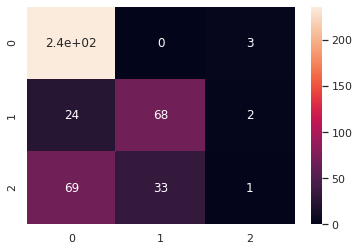

In [504]:
all_models30_3.logistic_regression()

## 2- knn

accuracy_score_kn_neighbors_train=  0.9362068965517242
accuracy_score_kn_neighbors_test=  0.9174311926605505


precision_score_kn_neighbors_train=  0.9358921271673468
precision_score_kn_neighbors_test=  0.9182199441367934


recall_score_kn_neighbors_train=  0.9362068965517242
recall_score_kn_neighbors_test=  0.9174311926605505


accuracy_score_kn_neighbors_cross=  0.9091954022988507
precision_score_kn_neighbors_cross=  0.9103219018987048
recall_score_kn_neighbors_cross=  0.9091954022988507

confusion_matrix:-




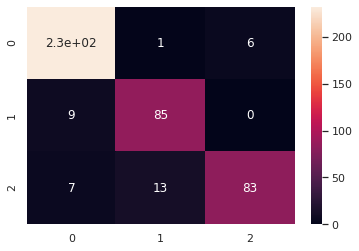

In [505]:
all_models30_3.knearestneighbors()

## 3- SVC

accuracy_score_svc_train=  0.7
accuracy_score_svc_test=  0.6743119266055045


precision_score_svc_train=  0.5495102693468934
precision_score_svc_test=  0.5256659960615876


recall_score_svc_train=  0.7
recall_score_svc_test=  0.6743119266055045


accuracy_score_svc_cross=  0.692528735632184
precision_score_svc_cross=  0.545145192517139
recall_score_svc_cross=  0.692528735632184

confusion_matrix:-




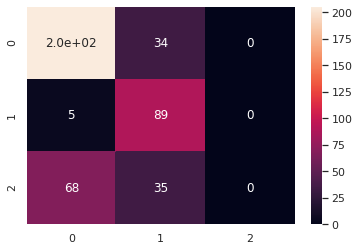

In [506]:
all_models30_3.Svc()     # not accepted

## 4- naive_bayes

accuracy_score_nbc_train=  0.5678160919540229
accuracy_score_nbc_test=  0.5389908256880734


precision_score_nbc_train=  0.6529326540377145
precision_score_nbc_test=  0.38736402722899305


recall_score_nbc_train=  0.5678160919540229
recall_score_nbc_test=  0.5389908256880734


accuracy_score_nbc_cross=  0.5626436781609196
precision_score_nbc_cross=  0.48267090094579207
recall_score_nbc_cross=  0.5626436781609196

confusion_matrix:-




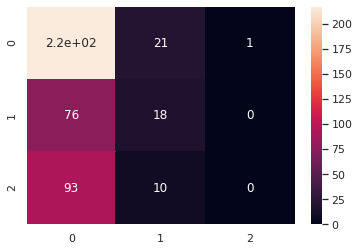

In [507]:
all_models30_3.naive_bayes()    #not accepted

## 5- decision tree classifier

accuracy_score_dtc_train=  1.0
accuracy_score_dtc_test=  0.9220183486238532


precision_score_dtc_train=  1.0
precision_score_dtc_test=  0.9234864533462421


recall_score_dtc_train=  1.0
recall_score_dtc_test=  0.9220183486238532


accuracy_score_dtc_cross=  0.9138418079096043
precision_score_dtc_cross=  0.913366310739914
recall_score_dtc_cross=  0.9120689655172415

confusion_matrix:-




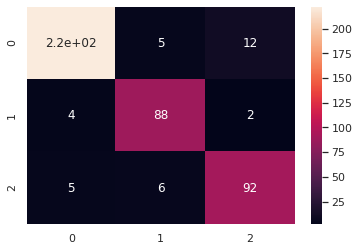

In [508]:
all_models30_3.decision_tree()

## 6- random forest classifier

accuracy_score_rfc_train=  1.0
accuracy_score_rfc_test=  0.9495412844036697


precision_score_rfc_train=  1.0
precision_score_rfc_test=  0.9496284178809139


recall_score_rfc_train=  1.0
recall_score_rfc_test=  0.9495412844036697


accuracy_score_rfc_cross=  0.9545977011494251
precision_score_rfc_cross=  0.9550926334275
recall_score_rfc_cross=  0.9545977011494251

confusion_matrix:-




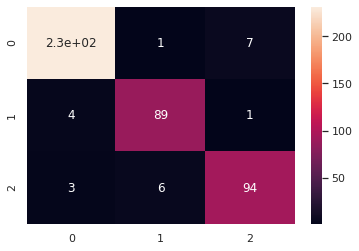

In [509]:
all_models30_3.random_forest()    #overfitting

## best model

In [510]:
all_models30_3.best_model()

accuracy           precision              recall          
                     train      test     train      test     train      test
logistic_reg_cl   0.724713  0.699541  0.636470  0.577740  0.724713  0.699541
knn_cl            0.936207  0.917431  0.935892  0.918220  0.936207  0.917431
sv_cl             0.700000  0.674312  0.549510  0.525666  0.700000  0.674312
naive-bayes_cl    0.567816  0.538991  0.652933  0.387364  0.567816  0.538991
decision_tree_cl  1.000000  0.922018  1.000000  0.923486  1.000000  0.922018
random_forest_cl  1.000000  0.949541  1.000000  0.949628  1.000000  0.949541

In [511]:
print("knearestneighbors_cl= ",round(0.918220,4))

knearestneighbors_cl=  0.9182


In [512]:
knn=KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=7)

In [513]:
pred_test_y=knn.predict(test_x)

In [514]:
target3_30_pred_values=pred_test_y

## data splitting  target-4

In [515]:
target_30_4.value_counts(normalize=True)

90.0     0.371324
130.0    0.261949
115.0    0.183364
100.0    0.183364
Name: Hydraulic_Accumulator, dtype: float64

In [516]:
train_x,test_x,train_y,test_y=train_test_split(x_30,target_30_4,test_size=0.2,random_state=1)

## feature scaling  target-4

In [517]:
sc=StandardScaler()

In [518]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification) target-4

In [519]:
all_models30_4=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

## 1- logistic regression

accuracy_score_log_reg_train=  0.6293103448275862
accuracy_score_log_reg_test=  0.6169724770642202


precision_score_log_reg_train=  0.6145212574744661
precision_score_log_reg_test=  0.6091848413205725


recall_score_log_reg_train=  0.6293103448275862
recall_score_log_reg_test=  0.6169724770642202


accuracy_score_log_reg_cross=  0.6155172413793103
precision_score_log_reg_cross=  0.6017977042715237
recall_score_log_reg_cross=  0.6155172413793103

confusion_matrix:-




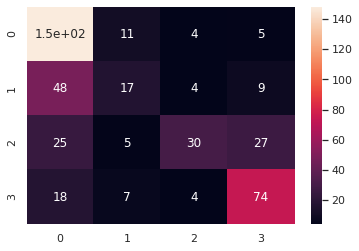

In [520]:
all_models30_4.logistic_regression()

## 2- knn

accuracy_score_kn_neighbors_train=  0.9511494252873564
accuracy_score_kn_neighbors_test=  0.9288990825688074


precision_score_kn_neighbors_train=  0.9517559372047104
precision_score_kn_neighbors_test=  0.9295832968947263


recall_score_kn_neighbors_train=  0.9511494252873564
recall_score_kn_neighbors_test=  0.9288990825688074


accuracy_score_kn_neighbors_cross=  0.9281609195402301
precision_score_kn_neighbors_cross=  0.9303779897489737
recall_score_kn_neighbors_cross=  0.9281609195402301

confusion_matrix:-




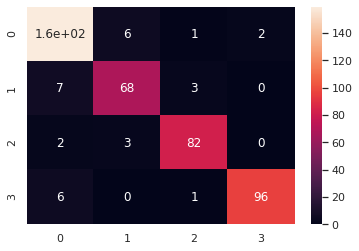

In [521]:
all_models30_4.knearestneighbors()

## 3- SVC

accuracy_score_svc_train=  0.5678160919540229
accuracy_score_svc_test=  0.5527522935779816


precision_score_svc_train=  0.6309939976169964
precision_score_svc_test=  0.5963543575497432


recall_score_svc_train=  0.5678160919540229
recall_score_svc_test=  0.5527522935779816


accuracy_score_svc_cross=  0.5672413793103448
precision_score_svc_cross=  0.6269874339480184
recall_score_svc_cross=  0.5672413793103448

confusion_matrix:-




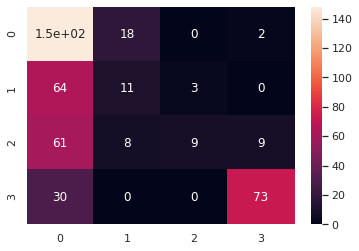

In [522]:
all_models30_4.Svc()

## 4- naive-bayes

accuracy_score_nbc_train=  0.3839080459770115
accuracy_score_nbc_test=  0.3555045871559633


precision_score_nbc_train=  0.32257881046141185
precision_score_nbc_test=  0.29466338481791937


recall_score_nbc_train=  0.3839080459770115
recall_score_nbc_test=  0.3555045871559633


accuracy_score_nbc_cross=  0.38390804597701156
precision_score_nbc_cross=  0.32329765258435844
recall_score_nbc_cross=  0.38390804597701156

confusion_matrix:-




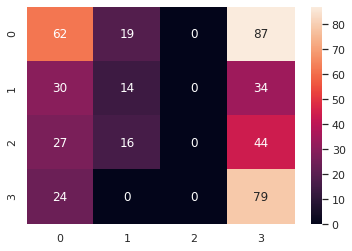

In [523]:
all_models30_4.naive_bayes()      #not accepted

## 5- decision tree classifier

accuracy_score_dtc_train=  1.0
accuracy_score_dtc_test=  0.9541284403669725


precision_score_dtc_train=  1.0
precision_score_dtc_test=  0.9543937214970674


recall_score_dtc_train=  1.0
recall_score_dtc_test=  0.9541284403669725


accuracy_score_dtc_cross=  0.9138418079096043
precision_score_dtc_cross=  0.9307052174892488
recall_score_dtc_cross=  0.9298850574712644

confusion_matrix:-




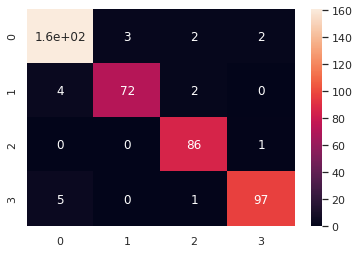

In [524]:
all_models30_4.decision_tree()     #overfitting

## 6- random forest classifier

accuracy_score_rfc_train=  1.0
accuracy_score_rfc_test=  0.9724770642201835


precision_score_rfc_train=  1.0
precision_score_rfc_test=  0.9728402041979413


recall_score_rfc_train=  1.0
recall_score_rfc_test=  0.9724770642201835


accuracy_score_rfc_cross=  0.9712643678160917
precision_score_rfc_cross=  0.9719213036734405
recall_score_rfc_cross=  0.9712643678160917

confusion_matrix:-




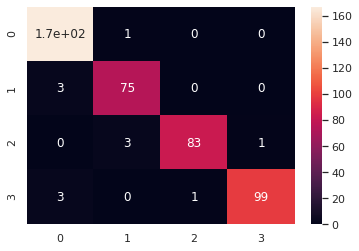

In [525]:
all_models30_4.random_forest()

## best model

In [526]:
all_models30_4.best_model()

accuracy           precision              recall          
                     train      test     train      test     train      test
logistic_reg_cl   0.629310  0.616972  0.614521  0.609185  0.629310  0.616972
knn_cl            0.951149  0.928899  0.951756  0.929583  0.951149  0.928899
sv_cl             0.567816  0.552752  0.630994  0.596354  0.567816  0.552752
naive-bayes_cl    0.383908  0.355505  0.322579  0.294663  0.383908  0.355505
decision_tree_cl  1.000000  0.954128  1.000000  0.954394  1.000000  0.954128
random_forest_cl  1.000000  0.972477  1.000000  0.972840  1.000000  0.972477

In [527]:
print("knearestneighbors_cl= ",round(0.929583,4))

knearestneighbors_cl=  0.9296


In [528]:
knn=KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=7)

In [529]:
target4_30_pred_values=knn.predict(test_x)

## data splitting  final target-30

In [530]:
final_target_30.value_counts(normalize=True)

0    0.665901
1    0.334099
Name: Stable_Flag, dtype: float64

In [531]:
train_x,test_x,train_y,test_y=train_test_split(y_30.iloc[:,:-1],final_target_30,test_size=0.2,random_state=1,stratify=final_target_30)

## feature scaling final_target30

In [532]:
sc=StandardScaler()

In [533]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)  final-target30

In [534]:
all_models30_5=Singleclass_Classification_Models(train_x,test_x,train_y,test_y)

## 1- logistic regression

accuracy_score_log_reg_train=  0.9304597701149425
accuracy_score_log_reg_test=  0.926605504587156


precision_score_log_reg_train=  0.8463855421686747
precision_score_log_reg_test=  0.8392857142857143


recall_score_log_reg_train=  0.9672977624784854
recall_score_log_reg_test=  0.9657534246575342


accuracy_score_log_reg_cross=  0.9304597701149424
precision_score_log_reg_cross=  0.8475297477911446
recall_score_log_reg_cross=  0.9673582700175336

confusion_matrix:-




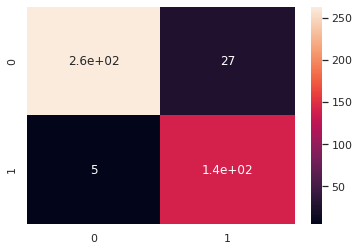

In [535]:
all_models30_5.logistic_regression()

In [536]:
l_classifier=LogisticRegression(random_state=1)
l_classifier.fit(train_x,train_y)

LogisticRegression(random_state=1)

In [537]:
metrics.roc_auc_score(test_y,l_classifier.predict_proba(test_x)[:,1])

0.955514879546528

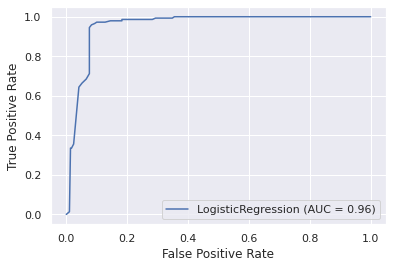

In [538]:
metrics.plot_roc_curve(l_classifier,test_x,test_y)

## 2- knn

accuracy_score_kn_neighbors_train=  0.924712643678161
accuracy_score_kn_neighbors_test=  0.9357798165137615


precision_score_kn_neighbors_train=  0.8975265017667845
precision_score_kn_neighbors_test=  0.9214285714285714


recall_score_kn_neighbors_train=  0.8743545611015491
recall_score_kn_neighbors_test=  0.8835616438356164


accuracy_score_kn_neighbors_cross=  0.9201149425287356
precision_score_kn_neighbors_cross=  0.8624856021301252
recall_score_kn_neighbors_cross=  0.9070718877849211

confusion_matrix:-




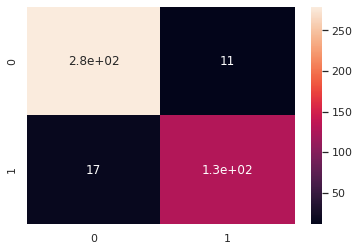

In [539]:
all_models30_5.knearestneighbors()

In [540]:
knn=KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=7)

In [541]:
metrics.roc_auc_score(test_y,knn.predict_proba(test_x)[:,1])

0.965847897968824

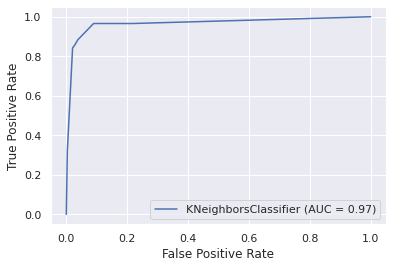

In [542]:
metrics.plot_roc_curve(knn,test_x,test_y)

## 3- SVC

accuracy_score_svc_train=  0.9304597701149425
accuracy_score_svc_test=  0.926605504587156


precision_score_svc_train=  0.8463855421686747
precision_score_svc_test=  0.8392857142857143


recall_score_svc_train=  0.9672977624784854
recall_score_svc_test=  0.9657534246575342


accuracy_score_svc_cross=  0.9287356321839079
precision_score_svc_cross=  0.846974192235589
recall_score_svc_cross=  0.9621858562244302

confusion_matrix:-




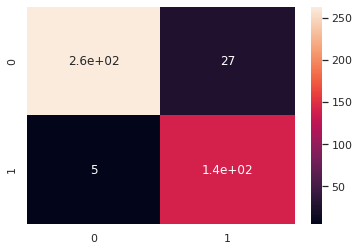

In [543]:
all_models30_5.Svc()

In [544]:
svc=SVC(kernel="rbf",probability=True)
svc.fit(train_x,train_y)

SVC(probability=True)

In [545]:
metrics.roc_auc_score(test_y,svc.predict_proba(test_x)[:,1])

0.9610651865847898

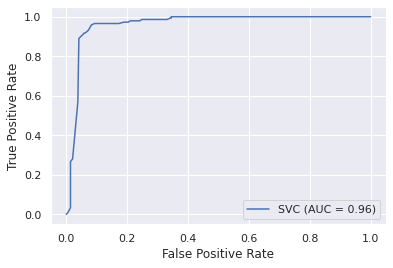

In [546]:
metrics.plot_roc_curve(svc,test_x,test_y)

## 4- naive bayes

accuracy_score_nbc_train=  0.8833333333333333
accuracy_score_nbc_test=  0.8669724770642202


precision_score_nbc_train=  0.7473821989528796
precision_score_nbc_test=  0.72


recall_score_nbc_train=  0.9827882960413081
recall_score_nbc_test=  0.9863013698630136


accuracy_score_nbc_cross=  0.8833333333333332
precision_score_nbc_cross=  0.7498142114553654
recall_score_nbc_cross=  0.9828462887200468

confusion_matrix:-




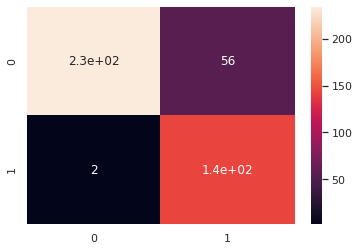

In [547]:
all_models30_5.naive_bayes()

## 5- decision tree classifier

accuracy_score_dtc_train=  0.9304597701149425
accuracy_score_dtc_test=  0.9220183486238532


precision_score_dtc_train=  0.862776025236593
precision_score_dtc_test=  0.8589743589743589


recall_score_dtc_train=  0.9414802065404475
recall_score_dtc_test=  0.9178082191780822


accuracy_score_dtc_cross=  0.9138418079096043
precision_score_dtc_cross=  0.84803465485777
recall_score_dtc_cross=  0.8778492109877265

confusion_matrix:-




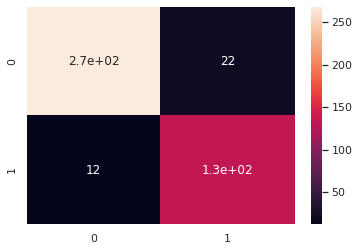

In [548]:
all_models30_5.decision_tree()  

In [549]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=42)
dtc.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [550]:
metrics.roc_auc_score(test_y,dtc.predict_proba(test_x)[:,1])

0.965918752952291

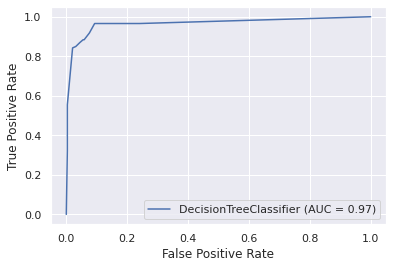

In [551]:
metrics.plot_roc_curve(dtc,test_x,test_y)

## random forest classifier

accuracy_score_rfc_train=  0.9304597701149425
accuracy_score_rfc_test=  0.9220183486238532


precision_score_rfc_train=  0.862776025236593
precision_score_rfc_test=  0.8589743589743589


recall_score_rfc_train=  0.9414802065404475
recall_score_rfc_test=  0.9178082191780822


accuracy_score_rfc_cross=  0.9132183908045975
precision_score_rfc_cross=  0.8496482434957358
recall_score_rfc_cross=  0.9002630040911747

confusion_matrix:-




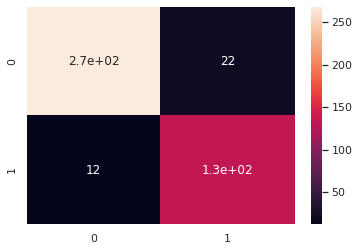

In [552]:
all_models30_5.random_forest()   

In [553]:
rfc=RandomForestClassifier(n_estimators=100,random_state=1)
rfc.fit(train_x,train_y)

RandomForestClassifier(random_state=1)

In [554]:
metrics.roc_auc_score(test_y,rfc.predict_proba(test_x)[:,1])

0.9659305621162022

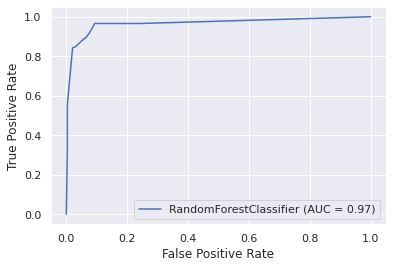

In [555]:
metrics.plot_roc_curve(rfc,test_x,test_y)

## best model

In [556]:
all_models30_5.best_model()

accuracy           precision              recall          
                     train      test     train      test     train      test
logistic_reg_cl   0.930460  0.926606  0.846386  0.839286  0.967298  0.965753
knn_cl            0.924713  0.935780  0.897527  0.921429  0.874355  0.883562
sv_cl             0.930460  0.926606  0.846386  0.839286  0.967298  0.965753
naive-bayes_cl    0.883333  0.866972  0.747382  0.720000  0.982788  0.986301
decision_tree_cl  0.930460  0.922018  0.862776  0.858974  0.941480  0.917808
random_forest_cl  0.930460  0.922018  0.862776  0.858974  0.941480  0.917808

In [557]:
print("knearestneighbors_cl= ",round(0.921429,4))

knearestneighbors_cl=  0.9214


# Final data for testing with final-target30

In [558]:
df_final_data_testing_final_target30=pd.DataFrame({"Cooler_Condition":target1_30_pred_values,"Valve_Condition":target2_30_pred_values
                                                 ,"Internal_Pump_Leakage":target3_30_pred_values,"Hydraulic_Accumulator":target4_30_pred_values})

In [559]:
df_final_data_testing_final_target30.head()

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
0,100.0,90.0,2.0,115.0
1,3.0,100.0,1.0,100.0
2,20.0,73.0,2.0,100.0
3,20.0,100.0,1.0,100.0
4,3.0,90.0,0.0,100.0


# Final results of Stable Flag

In [560]:
df_final_data_testing_final_target30.var()

Cooler_Condition         1794.208557
Valve_Condition           121.245951
Internal_Pump_Leakage       0.641416
Hydraulic_Accumulator     254.672967
dtype: float64

In [561]:
std_final_data_testing_final_target30=StandardScaler().fit_transform(df_final_data_testing_final_target30)
std_final_data_testing_final_target30

array([[ 1.38326465, -0.04108135,  1.70592182,  0.5805829 ],
       [-0.90936491,  0.8681303 ,  0.45586818, -0.36043623],
       [-0.50756386, -1.58674117,  1.70592182, -0.36043623],
       ...,
       [ 1.38326465, -1.58674117, -0.79418545, -0.36043623],
       [ 1.38326465, -0.95029301,  1.70592182, -0.98778231],
       [ 1.38326465,  0.8681303 , -0.79418545, -0.98778231]])

In [562]:
pred_values_before30_minutes=knn.predict(std_final_data_testing_final_target30)
pred_values_before30_minutes

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [563]:
(np.sum(pred_values_before30_minutes==0))/len(pred_values_before30_minutes)

0.6697247706422018

In [564]:
(np.sum(pred_values_before30_minutes==1))/len(pred_values_before30_minutes)

0.3302752293577982